# College dataset
*Ch 02 - Statistical Learning - Q8 (Applied Exercise)*

__Description__  
Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.  
Dimensions : 777 x 18  

__Sources__  
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the ASA Statistical Graphics Section's 1995 Data Analysis Exposition.

__References__  
This dataset is a part of the course material of the [book](https://www.statlearning.com/) :  ___Introduction to Statistical Learning with R___

__Short description of variables__  

• <b>Private</b> : Public/private indicator  
• <b>Apps</b> : Number of applications received  
• <b>Accept</b> : Number of applicants accepted  
• <b>Enroll</b> : Number of new students enrolled  
• <b>Top10perc</b> : New students from top 10 % of high school class  
• <b>Top25perc</b> : New students from top 25 % of high school class  
• <b>F.Undergrad</b> : Number of full-time undergraduates  
• <b>P.Undergrad</b> : Number of part-time undergraduates  
• <b>Outstate</b> : Out-of-state tuition  
• <b>Room.Board</b> : Room and board costs  
• <b>Books</b> : Estimated book costs  
• <b>Personal</b> : Estimated personal spending  
• <b>PhD</b> : Percent of faculty with Ph.D.’s  
• <b>Terminal</b> : Percent of faculty with terminal degree  
• <b>S.F.Ratio</b> : Student/faculty ratio  
• <b>perc.alumni</b> : Percent of alumni who donate  
• <b>Expend</b> : Instructional expenditure per student  
• <b>Grad.Rate</b> : Graduation rate  

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Index
- [Short description of variables (appendix)](#Short-description-of-variables)
- [2.8a - Import data](#2.8a---Import-data)
  - [Preliminary_Observations](#Preliminary_Observations)
- [2.8b - Data preparation](#2.8b---Data-preparation)
- [2.8c - Data exploration](#2.8c---Data-exploration)
  - [2.8c.1 - Summary statistics](#2.8c.1---Summary-statistics)
  - [2.8c.2 - Scatterplot matrix](#2.8c.2---Scatterplot-matrix)
    - [Observations - Pairplots](#Observations_Pairplots)
    - [Correlation Matrix](#Correlation)
  - [2.8c.3 - Boxplot](#2.8c.3---Boxplot)
    - [Observations - Outstate v Private](#Observations_-_Outstate_~_Private)
  - [2.8c.4 - Elite](#2.8c.4---Elite)
    - [Observations](#Observations_-_Elite)
  - [2.8c.5 - Histograms](#2.8c.5---Histograms)
    - [a) Student expenditure related variables](#a%29-Student-expenditure-related-variables)
      - [Observations](#Observations_-_Student)
    - [b) Faculty and student related ratios](#b%29-Faculty-and-student-related-ratios)
      - [Observations](#Observations_-_Faculty_Student_Ratios)
  - [2.8c.6 - Further data exploration](#2.8c.6---Further-data-exploration)
    - [a) Spending patterns - private vs non-private](#a%29-Spending-patterns---private-vs-non-private)
      - [Observations](#Observations_-_Student_spending)
    - [b) Most sought after college/university](#b%29-Most-sought-after-college/university)
      - [Most Sought-after Colleges/Universities (Final list)](#Most-Sought-after-Colleges/Universities-(Final-list%29)
    - [c) Further analysis of Most sought-after colleges/univeristies](#c%29-Further-analysis-of-Most-sought-after-colleges/univeristies)
      - [Observations](#Observations_-_MSA)
    - [d) Top 20 colleges by applications](#d%29-Top-20-colleges-by-applications)
      - [Observations](#Observations_-_Top_Apps)
    - [e) Further analysis of Elite colleges](#e%29-Further-analysis-of-Elite-colleges)
      - [Observations](#Observations_-_Top_Elite)
- [Code help sources](#Code-help-sources)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Some preliminary workings

In [1]:
# import requisite packages
library(ggplot2)
suppressPackageStartupMessages(library(corrplot))
suppressPackageStartupMessages(library(psych))
library(kSamples)

Loading required package: SuppDists



In [2]:
# save default options and parameters
defop = options()
defpar = par(no.readonly=T)

# function to modify plot parameters
plot_pars = function(w=7,h=7) {options(repr.plot.width=w, repr.plot.height=h)}

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## 2.8a - Import data

In [3]:
# a) import data
file_dir = r"(E:\Data Science\Statistics\Intro to Statistical Learning with R)"
fpath = file.path(file_dir,'datasets','College.csv')
college = read.csv(fpath)

dim(college)
head(college)

[1] 777  19

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
3,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
4,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
6,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [4]:
## alternatives

## 1
# setwd("E:/Data Science/Statistics/Intro to Statistical Learning with R")
# df = read.csv("./datasets/College.csv")

## 2
# download.file("https://statlearning.com/College.csv", destfile="College.csv", mode="wb")
# mode='wb' >> for windows
# df = read.csv("College.csv")

# head(df)

#### *Check for missing values*

In [5]:
# missing values in data
sum(is.na(college))

[1] 0

In [6]:
# columns with missing values
names(college)[colSums(is.na(college)) > 0]

character(0)

In [7]:
# rows with missing values
rownames(college)[apply(college, 1, function(x) sum(is.na(x))) > 0]

character(0)

#### *Structure of data*

In [8]:
str(college)

'data.frame':	777 obs. of  19 variables:
 $ X          : chr  "Abilene Christian University" "Adelphi University" "Adrian College" "Agnes Scott College" ...
 $ Private    : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ Apps       : int  1660 2186 1428 417 193 587 353 1899 1038 582 ...
 $ Accept     : int  1232 1924 1097 349 146 479 340 1720 839 498 ...
 $ Enroll     : int  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : int  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : int  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: int  2885 2683 1036 510 249 678 416 1594 973 799 ...
 $ P.Undergrad: int  537 1227 99 63 869 41 230 32 306 78 ...
 $ Outstate   : int  7440 12280 11250 12960 7560 13500 13290 13868 15595 10468 ...
 $ Room.Board : int  3300 6450 3750 5450 4120 3335 5720 4826 4400 3380 ...
 $ Books      : int  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : int  2200 1500 1165 875 1500 675 1500 850 500 1800 ...
 $ PhD        : int  70 29 53 92 76 67 90 89 79 40 ...
 $

<div class="alert alert-block alert-info">
<a id='Preliminary_Observations'></a>
<b>Preliminary observations:</b><br>
    - No missing values.<br>
    - Currently, college/universities' names form part of the dataset. They will be added as rownames and removed from the executable data.<br>
    - Categorical variable 'Private' is presently saved as character. It will be converted to factor.
</div>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## 2.8b - Data preparation

In [9]:
# Create rownames from college names
rownames(college) = college[,1]

# Remove column containing names
college = college[,-1]

# Reclassify 'Private' as factor
college$Private = as.factor(college$Private)

# Confirm changes
college[sample.int(nrow(college), 3), ]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
Mayville State University,No,233,233,153,5,12,658,58,4486,2516,600,1900,68,68,15.7,11,6971,51
Susquehanna University,Yes,2096,1512,465,27,59,1442,166,16130,4710,400,800,83,86,13.9,37,10554,90
Colgate University,Yes,4856,2492,727,46,75,2649,25,19510,5565,500,750,95,98,10.5,45,15494,93


[Go to Index](#Index)

###### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2.8c - Data exploration

### 2.8c.1 - Summary statistics

In [10]:
# Summary of variables : 
#  numerical >> descriptive statistics
#  categorical >> frequency table
#  character >> count

summary(college)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

In [11]:
# factor columns
fcts = Filter(f = is.factor, college)

# show levels
sapply(fcts, levels)

# alternatively
# sapply(college[sapply(college, is.factor)], levels)

Private
No
Yes


[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2.8c.2 - Scatterplot matrix

In [12]:
# Select variables for pairs plot
selected_vars = setdiff(names(college), c('F.Undergrad','P.Undergrad','Books',
                                          'S.F.Ratio','perc.alumni'))
length(selected_vars)
selected_vars

[1] 13

[1] "Private"    "Apps"       "Accept"     "Enroll"     "Top10perc" 
 [6] "Top25perc"  "Outstate"   "Room.Board" "Personal"   "PhD"       
[11] "Terminal"   "Expend"     "Grad.Rate"

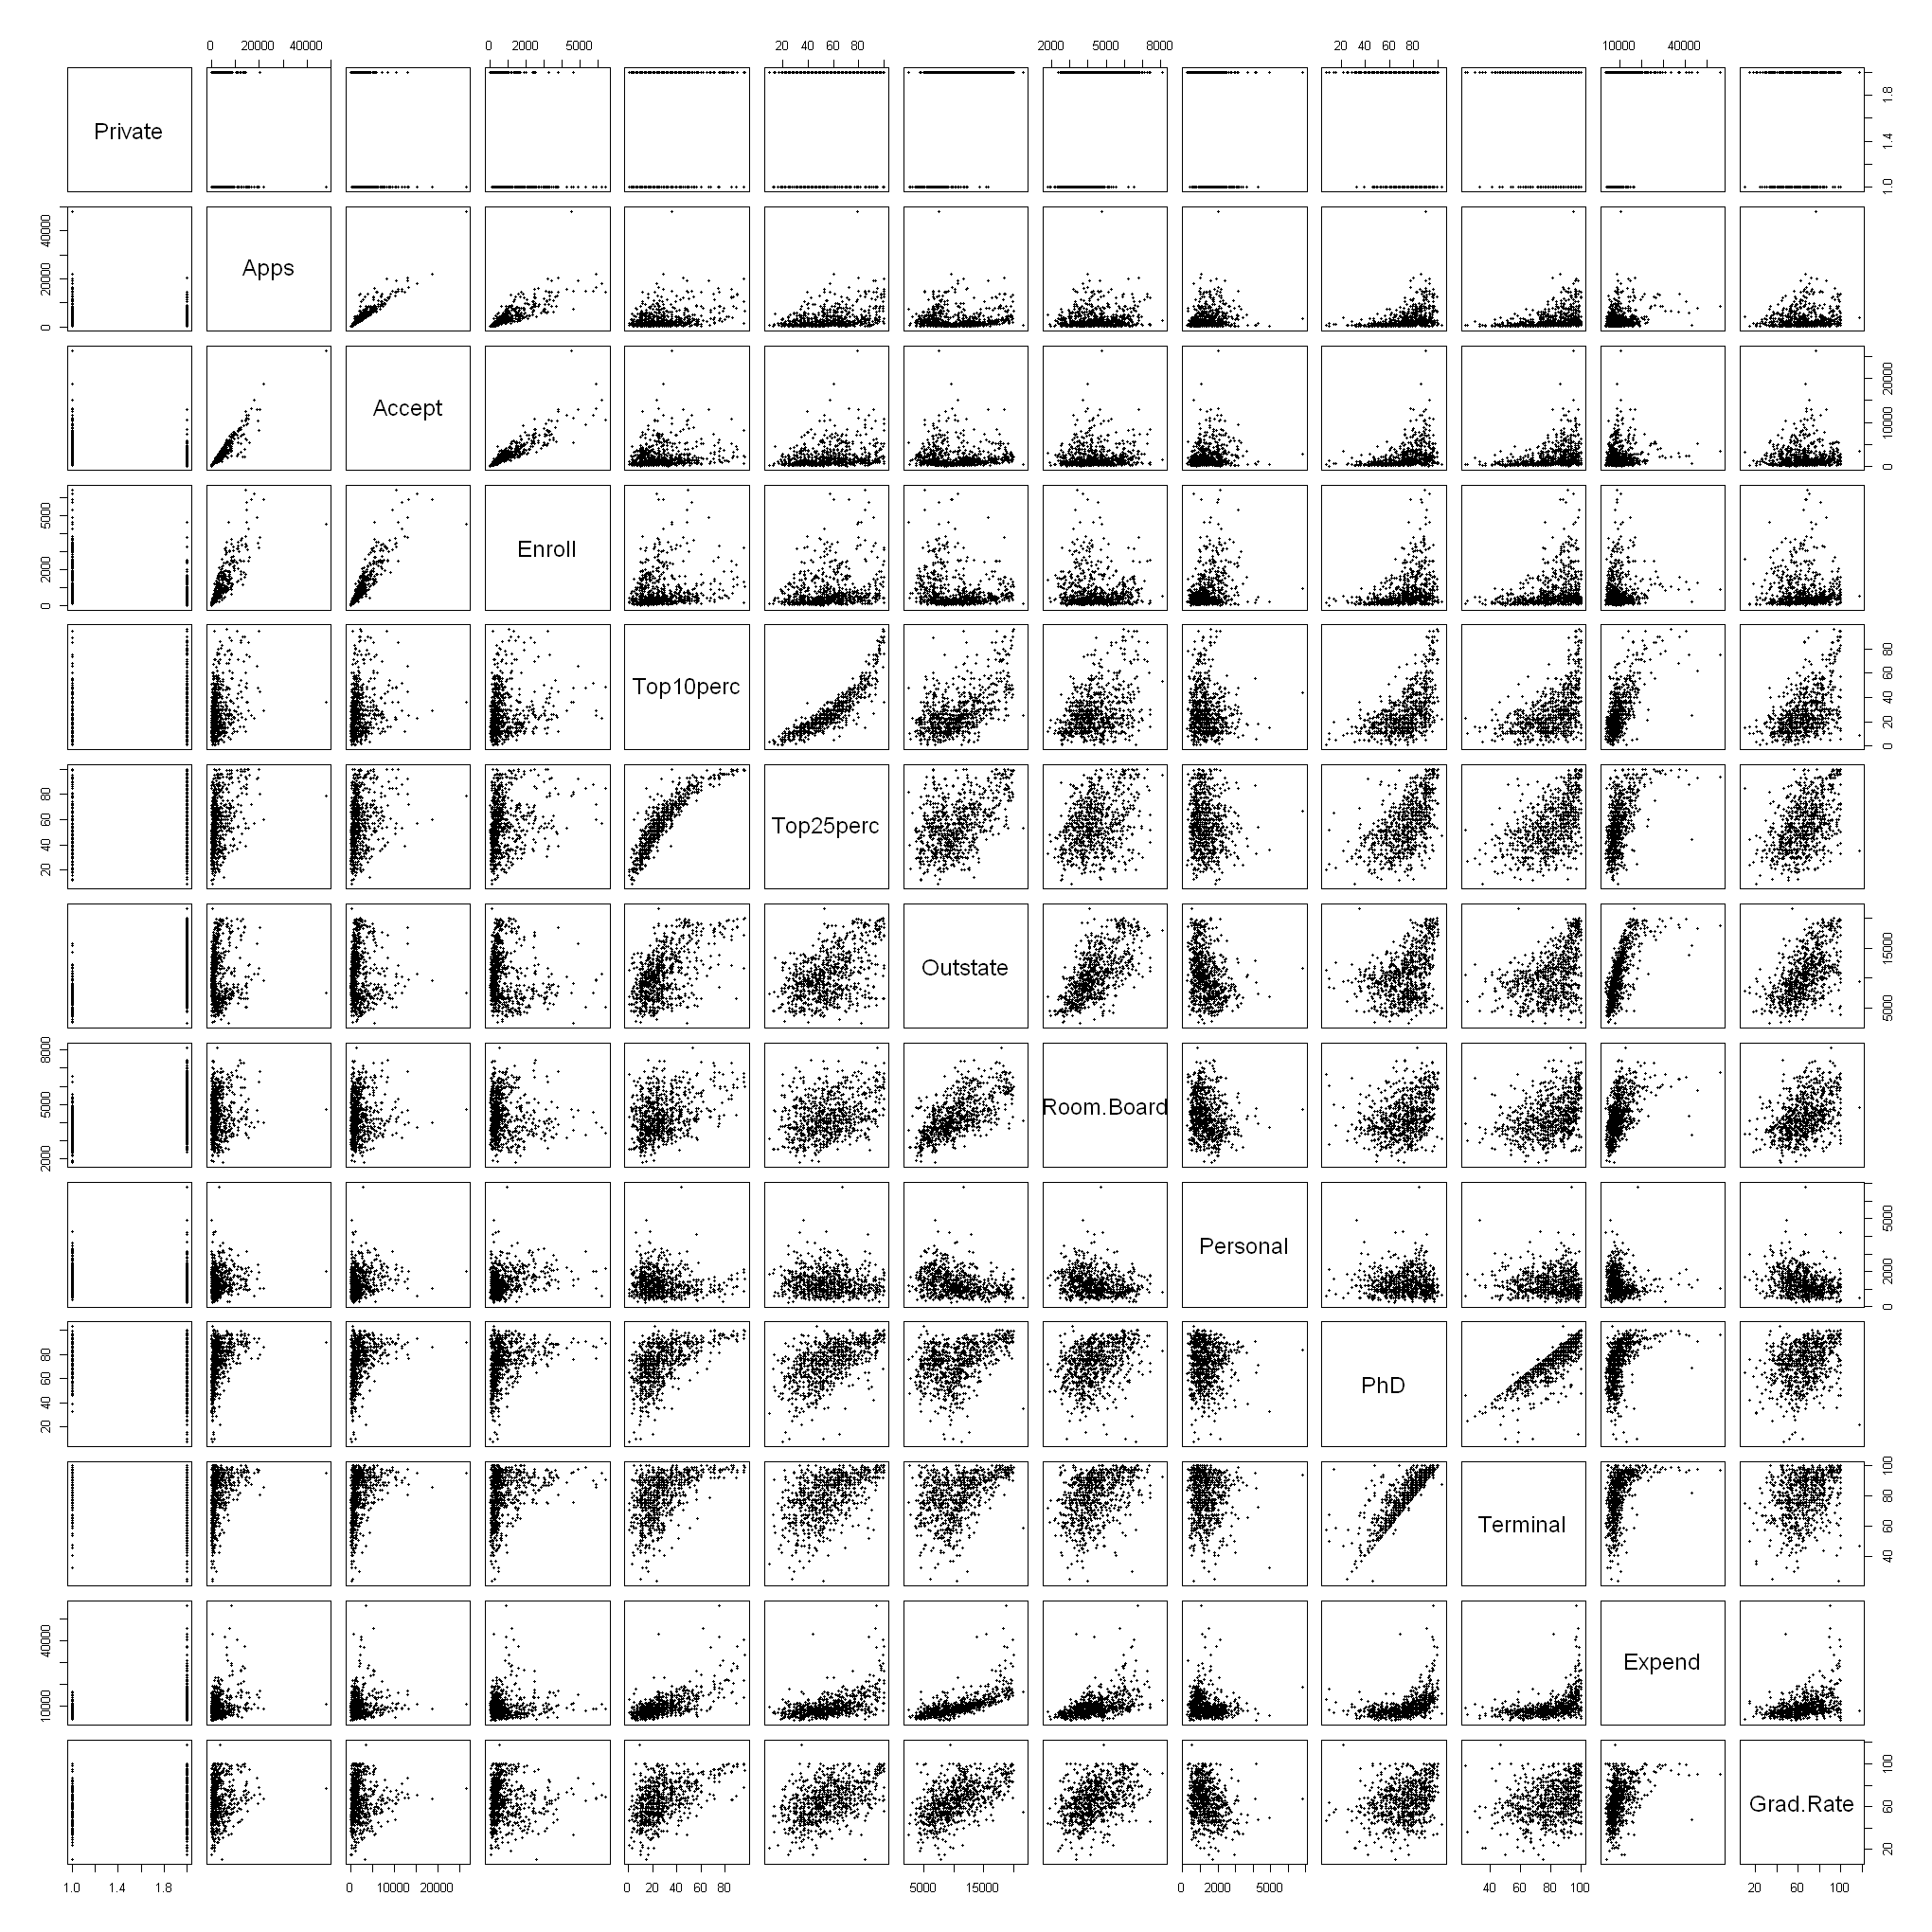

In [13]:
# increase plot size
plot_pars(17,17)

# scatterplot matrix
pairs(college[,selected_vars], pch = 19,  cex = 0.5,
      lower.panel=, cex.labels=1.8)

# reset plot params
options(defop)

<div class="alert alert-block alert-info">
<a id='Observations_Pairplots'></a>
<b>Tentative observations:</b><br>   
- Outstate fees for private colleges has a higher spread and overall magnitude as compared to non-private.<br>
- Private colleges have a much higher 'Expend' (instructional expenditure per student)<br>
- There is moderately positive relationship bet the colleges preferred by the Top10perc and the Outstate tuition charged<br>
</div>

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### Correlation

In [14]:
# High correlation relations

# Correlation of numeric columns
corr = cor(college[sapply(college, is.numeric)])

# Display |correlations| > 0.55
as.data.frame(apply(corr, 2, function(x) ifelse (abs(x) >=0.55, round(x,3), "-")))

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Apps,1,0.943,0.847,-,-,0.814,-,-,-,-,-,-,-,-,-,-,-
Accept,0.943,1,0.912,-,-,0.874,-,-,-,-,-,-,-,-,-,-,-
Enroll,0.847,0.912,1,-,-,0.965,-,-,-,-,-,-,-,-,-,-,-
Top10perc,-,-,-,1,0.892,-,-,0.562,-,-,-,-,-,-,-,0.661,-
Top25perc,-,-,-,0.892,1,-,-,-,-,-,-,-,-,-,-,-,-
F.Undergrad,0.814,0.874,0.965,-,-,1,0.571,-,-,-,-,-,-,-,-,-,-
P.Undergrad,-,-,-,-,-,0.571,1,-,-,-,-,-,-,-,-,-,-
Outstate,-,-,-,0.562,-,-,-,1,0.654,-,-,-,-,-0.555,0.566,0.673,0.571
Room.Board,-,-,-,-,-,-,-,0.654,1,-,-,-,-,-,-,-,-


 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### Correlation plot

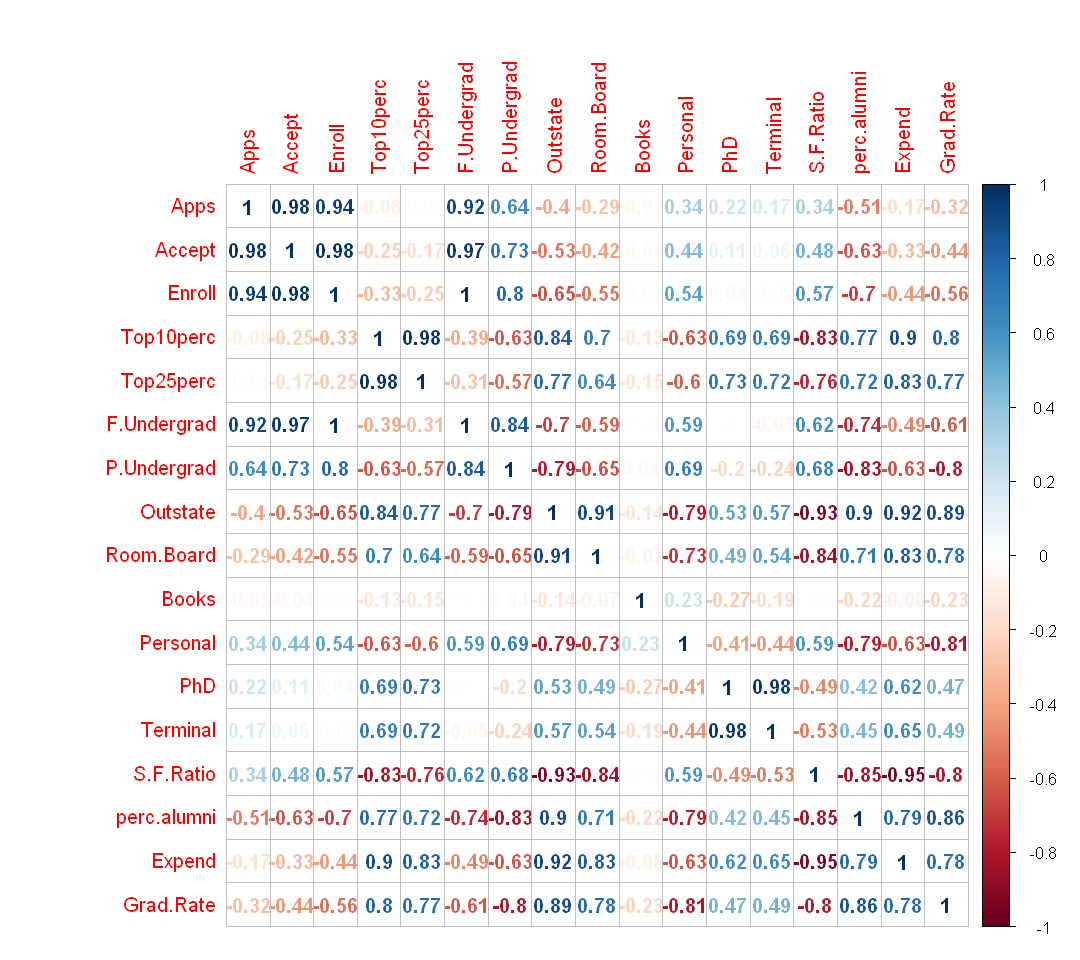

In [15]:
# Correlation plot
suppressPackageStartupMessages(
library(corrplot))

plot_pars(9,8)
corrplot(cor(corr), method='number', tl.cex=1, number.cex=1)

options(defop)

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2.8c.3 - Boxplot

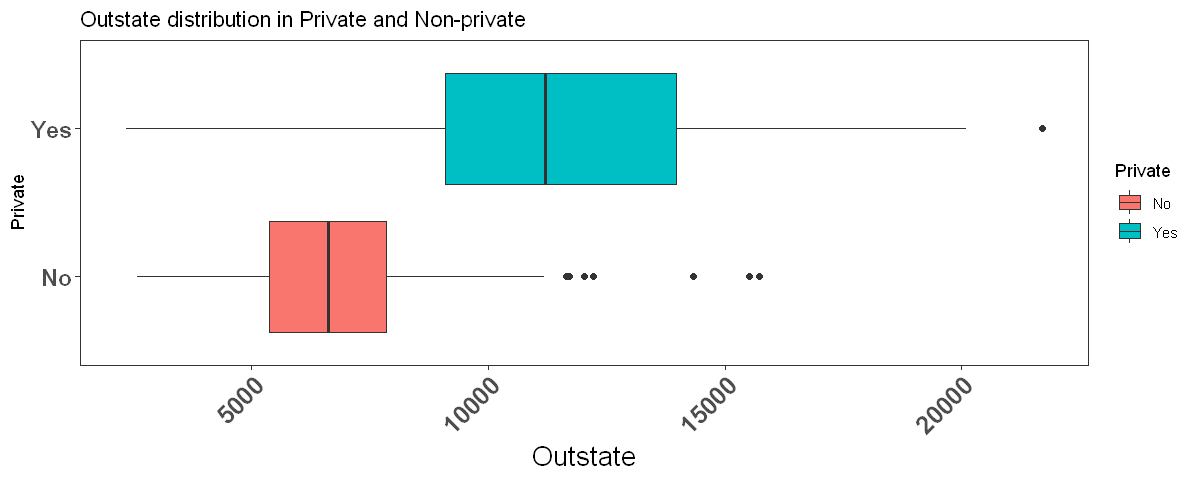

In [16]:
# Plot parameters
plot_pars(10,4)

# Outstate vs Private boxplot
ggplot(college, aes(y=Private, x=Outstate, fill=Private)) + 
geom_boxplot() +
labs(title='Outstate distribution in Private and Non-private') +

theme_bw() +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      axis.text=element_text(size=14, face="bold"), 
      axis.title.x = element_text(size = 16),
      axis.text.x = element_text(size=15, angle=45, hjust=1))

# size=rel(3.5) to change all

# reset plot dimensions
options(defop)

<div class="alert alert-block alert-info">
<a id='Observations_-_Outstate_~_Private'></a>
<b>Observations:</b><br>
- As we had seen in the pairs plot, out-of-state tuition charged by the private colleges is much more.
</div>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

[Go to Index](#Index)

### 2.8c.4 - Elite
Elite >> universities with Top10perc > 50%

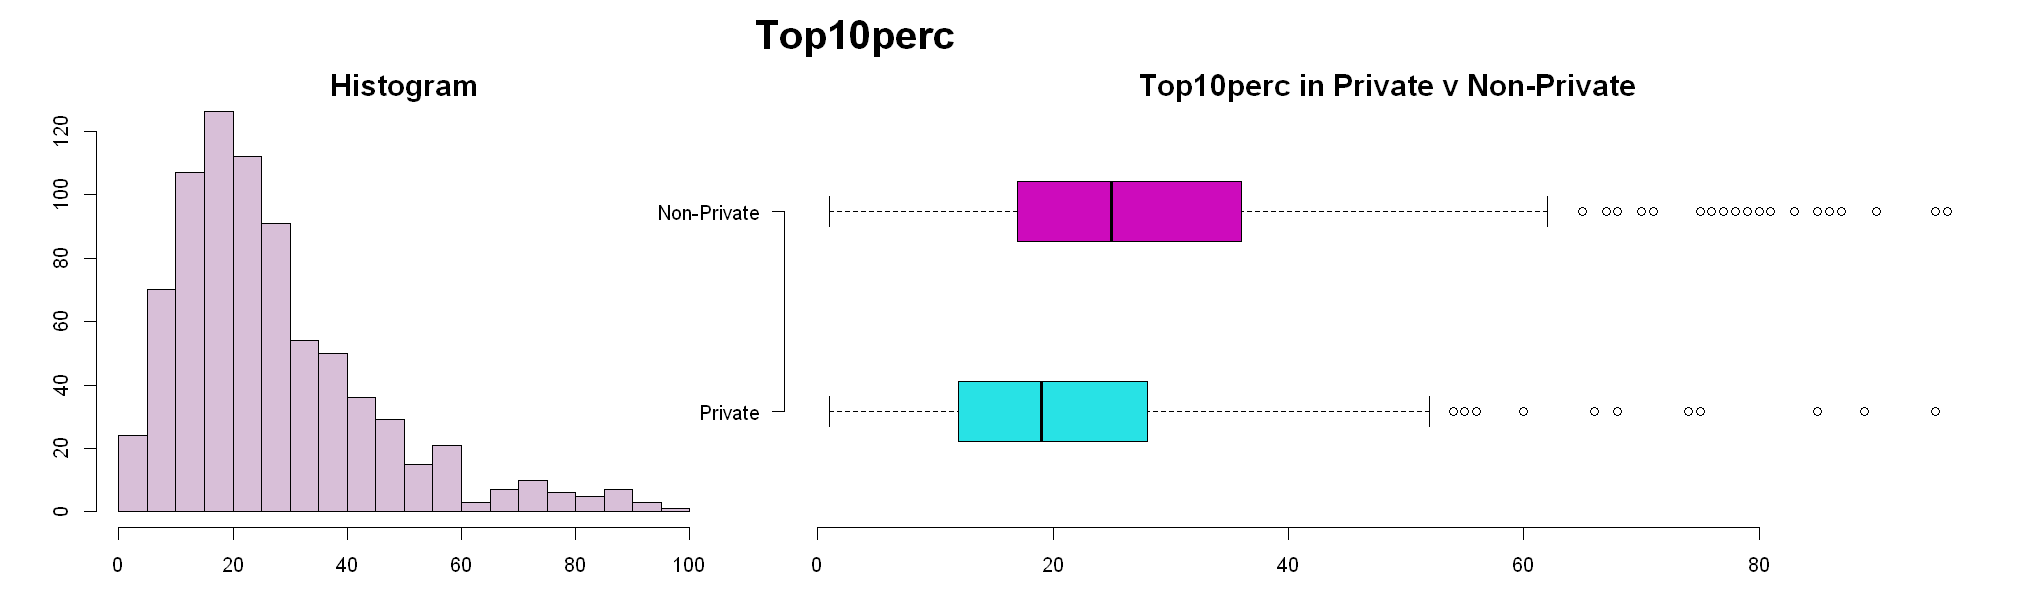

In [17]:
# Glance at Top10perc
plot.new()
par(mar=c(2,2,1,1))
par(oma=c(1,2,3,1))
plot_pars(17,5)

par(fig=c(0,0.35, 0,1), new=TRUE)
hist(college$Top10perc, nclass='FD', col='thistle', cex.main=1.5, main='Histogram')

par(fig=c(0.35,1, 0,1), new=TRUE)
boxplot(Top10perc ~ Private, data=college, horizontal=T, col=5:6, 
        boxwex=0.3, frame=F, 
        main="Top10perc in Private v Non-Private", cex.main=1.5,
        ylab="Private", names=c('Private','Non-Private'), las=1,
        xlab="Top10perc Distribution")

# mtext("Top10perc", side=3, adj=0.40, cex=1.8, line=0, outer=TRUE)
title('Top10perc', adj=0.4, cex.main=2, line=1, outer=T)

options(defop)

In [18]:
# Create new variable 'Elite'
college$Elite = as.factor(ifelse(college$Top10perc > 50, 'Yes', 'No'))
summary(college$Elite)

No Yes 
699  78

In [19]:
# Elite and private
sum(college$Elite=="Yes")
sum(college$Elite=='Yes' & college$Private=='Yes')

[1] 78

[1] 65

In [20]:
college[sample.int(nrow(college), 3), ]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
Pennsylvania State Univ. Main Campus,No,19315,10344,3450,48,93,28938,2025,10645,4060,512,2394,77,96,18.1,19,8992,63,No
Dordt College,Yes,604,562,328,25,50,1048,56,9800,2650,450,2800,61,60,12.5,17,7325,87,No
Messiah College,Yes,1742,1382,607,30,64,2258,53,10300,5080,475,1200,68,75,14.1,30,7762,89,No


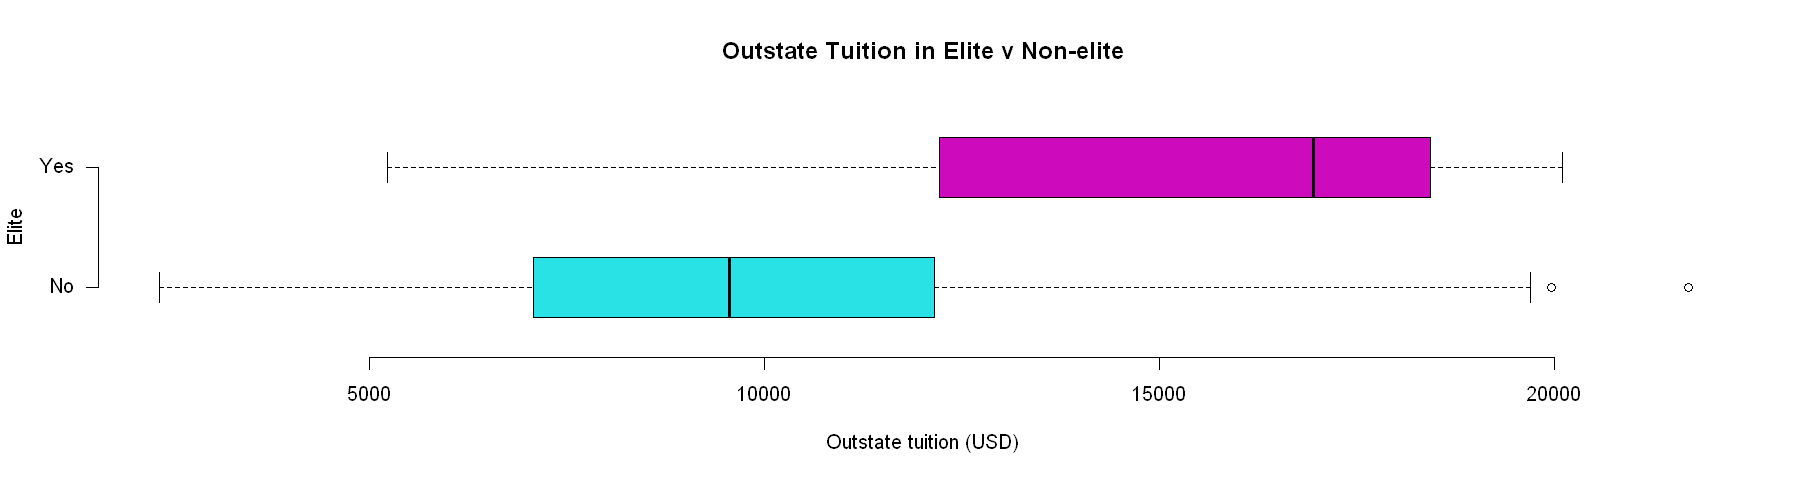

In [21]:
# Outstate Tuition - Elite
plot_pars(15,4)
boxplot(Outstate ~ Elite, data=college, horizontal=T, col=5:6, frame=F,
       main="Outstate Tuition in Elite v Non-elite", boxwex=0.5, las=1,
        ylab="Elite", xlab="Outstate tuition (USD)")
options(defop)

<div class="alert alert-block alert-info">
<a id='Observations_-_Elite'></a>
<b>Observations:</b><br>
- 83% (65 of 78) of the 'Elite' institutions are private.<br>
- The distribution of Outstate tuition in Elite universities is heavily right-skewed indicating that most of the 'Elite' institutions charge high out-of-state tuition.<br>
- The median Outstate tuition in Elite institutions is much higher than in Non-elite instituition, pointing to a clear difference between the educational accessibility for out-of-state students.
</div>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2.8c.5 - Histograms
Freedman-Diaconis method has been used for calculating bin-widths.

#### a) Student expenditure related variables

In [22]:
# Total student expenditure (with and without Outstate tuition)
# Student exp = Room.Board + Books + Personal + Outstate

college$TExp.without.O = college$Room.Board + college$Books + college$Personal
college$TExp.with.O = college$Outstate + college$Room.Board + college$Books + college$Personal

[1] "a) Student expenditure related variables"

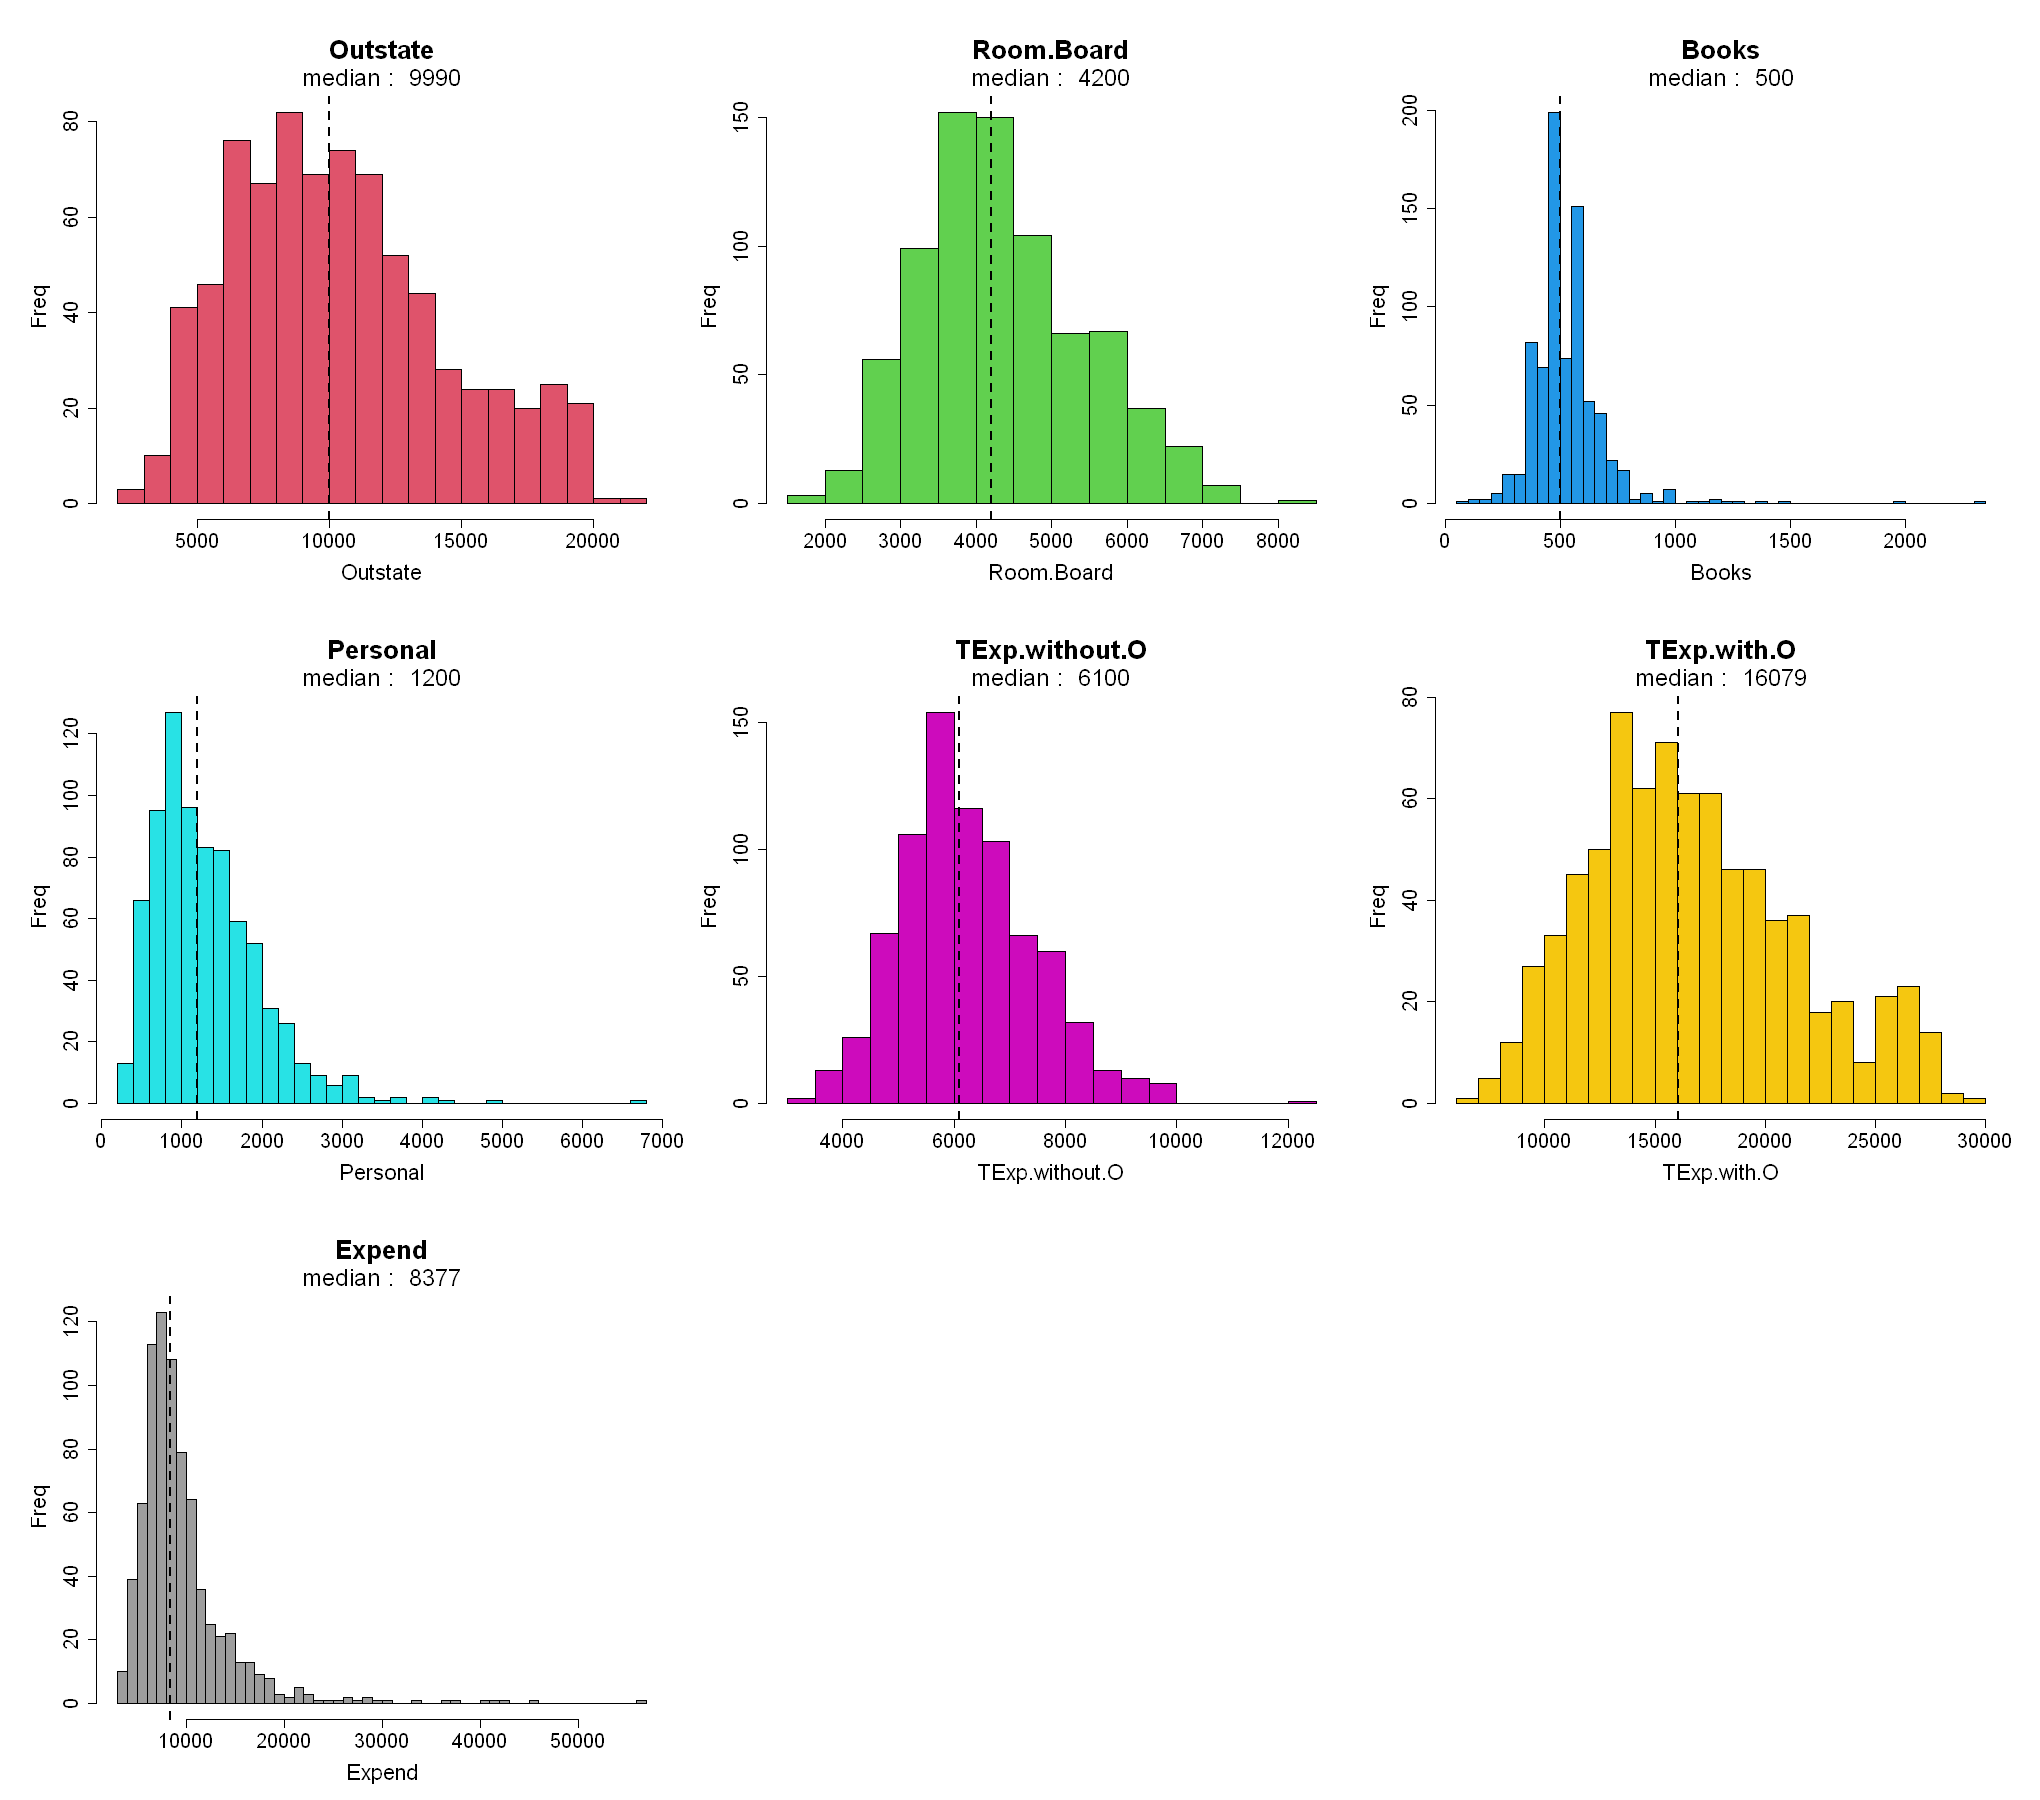

In [23]:
"a) Student expenditure related variables"
# selected variables
vars = c(unlist(strsplit('Outstate, Room.Board, Books, Personal, TExp.without.O, TExp.with.O, Expend', 
                         split=', ')))
xlabels = vars
ylabels = rep('Freq', 7)

# 2 by 3 grid
par(mfrow = c(3,3))
par(mar=c(5.1, 4.1, 4.1+2, 2.1))  # b,l,t,r
par(oma=c(0,0+2,0,0))

# resize plot params
plot_pars(17,15)

# function to generate hist
for (i in seq(length(vars))) {
    var = vars[i]
    hist(college[, var], nclass='FD', col=c(i+1),
        main=paste(var), xlab=xlabels[i], ylab=ylabels[i],
        cex.main=2, cex.lab=1.7, cex.axis=1.5)
    
    median.var = median(college[, var])
    mtext(paste('median : ', median.var), 3, adj = 0.5, line = 0.5, cex=1.2, col=)
    abline(v=median.var, lty=2, lwd=2)
}

par(defpar)
options(defop)

<div class="alert alert-block alert-info">
<a id='Observations_-_Student'></a>
<b>Observations:</b><br>
- Out-of-state tuition and Room.Board expenses are slightly positively skewed.<br>
- Expenditure on 'Books', 'Personal' expenses of students and 'Expend' (instructional exp per student) are positively skewed.<br> 
- Median Total Expenditure with Outstate tuition is \$16,079. <br> 
  &ensp;Median household income in the same year (1995) as per the <a href="https://www.census.gov/library/publications/1996/demo/p60-193.html">US Census</a> was ≈ $34,000.
</div>

[Go to Index](#Index)

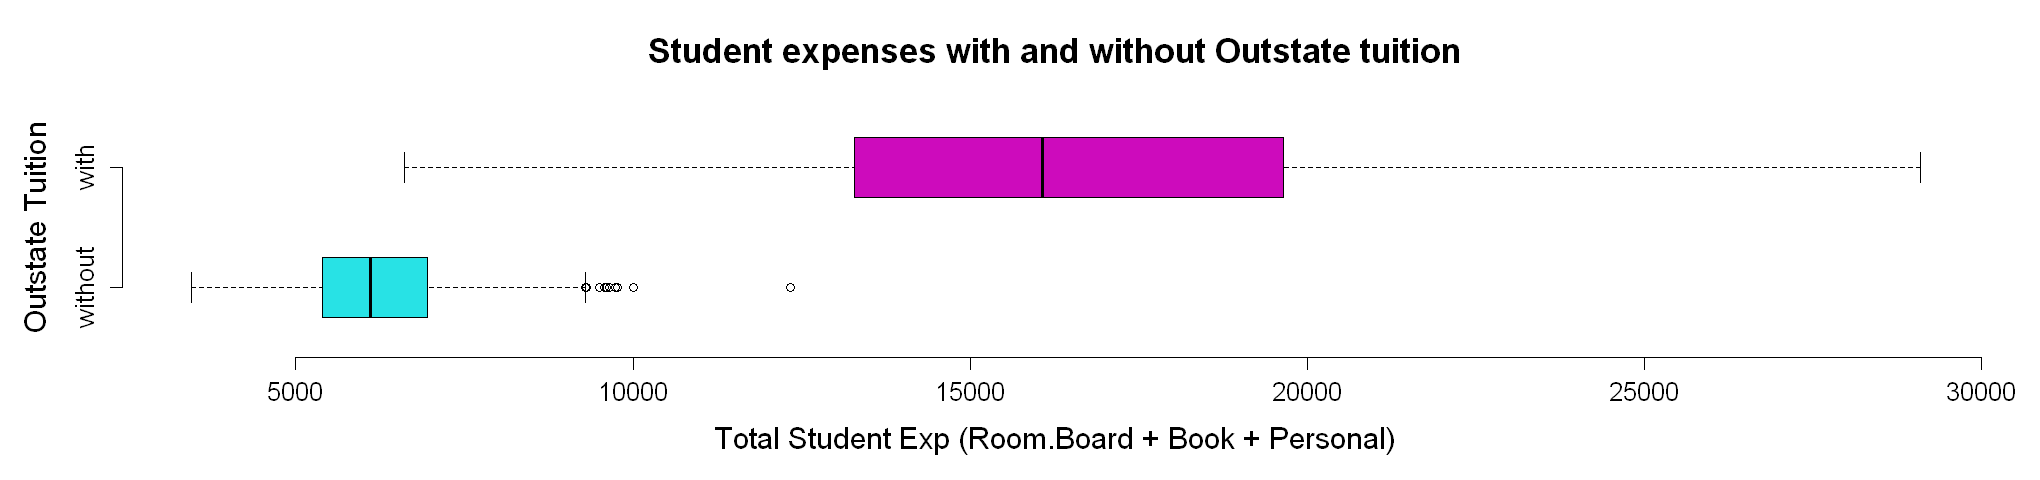

In [24]:
# boxplots - Student expenses with and without Outstate tuition
plot_pars(17,4)
par(oma=c(0,0+1,0,0))

boxplot(college[tail(names(college), 2)], horizontal=T, col=5:6,
        main='Student expenses with and without Outstate tuition',
        xlab='Total Student Exp (Room.Board + Book + Personal)',
        ylab='Outstate Tuition', names=c('without','with'), las=0,
        boxwex=0.5, cex.lab=1.5, cex.axis=1.3, cex.main=1.7, frame=F)

par(defpar)
options(defop)

In [25]:
# Skewness and Kurtosis
suppressPackageStartupMessages(
library(psych))

t(round(describe(college[vars])[,c('skew','kurtosis')], 4))

,Outstate,Room.Board,Books,Personal,TExp.without.O,TExp.with.O,Expend
skew,0.5073,0.4755,3.4716,1.7358,0.5652,0.4549,3.4460
kurtosis,-0.4255,-0.2013,28.0633,7.0446,0.6157,-0.3825,18.5875


[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### b) Faculty and student related ratios

[1] "b) Faculty and student related ratios"

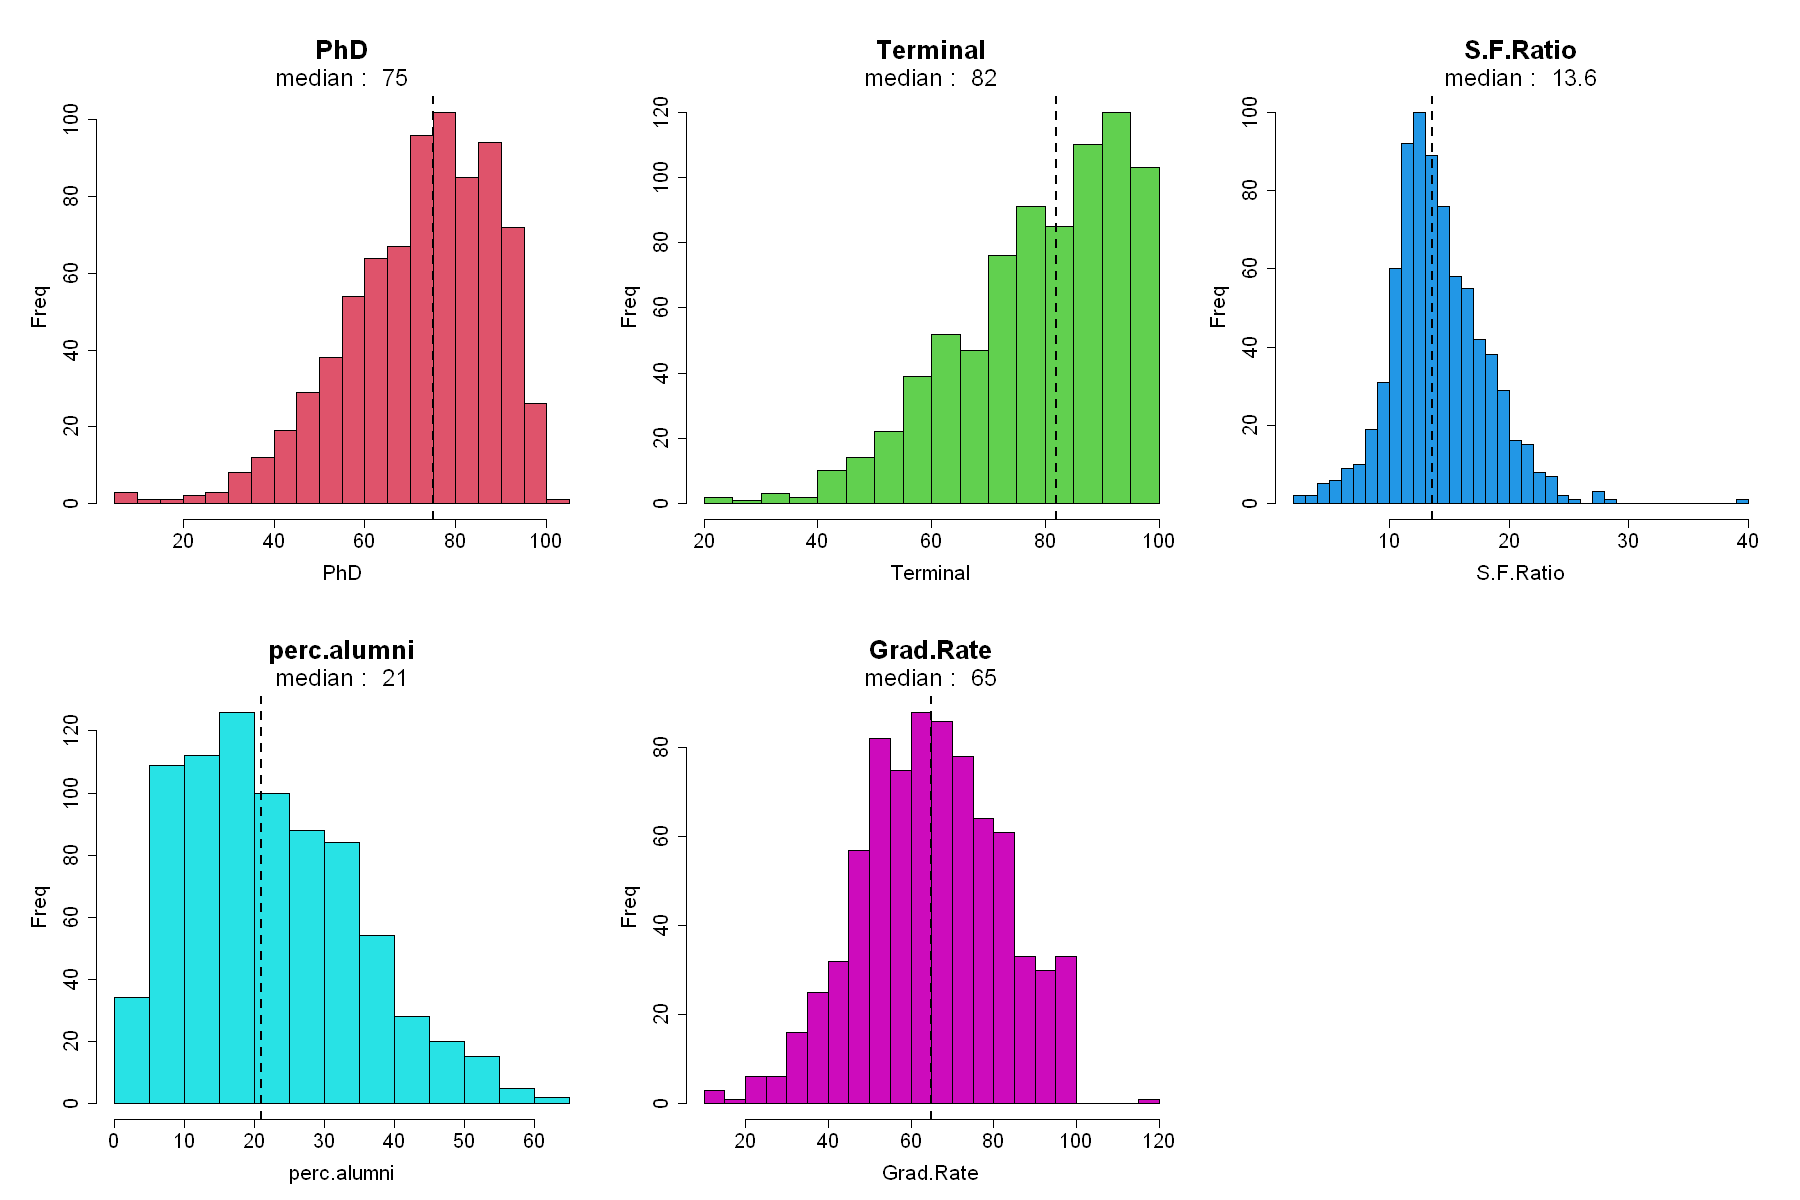

In [26]:
"b) Faculty and student related ratios"
# selected variables
vars = c(unlist(strsplit('PhD Terminal S.F.Ratio perc.alumni Grad.Rate', split=' ')))
xlabels = vars

par(mfrow=c(2,3))
par(mar=c(5.1, 4.1, 4.1+2, 2.1))  # b,l,t,r
par(oma=c(0,0+2,0,0))
plot_pars(15,10)

for (i in seq(length(vars))) {
    var = vars[i]
    hist(college[,var], nclass='FD', col=i+1,
        main=var, xlab=xlabels[i], ylab='Freq', 
         cex.main=2, cex.lab=1.6, cex.axis=1.5)
    
    median.var = median(college[, var])
    mtext(paste('median : ', median.var), 3, adj = 0.5, line = 0.5, cex=1.2)
    abline(v=median.var, lty=2, lwd=2)
}

par(defpar)
options(defop)

<div class="alert alert-block alert-info">
<a id='Observations_-_Faculty_Student_Ratios'></a>
<b>Observations:</b><br>
- PhD and Terminal are hevily left-skewed, i.e. most of the faculty is highly specialised in their respective disciplines.<br>
   &ensp; PhD has one bin > 100. This could be a mistake.<br>
- Not many colleges have student-faculty ratio > 20.<br>
- There is wide fluctuation in Graduation rate with 17.63% of institutions having graduation rates below 50%.<br> 
- IQR (Q3-Q1) of alumnis who donate ranges from 13% to 31%.<br> 

**Note**: 
    see workings below for calculations<br> 
</div>

[Go to Index](#Index)

##### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

###### PhD > 100

In [27]:
# Institutions with PhD > 100
cbind(rownames(college)[which(college$PhD > 100)], college[which(college$PhD > 100), 'PhD'])

Texas A&M University at Galveston,103


###### Graduation rate

In [28]:
## Graduation rate
summary(college$Grad.Rate)

## No. of Istitutions with graduation rate < 50%
length(which(college$Grad.Rate < 50))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   53.00   65.00   65.46   78.00  118.00 

[1] 137

In [29]:
## % of Istitutions with graduation rate < 50%
round(137/nrow(college)*100, 2)

# alternatively
# percentile = ecdf(college$Grad.Rate)
# percentile(49.99)*100

[1] 17.63

###### Donor alumnis

In [30]:
# Donor alumnis
summary(college$perc.alumni)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   13.00   21.00   22.74   31.00   64.00 

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2.8c.6 - Further data exploration

#### a) Spending patterns - private vs non-private

In [31]:
# Proportion of Private
a = data.frame(table(college$Private))
names(a) = c('Private', 'Count')
a$Prop = round(prop.table(table(college$Private)), 3)
a$Median.Personal = tapply(college$Personal, college$Private, median)
a[,'>1649'] = tapply(college$Personal, college$Private, function(x) sum(x > 1649))
a

Private,Count,Prop,Median.Personal,>1649
<fct>,<int>,<table>,<dbl>,<int>
No,212,0.273,1649,106
Yes,565,0.727,1100,103


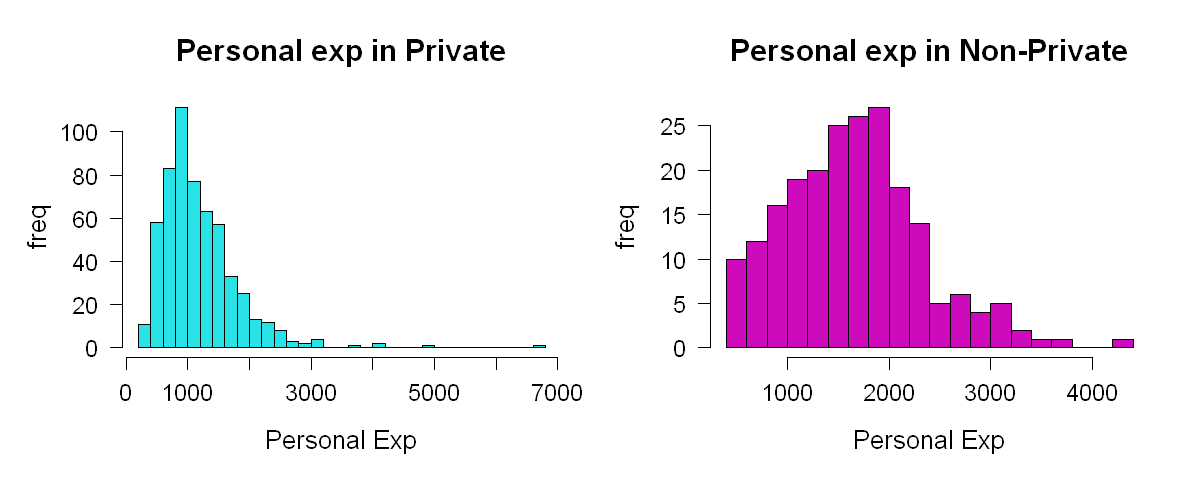

In [32]:
# Histograms
par(mfrow=c(1,2))
par(oma=c(0,0+1,0,0))
plot_pars(10,4)
hist(college$Personal[college$Private=='Yes'], col=5, cex.main=1.5, cex.lab=1.3, cex.axis=1.2, 
     las=1, main='Personal exp in Private', xlab='Personal Exp', ylab='freq', nclass='FD')
hist(college$Personal[college$Private!='Yes'], col=6, cex.main=1.5, cex.lab=1.3, cex.axis=1.2, 
     las=1, main='Personal exp in Non-Private', xlab='Personal Exp', ylab='freq', nclass='FD')
par(defpar)
options(defop)

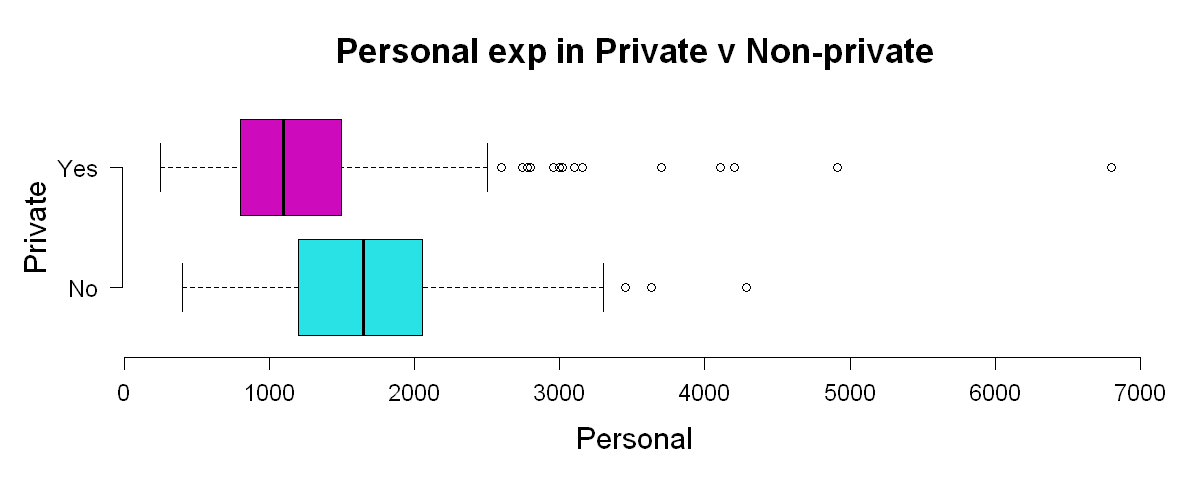

In [33]:
# Boxplot - Student personal exp in Private v Non-private
par(oma=c(0,0+1,0,0))
plot_pars(10,4)

boxplot(Personal ~ Private, data=college, horizontal=T, col=5:6, 
       main='Personal exp in Private v Non-private', las=1,
       cex.main=1.7, cex.lab=1.5, cex.axis=1.2, frame=F)

par(defpar)
options(defop)

<div class="alert alert-block alert-info">
<a id='Observations_-_Student_spending'></a>
<b>Observations:</b><br>
- Distribution in private is highly positively skewed while distribution in non-private is moderately positively skewed.<br> 
- Median personal spending by students in non-private (\$1649) is higher than in private (\$1100).<br>
- The number of institutions where Personal spending is > \$1649 (median(non-private)) is almost similar for both private (103) and non-private (106).
</div>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### b) Most sought after college/university
Institutions with high 
- Top10perc
- Top25perc
- Apps
- No. of Apps per Enroll
- No. of Enroll per Accept

##### Factors selected

In [34]:
## Selected factors
vars = c(unlist(strsplit('Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad', split=', ')))

# Creating subset of dataframe
admission.data = college[,vars]


## Calculating ratios

# Application ratio
admission.data$apr = round(admission.data$Apps / admission.data$Enroll * 100)

# Acceptance rate
admission.data$acr = round(admission.data$Accept / admission.data$Apps * 100)

# Enrollment rate
admission.data$enr = round(admission.data$Enroll / admission.data$Accept * 100)

str(admission.data)

'data.frame':	777 obs. of  9 variables:
 $ Apps       : int  1660 2186 1428 417 193 587 353 1899 1038 582 ...
 $ Accept     : int  1232 1924 1097 349 146 479 340 1720 839 498 ...
 $ Enroll     : int  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : int  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : int  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: int  2885 2683 1036 510 249 678 416 1594 973 799 ...
 $ apr        : num  230 427 425 304 351 372 343 388 457 338 ...
 $ acr        : num  74 88 77 84 76 82 96 91 81 86 ...
 $ enr        : num  59 27 31 39 38 33 30 28 27 35 ...


##### Top 100 colleges by Top10perc

In [35]:
##### Top 100 colleges by Top10perc# Top 100 colleges by Top10perc
top100_Top10perc = admission.data[order(admission.data$Top10perc, decreasing=T),][1:100,]
dim(top100_Top10perc)
head(top100_Top10perc,10)

[1] 100   9

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Massachusetts Institute of Technology,6411,2140,1078,96,99,4481,595,33,50
Harvey Mudd College,1377,572,178,95,100,654,774,42,31
University of California at Berkeley,19873,8252,3215,95,100,19532,618,42,39
Yale University,10705,2453,1317,95,99,5217,813,23,54
Duke University,13789,3893,1583,90,98,6188,871,28,41
Harvard University,13865,2165,1606,90,100,6862,863,16,74
Princeton University,13218,2042,1153,90,98,4540,1146,15,56
Georgia Institute of Technology,7837,4527,2276,89,99,8528,344,58,50
Brown University,12586,3239,1462,87,95,5643,861,26,45


##### Top 100 colleges by Top25 perc

In [36]:
# Top 100 colleges by Top25perc
top100_Top25perc = admission.data[order(admission.data$Top25perc, admission.data$Top10perc,
                                        decreasing=c(T,T)), ][1:100, ]
head(top100_Top25perc,10)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Harvey Mudd College,1377,572,178,95,100,654,774,42,31
University of California at Berkeley,19873,8252,3215,95,100,19532,618,42,39
Harvard University,13865,2165,1606,90,100,6862,863,16,74
University of California at Irvine,15698,10775,2478,85,100,12677,633,69,23
University of Pennsylvania,12394,5232,2464,85,100,9205,503,42,47
Bowdoin College,3356,1019,418,76,100,1490,803,30,41
SUNY at Buffalo,15039,9649,3087,36,100,13963,487,64,32
Massachusetts Institute of Technology,6411,2140,1078,96,99,4481,595,33,50
Yale University,10705,2453,1317,95,99,5217,813,23,54


##### Top 300 colleges by no. of applications

In [37]:
# Top 300 colleges by no. of applications
top300_Apps = admission.data[order(admission.data$Apps, decreasing=T),][1:300,]
top300_Apps[1:5,]

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Rutgers at New Brunswick,48094,26330,4520,36,79,21401,1064,55,17
Purdue University at West Lafayette,21804,18744,5874,29,60,26213,371,86,31
Boston University,20192,13007,3810,45,80,14971,530,64,29
University of California at Berkeley,19873,8252,3215,95,100,19532,618,42,39
Pennsylvania State Univ. Main Campus,19315,10344,3450,48,93,28938,560,54,33


##### Top 300 colleges by application rate (Apps / Enroll)

In [38]:
# Top 300 colleges by application rate (Apps / Enroll)
top300_apr = admission.data[order(admission.data$apr, decreasing=T),][1:300,]
head(top300_apr,5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Rutgers State University at Camden,3366,1752,232,27,79,2585,1451,52,13
Talladega College,4414,1500,335,30,60,908,1318,34,22
SUNY College at New Paltz,8399,3609,656,19,53,4658,1280,43,18
Franklin Pierce College,5187,4471,446,3,14,1818,1163,86,10
Rutgers State University at Newark,5785,2690,499,26,62,4005,1159,46,19


##### Top 300 colleges by enrollment rate (Enroll / Accept)

In [39]:
# Top 300 colleges by enrollment rate (Enroll / Accept)
top300_enr = admission.data[order(admission.data$enr, decreasing=T),][1:300,]
top300_enr[1:5,]

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
California Lutheran University,563,247,247,23,52,1427,228,44,100
Brewton-Parker College,1436,1228,1202,10,26,1320,119,86,98
Mississippi University for Women,480,405,380,19,46,1673,126,84,94
Peru State College,701,501,458,10,40,959,153,71,91
Indiana Wesleyan University,735,423,366,20,48,2448,201,58,87


In [40]:
# common
common = Reduce(intersect, list(rownames(top100_Top10perc), rownames(top100_Top25perc),
                                 rownames(top300_Apps), rownames(top300_enr), rownames(top300_apr)))
length(common)

[1] 16

###### Most Sought-after Colleges/Universities (Final list)

In [41]:
# Most Sought-after Colleges / Universities
msal = top100_Top10perc[rownames(top100_Top10perc) %in% common, ]
msal

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Massachusetts Institute of Technology,6411,2140,1078,96,99,4481,595,33,50
Yale University,10705,2453,1317,95,99,5217,813,23,54
Harvard University,13865,2165,1606,90,100,6862,863,16,74
Princeton University,13218,2042,1153,90,98,4540,1146,15,56
Brown University,12586,3239,1462,87,95,5643,861,26,45
Dartmouth College,8587,2273,1087,87,99,3918,790,26,48
University of Pennsylvania,12394,5232,2464,85,100,9205,503,42,47
Amherst College,4302,992,418,83,96,1593,1029,23,42
Wellesley College,2895,1249,579,80,96,2195,500,43,46


[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### Defined Functions

##### Function to show customized percentiles

In [42]:
# Function to show customized percentiles
custom_summary = function(df, r=NULL, p_reqd_n=NULL, p_lev_n=NULL) {   
    p_reqd=c(0, 0.10, 0.25, 0.50, 0.75, 0.90, 1)
    p_lev=c('0%','10%','25%','50%','75%','90%', '100%')   
    ndf = Filter(is.numeric, df)
    ndf_vars = colnames(ndf)
    p_reqd = c(p_reqd, p_reqd_n)
    p_reqdm = sort(p_reqd)
    p_lev = c(p_lev, p_lev_n)
    p_levm = p_lev[order(p_reqd)]
    p_levm = append(p_levm, 'Mean', which(p_levm == '50%'))
    res = data.frame(row.names=p_levm)
    for (var in ndf_vars) {
        x = ndf[,var]
        sm = data.frame("dStats" = quantile(x, p_reqdm))
        res = cbind(res, i=sm[match(rownames(res),rownames(sm)), ])
        names(res)[length(names(res))] = var
        res['Mean', var] = mean(x)
    }
    rownames(res)[which(rownames(res) == '0%')] = 'Min'
    rownames(res)[which(rownames(res) == '100%')] = 'Max'
    
    if (missing(r)) fres=res else fres=round(res,r)
    return(fres)
}

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

In [43]:
custom_summary(admission.data, 0, c(0.05,0.95), c('5%','95%'))

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min,81,72,35,1,9,139,119,15,10
5%,330,272,119,7,26,510,186,45,24
10%,458,362,154,10,31,641,210,54,26
25%,776,604,242,15,41,992,261,68,32
50%,1558,1110,434,23,54,1707,343,78,39
Mean,3002,2019,780,28,56,3700,382,75,41
75%,3624,2424,902,35,69,4005,454,85,49
90%,7675,4814,1904,50,85,10024,590,90,59
95%,11066,6979,2757,65,93,14478,705,93,67


[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### c) Further analysis of Most sought-after colleges/univeristies

In [44]:
msa = college[rownames(msal),]
table(msa$Private)


 No Yes 
  2  14 

In [45]:
custom_summary(college, r=0, c(0.05,0.95), c('5%','95%'))
options(repr.matrix.max.cols=50)
msa
options(defop)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,TExp.without.O,TExp.with.O
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min,81,72,35,1,9,139,1,2340,1780,96,250,8,24,2,0,3186,10,3452,6604
5%,330,272,119,7,26,510,20,4602,2736,350,500,44,53,8,6,4796,37,4450,9847
10%,458,362,154,10,31,641,35,5569,3051,400,600,51,59,10,8,5558,45,4809,11006
25%,776,604,242,15,41,992,95,7320,3597,470,850,62,71,12,13,6751,53,5400,13279
50%,1558,1110,434,23,54,1707,353,9990,4200,500,1200,75,82,14,21,8377,65,6100,16079
Mean,3002,2019,780,28,56,3700,855,10441,4358,549,1341,73,80,14,23,9660,65,6248,16688
75%,3624,2424,902,35,69,4005,967,12925,5050,600,1700,85,92,16,31,10830,78,6958,19650
90%,7675,4814,1904,50,85,10024,2017,16553,5950,700,2200,92,96,19,40,14841,89,7922,23430
95%,11066,6979,2757,65,93,14478,3304,18498,6382,766,2489,95,98,21,46,17975,94,8392,26030


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite,TExp.without.O,TExp.with.O
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>,<int>,<int>
Massachusetts Institute of Technology,Yes,6411,2140,1078,96,99,4481,28,20100,5975,725,1600,99,99,10.1,35,33541,94,Yes,8300,28400
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,Yes,9255,29095
Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100,Yes,8830,27315
Princeton University,Yes,13218,2042,1153,90,98,4540,146,19900,5910,675,1575,91,96,8.4,54,28320,99,Yes,8160,28060
Brown University,Yes,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97,Yes,7746,27274
Dartmouth College,Yes,8587,2273,1087,87,99,3918,32,19545,6070,550,1100,95,99,4.7,49,29619,98,Yes,7720,27265
University of Pennsylvania,Yes,12394,5232,2464,85,100,9205,531,17020,7270,500,1544,95,96,6.3,38,25765,93,Yes,9314,26334
Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100,Yes,7558,27318
Wellesley College,Yes,2895,1249,579,80,96,2195,156,18345,5995,500,700,94,98,10.6,51,21409,91,Yes,7195,25540


<div class="alert alert-block alert-info">
<a id='Observations_-_MSA'></a>
<b>Observations:</b><br>
    - 14 of the 16 (87.5%) MSAs (most sought-after institutions) are private.<br>
    - 15 (93.75%) have Grad.Rate > 90th percentile with 1 having ≈ 85th percentile with 83% grad rate.<br> 
    - Outstate tuition for 13 (81.25%) MSAs is among the top 90th percentile.<br> 
</div>

[Go to Index](#Index)

##### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

###### Percentile table (single variable)

< 90  : 1 ; 6.25
>= 90 : 15 ;  93.75

,S.N,College,Grad.Rate,Percentile,Percentile_Main
,<int>,<chr>,<int>,<dbl>,<dbl>
3,1,Harvard University,100,99.87,99.49
8,2,Amherst College,100,99.87,98.20
16,3,Grove City College,100,99.87,93.56
2,4,Yale University,99,98.58,99.87
4,5,Princeton University,99,98.58,99.49
11,6,Columbia University,99,98.58,97.68
6,7,Dartmouth College,98,97.94,98.97
5,8,Brown University,97,97.30,98.97
10,9,University of Notre Dame,97,97.30,97.81


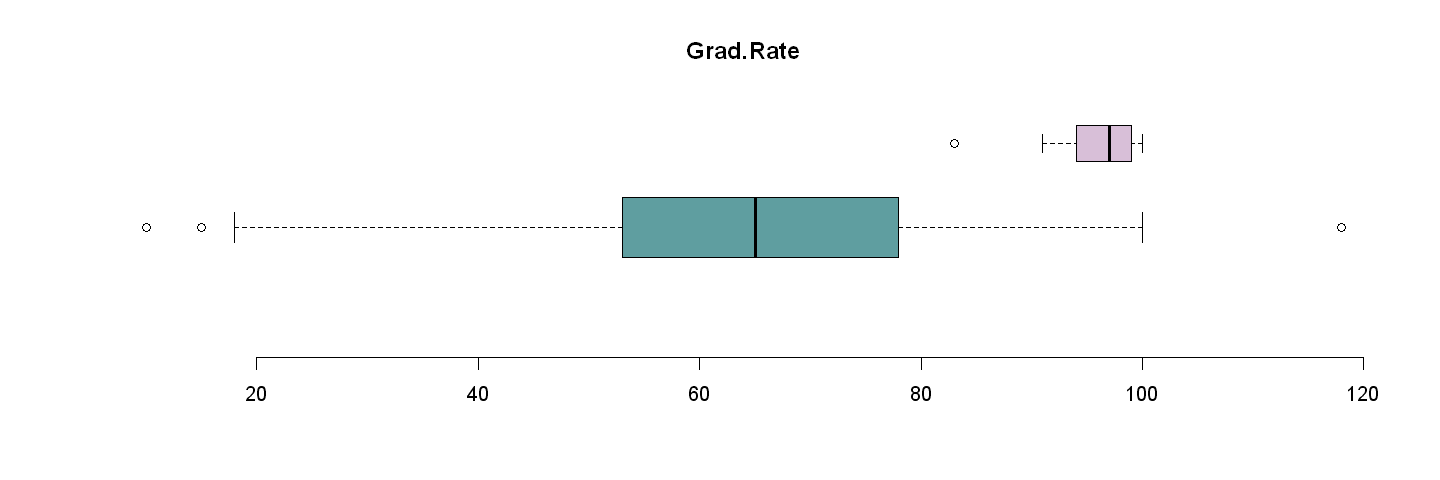



 Anderson-Darling k-sample test.

Number of samples:  2
Sample sizes:  777, 16
Number of ties: 712

Mean of  Anderson-Darling  Criterion: 1
Standard deviation of  Anderson-Darling  Criterion: 0.76416

T.AD = ( Anderson-Darling  Criterion - mean)/sigma

Null Hypothesis: All samples come from a common population.

              AD  T.AD  asympt. P-value
version 1: 30.76 38.95        4.644e-17
version 2: 31.50 39.88        2.101e-17

Warning message in ks.test(base_df[, var], subset_df[, var]):
"p-value will be approximate in the presence of ties"



	Two-sample Kolmogorov-Smirnov test

data:  base_df[, var] and subset_df[, var]
D = 0.85513, p-value = 2.206e-10
alternative hypothesis: two-sided


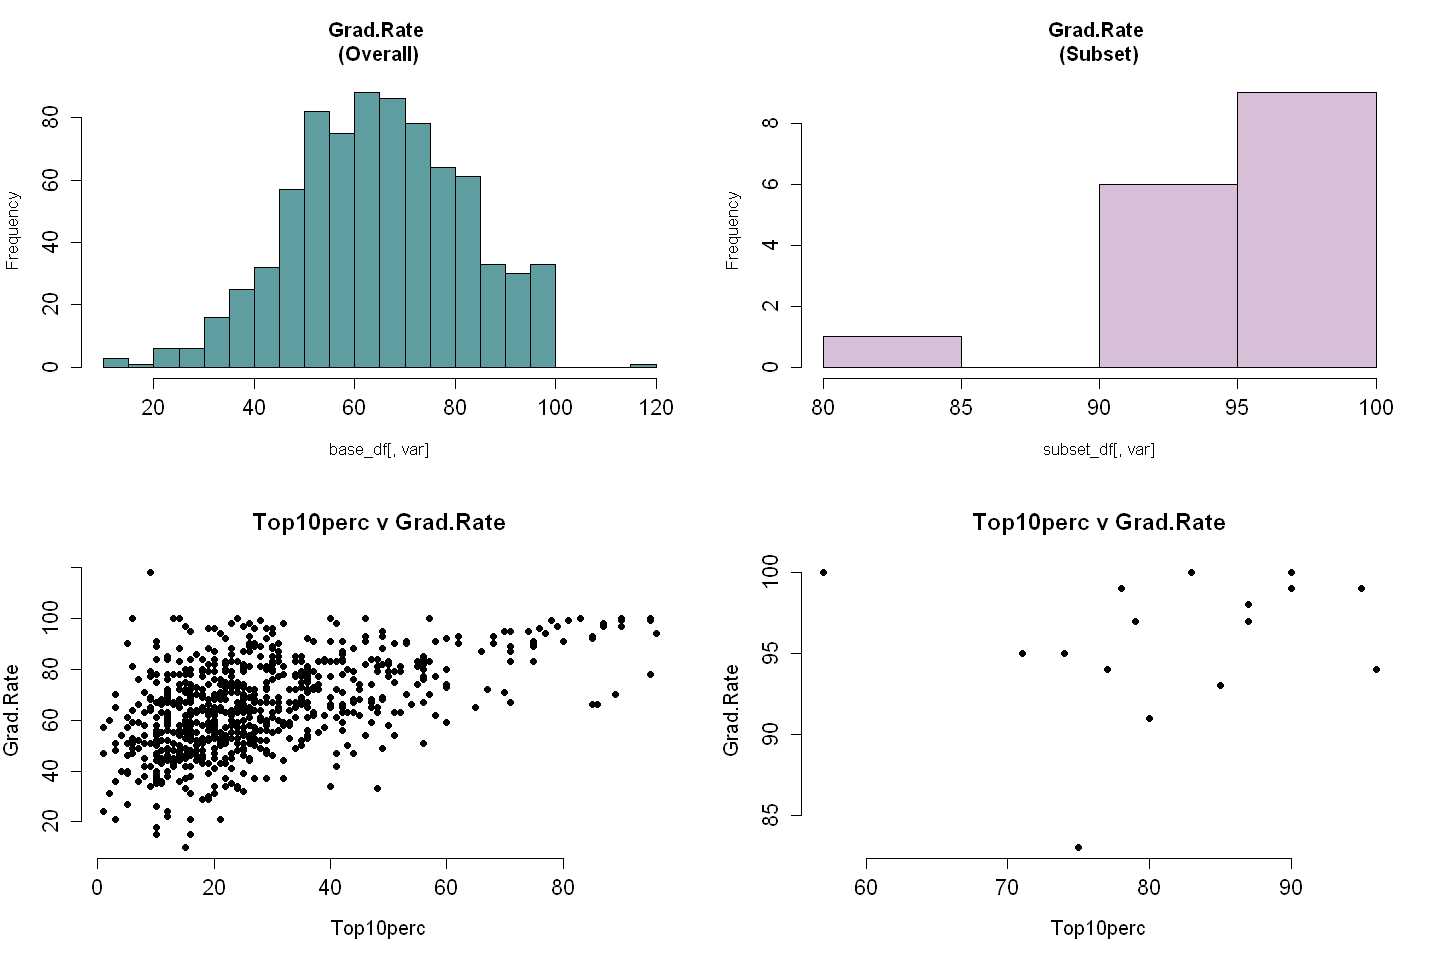

In [46]:
## Percentile table
subset_df = msa
base_df = college
var_main = 'Top10perc'
var = 'Grad.Rate'
n = nrow(subset_df)
k = 90

# Percentiles
percentiles_main = round(ecdf(base_df[,var_main])(subset_df[, var_main])*100, 2)
percentiles = round(ecdf(base_df[,var])(subset_df[,var])*100,2)
percentile_df = data.frame(rownames(subset_df), subset_df[,var], percentiles, percentiles_main)
names(percentile_df) = c('College', var, 'Percentile', 'Percentile_Main')

# Count below and above kth percentile
cat(paste('<', k, ' :', sum(percentile_df$Percentile < k),';',sum(percentile_df$Percentile < k)/n*100))
cat(paste('\n>=', k, ':', sum(percentile_df$Percentile >= k),'; ',sum(percentile_df$Percentile >= k)/n*100))
cbind(S.N=1:nrow(percentile_df), percentile_df[order(percentile_df$Percentile, decreasing=T),])


# Boxplots - Overall distribution v subset distribution
plot_pars(12,4)
boxplot(base_df[,var], horizontal=T, frame=F, boxwex=0.5, at = 0, col='cadetblue', main=var)
boxplot(subset_df[,var], horizontal=T, frame=F, boxwex=0.3, at = 0.35, col='thistle',add=T)

# Histograms - Overall and subset
plot_pars(12,8)
par(mfrow=c(2,2))
hist(base_df[,var], col='cadetblue', nclass='FD', main=paste(var, '\n(Overall)'), cex.axis=1.3)
hist(subset_df[,var], col='thistle', nclass='FD', main=paste(var, '\n(Subset)'), cex.axis=1.3)

# Scatterplots - Base variable v other variable
plot(base_df[,var_main], base_df[,var], pch=19, bty="n", cex.main=1.4, cex.lab=1.2, cex.axis=1.3,
     main=paste(var_main,'v',var), xlab=var_main, ylab=var)
plot(subset_df[,var_main], subset_df[,var], pch=19, bty="n", cex.main=1.4, cex.lab=1.2, cex.axis=1.3,
     main=paste(var_main,'v',var), xlab=var_main, ylab=var)

par(defpar)
options(defop)


## Anderson-Darling test for comparing 2 samples
library(kSamples)
sig_lvl = 0.05
ad.test(base_df[,var], subset_df[,var])
## Kolmogorov-Smirnov test
ks.test(base_df[,var], subset_df[,var])

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Boxplots

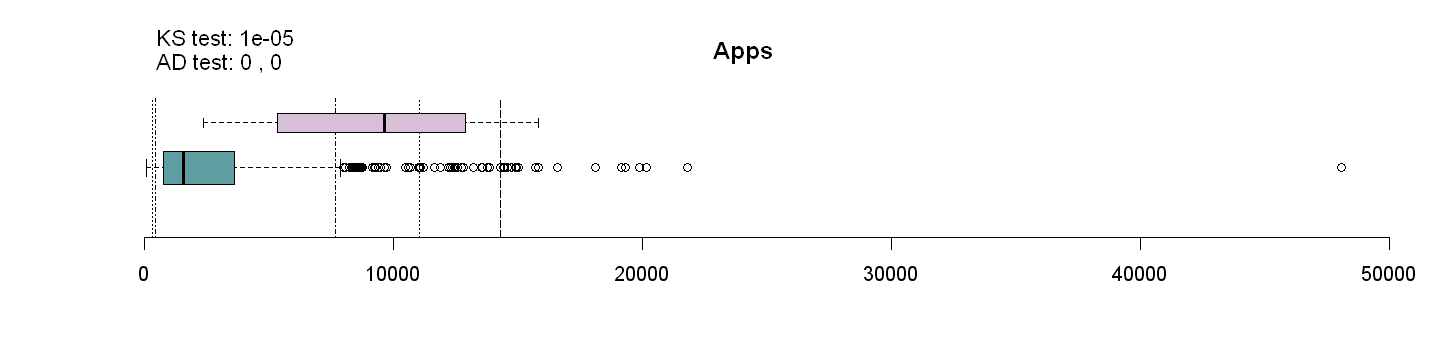

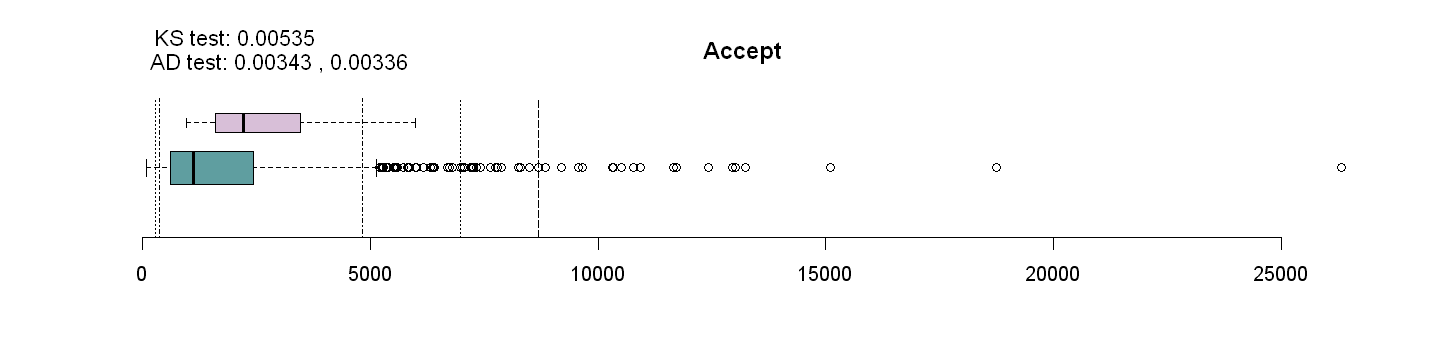

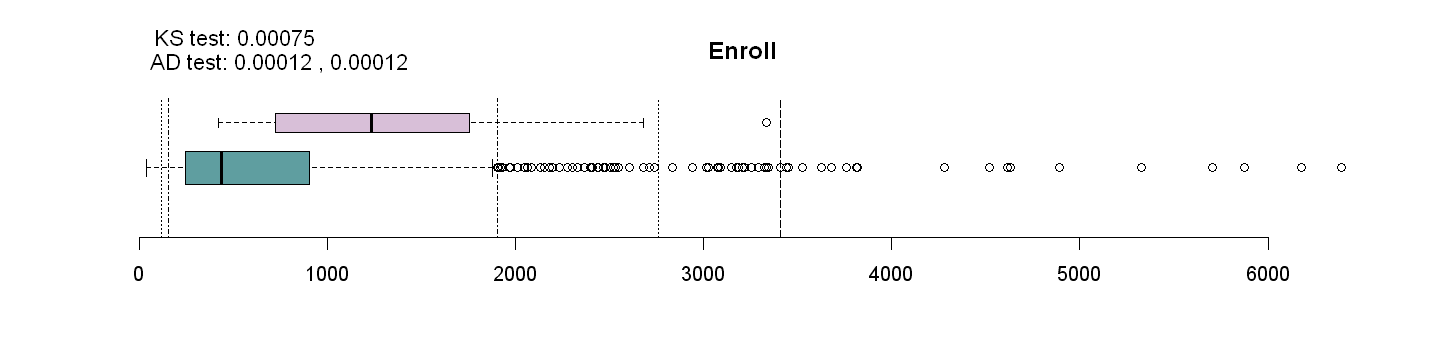

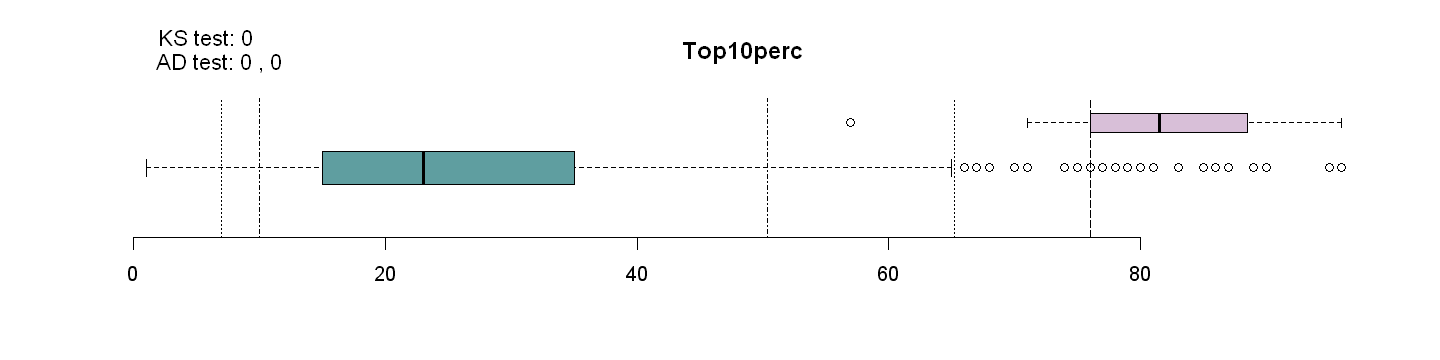

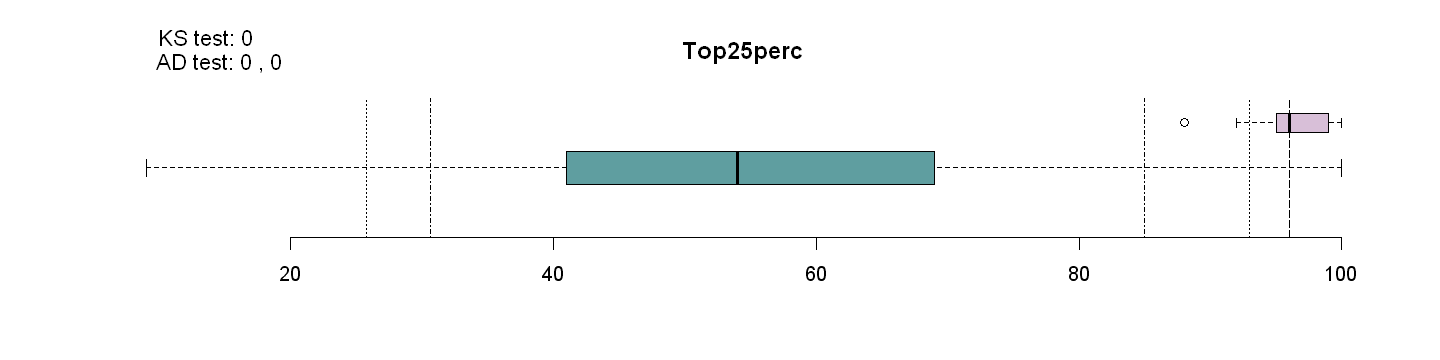

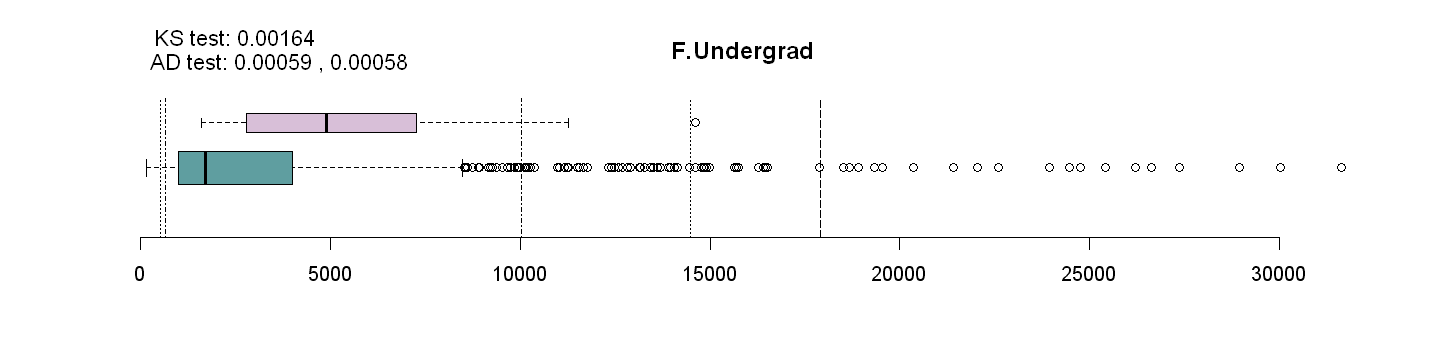

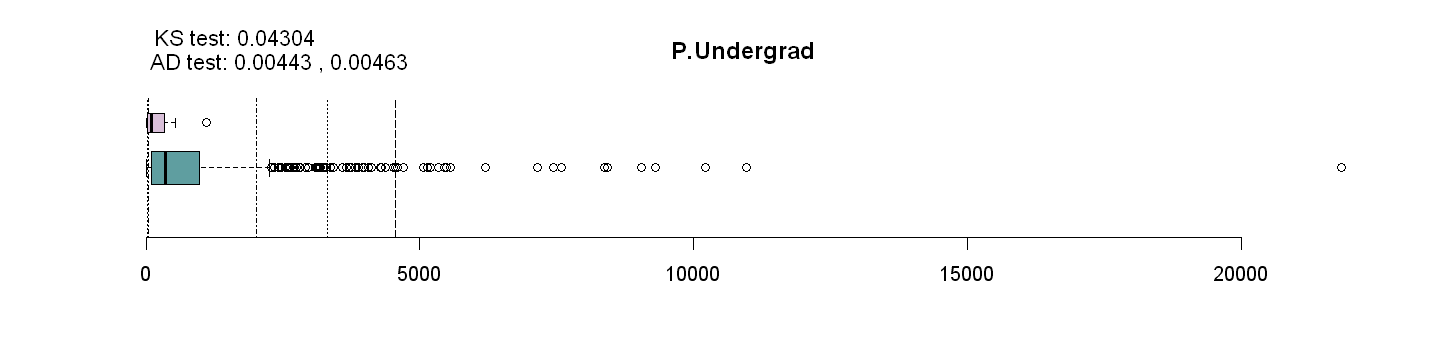

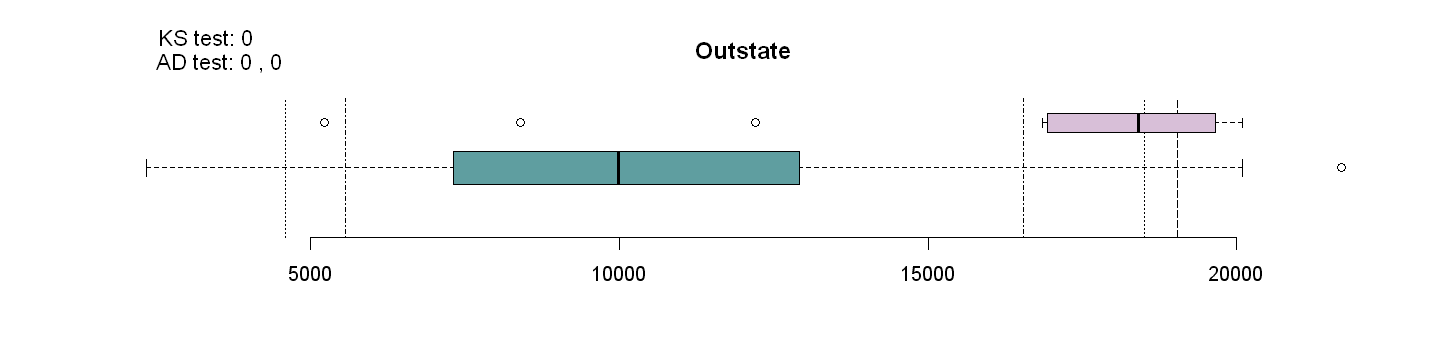

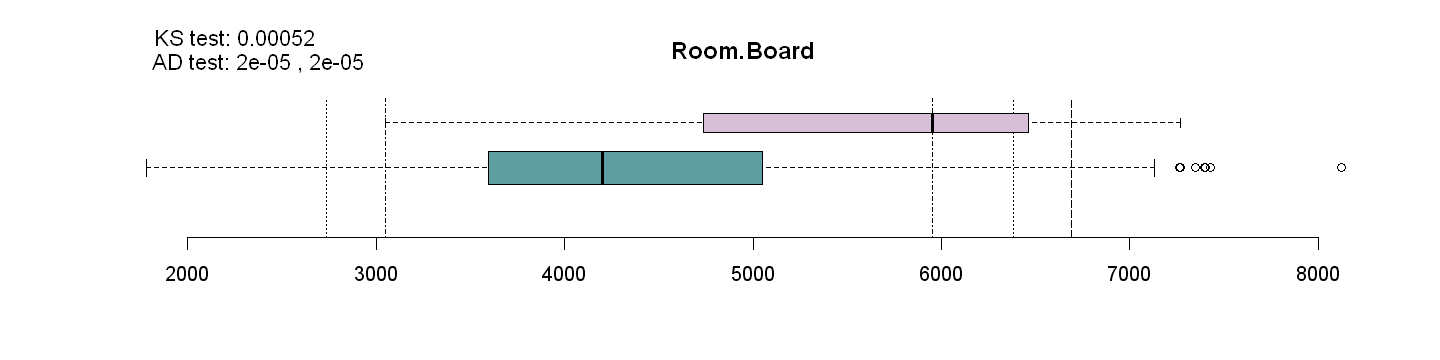

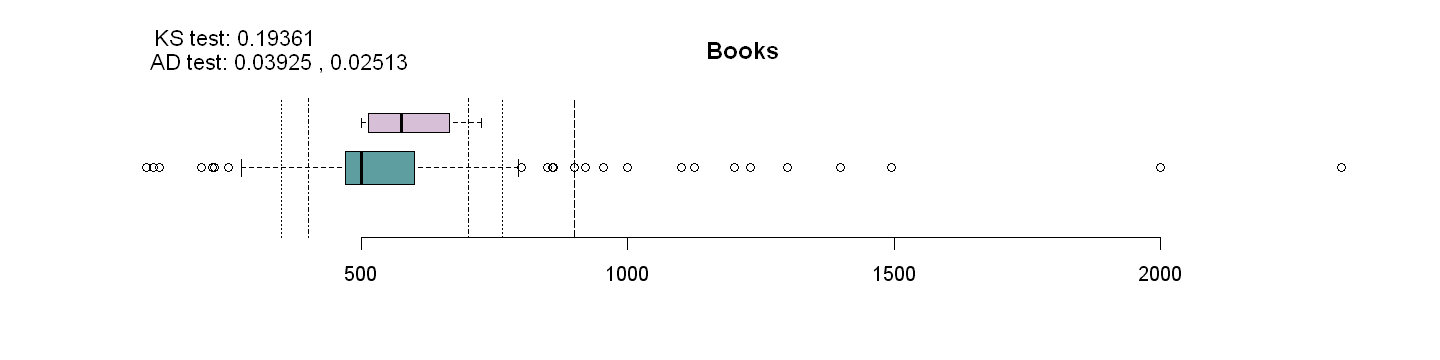

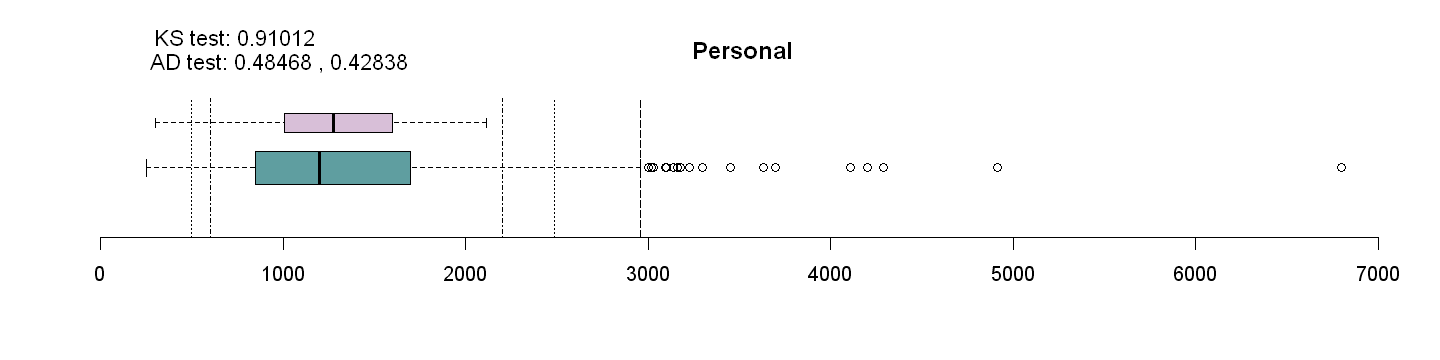

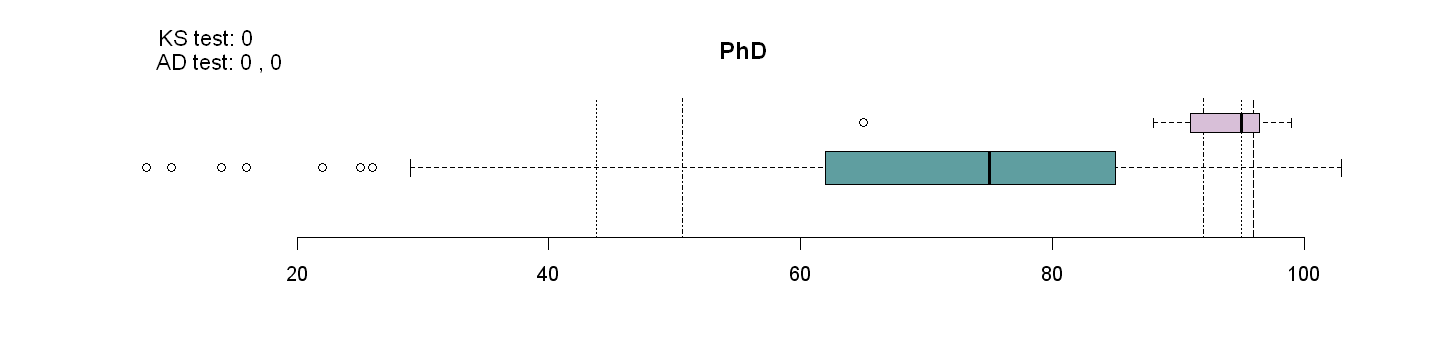

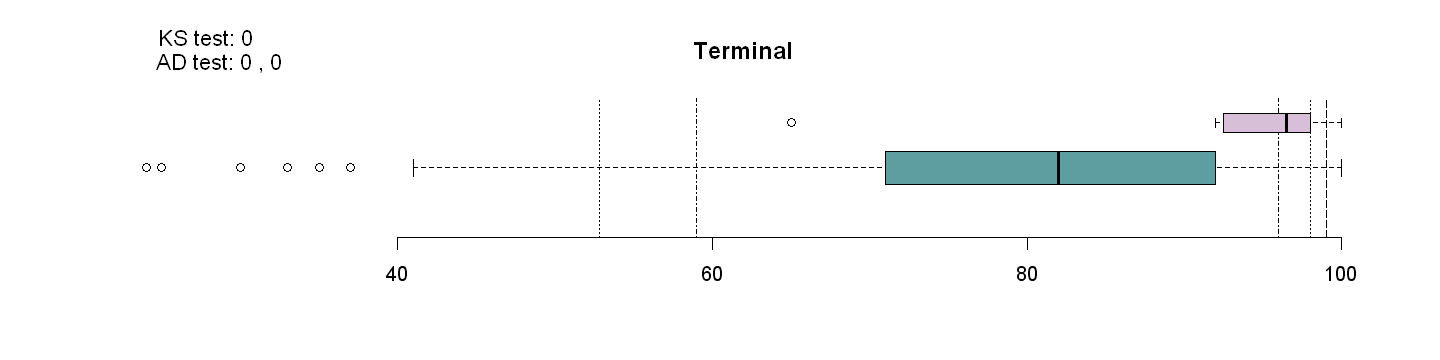

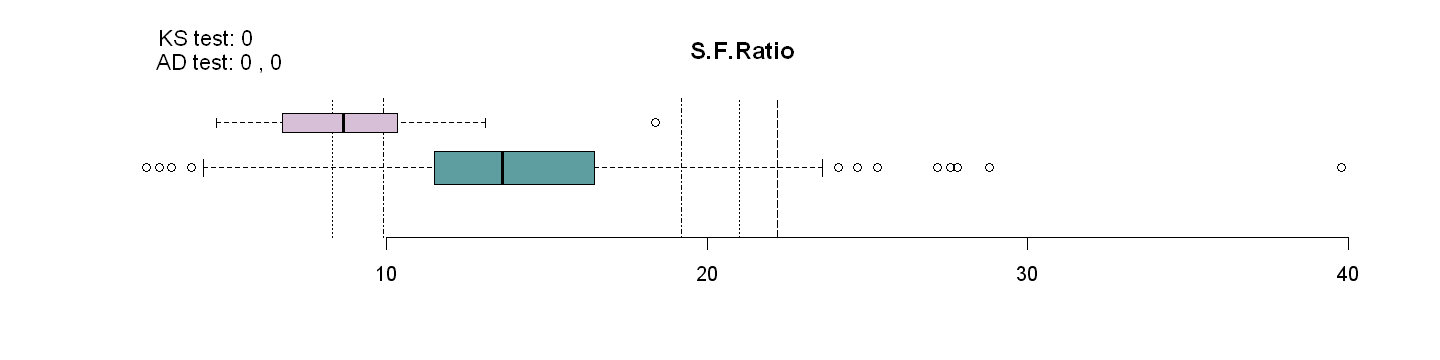

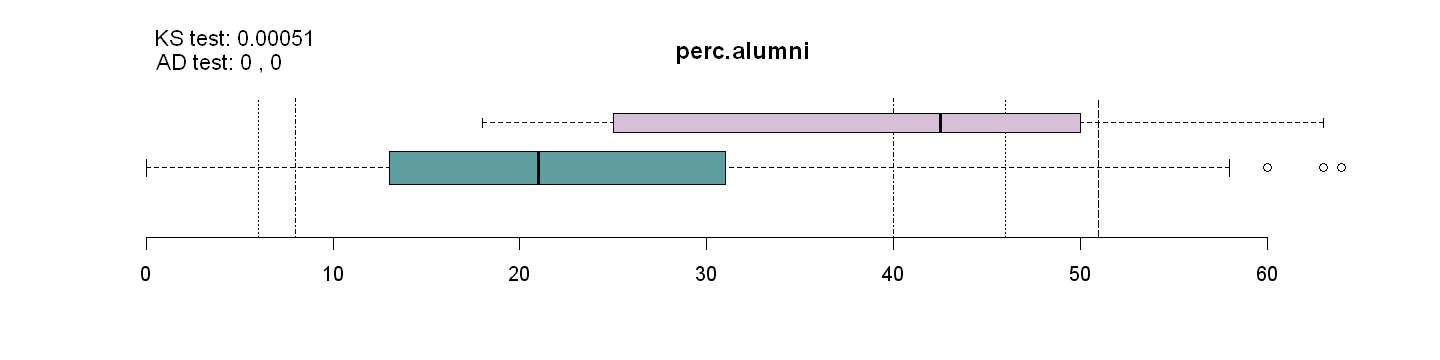

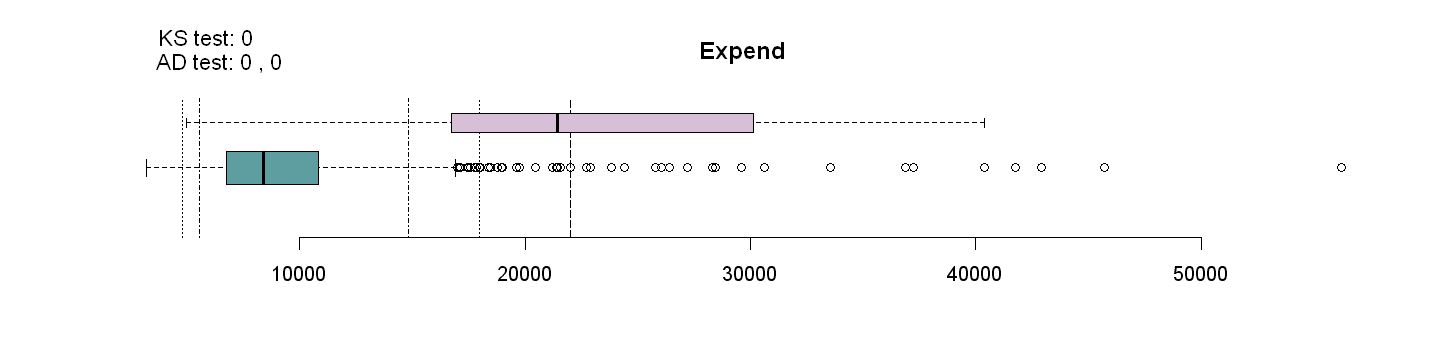

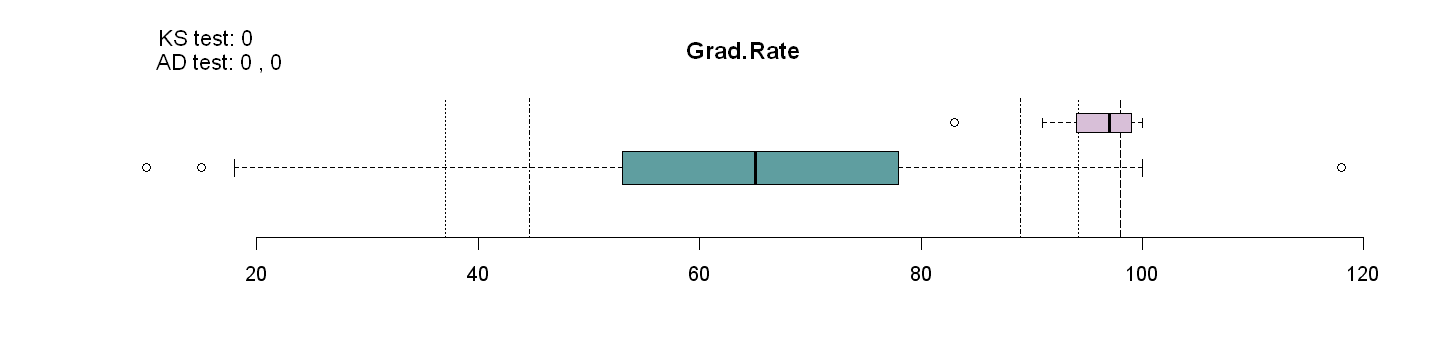

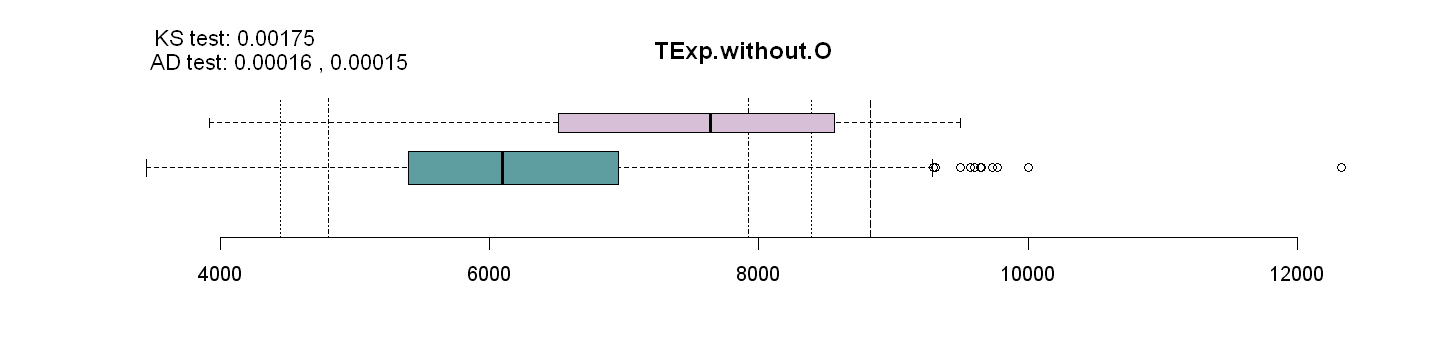

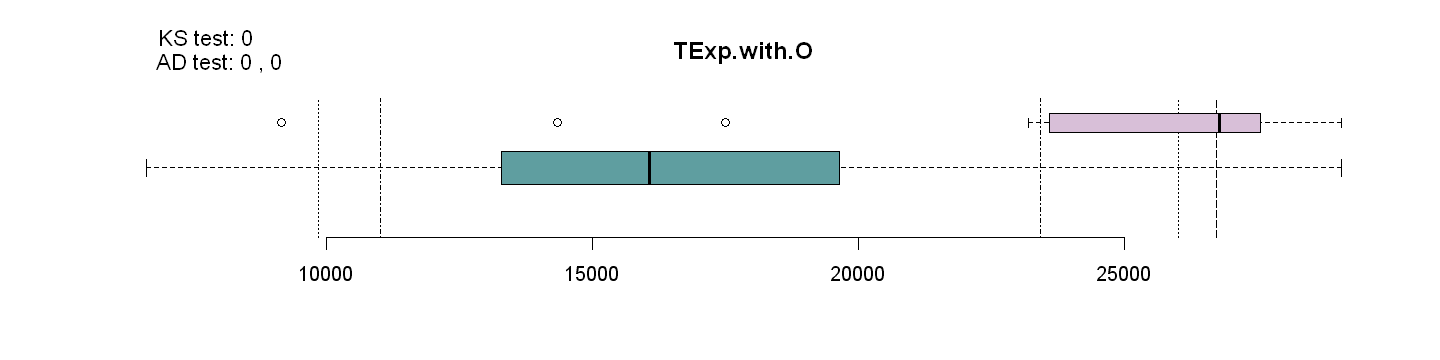

In [47]:
## Boxplots
subset_df = msa[sapply(msa, is.numeric)]
base_df = college
ovars = names(subset_df)[names(subset_df) %in% names(base_df)]

sig_lvl = 0.05

plot_pars(12,3)
for (var in ovars) {    
    adt = ad.test(base_df[,var], subset_df[,var])
    adp = paste('AD test:', round(adt$ad[[5]],5), ',', round(adt$ad[[6]],5))
    ks = suppressWarnings(ks.test(base_df[,var], subset_df[,var]))
    ksp = paste('KS test:', round(ks$p.value, 5))
    
    boxplot(base_df[,var], horizontal=T, frame=F, boxwex=0.5, at=0, col='cadetblue', main=var)
    abline(v=quantile(base_df[,var], c(0.05,0.1,0.9,0.95, 0.97426)), lty=c(3,4,4,3,5))
    boxplot(subset_df[,var], horizontal=T, frame=F, boxwex=0.3, at=0.35, col='thistle', add=T)
    mtext(ksp, 3, adj = 0.05, line = 2, cex=1.1)
    mtext(adp, 3, adj = 0.05, line = 1, cex=1.1)
}
options(defop)

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Statistical test

In [48]:
## Statistical test comparing variables and its subset
test_df = data.frame(matrix(NA, nrow=length(ovars), ncol=4))
names(test_df) = c('KS','AD(v1)','AD(v2)', 'Significant')
rownames(test_df) = ovars

for (i in seq(length(ovars))) {
    var = ovars[i]
    
    # Kolmogrov-Smirnov test
    ks = suppressWarnings(ks.test(base_df[,var], subset_df[,var]))
    ksp = round(ks$p.value, 5)
    
    # Anderson-Darling test
    adt = ad.test(base_df[,var], subset_df[,var])
    adp1 = round(adt$ad[[5]],5)
    adp2 = round(adt$ad[[6]],5)
    
    # add in df
    sig = ifelse((ksp<sig_lvl & adp1<sig_lvl & adp2<sig_lvl), 'Y', 
                                      ifelse((ksp>sig_lvl & adp1>sig_lvl & adp2>sig_lvl), 'N', '-'))
    test_df[i, ] = c(ksp, adp1, adp2, sig)
}
test_df

,KS,AD(v1),AD(v2),Significant
,<chr>,<chr>,<chr>,<chr>
Apps,1e-05,0,0,Y
Accept,0.00535,0.00343,0.00336,Y
Enroll,0.00075,0.00012,0.00012,Y
Top10perc,0,0,0,Y
Top25perc,0,0,0,Y
F.Undergrad,0.00164,0.00059,0.00058,Y
P.Undergrad,0.04304,0.00443,0.00463,Y
Outstate,0,0,0,Y
Room.Board,0.00052,2e-05,2e-05,Y


<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### d) Top 20 colleges by applications

In [49]:
## Top 20 colleges by no. of applications
top20_Apps = college[order(college$Apps, decreasing=T),][1:20,]
options(repr.matrix.max.cols=30)
top20_Apps = cbind(top20_Apps, admission.data[match(rownames(top20_Apps), rownames(admission.data)), 
                                              c('apr','acr','enr')])
custom_summary(college, r=0, c(0.05,0.95), c('5%','95%'))
top20_Apps

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,TExp.without.O,TExp.with.O
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min,81,72,35,1,9,139,1,2340,1780,96,250,8,24,2,0,3186,10,3452,6604
5%,330,272,119,7,26,510,20,4602,2736,350,500,44,53,8,6,4796,37,4450,9847
10%,458,362,154,10,31,641,35,5569,3051,400,600,51,59,10,8,5558,45,4809,11006
25%,776,604,242,15,41,992,95,7320,3597,470,850,62,71,12,13,6751,53,5400,13279
50%,1558,1110,434,23,54,1707,353,9990,4200,500,1200,75,82,14,21,8377,65,6100,16079
Mean,3002,2019,780,28,56,3700,855,10441,4358,549,1341,73,80,14,23,9660,65,6248,16688
75%,3624,2424,902,35,69,4005,967,12925,5050,600,1700,85,92,16,31,10830,78,6958,19650
90%,7675,4814,1904,50,85,10024,2017,16553,5950,700,2200,92,96,19,40,14841,89,7922,23430
95%,11066,6979,2757,65,93,14478,3304,18498,6382,766,2489,95,98,21,46,17975,94,8392,26030


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite,TExp.without.O,TExp.with.O,apr,acr,enr
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
Rutgers at New Brunswick,No,48094,26330,4520,36,79,21401,3712,7410,4748,690,2009,90,95,19.5,19,10474,77,No,7447,14857,1064,55,17
Purdue University at West Lafayette,No,21804,18744,5874,29,60,26213,4065,9556,3990,570,1060,86,86,18.2,15,8604,67,No,5620,15176,371,86,31
Boston University,Yes,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72,No,8310,26730,530,64,29
University of California at Berkeley,No,19873,8252,3215,95,100,19532,2061,11648,6246,636,1933,93,97,15.8,10,13919,78,Yes,8815,20463,618,42,39
Pennsylvania State Univ. Main Campus,No,19315,10344,3450,48,93,28938,2025,10645,4060,512,2394,77,96,18.1,19,8992,63,No,6966,17611,560,54,33
University of Michigan at Ann Arbor,No,19152,12940,4893,66,92,22045,1339,15732,4659,476,1600,90,98,11.5,26,14847,87,Yes,6735,22467,391,68,38
Michigan State University,No,18114,15096,6180,23,57,26640,4120,10658,3734,504,600,93,95,14.0,9,10520,71,No,4838,15496,293,83,41
Indiana University at Bloomington,No,16587,13243,5873,25,72,24763,2717,9766,3990,600,2000,77,88,21.3,24,8686,68,No,6590,16356,282,80,44
University of Virginia,No,15849,5384,2678,74,95,11278,114,12212,3792,500,1000,90,92,9.5,22,13597,95,Yes,5292,17504,592,34,50


<div class="alert alert-block alert-info">
<a id='Observations_-_Top_Apps'></a>
<b>Observations:</b><br>
    - 18 of the top 20 Apps colleges are non-private.<br>
    - Institutions with high applications (HAIs) also have high acceptance.<br>
    - High applications also accompany high enrollment numbers but the enrollment rates distribution for HAIs is not very different from the overall enrollment rates distribution. <br>
    This suggests that although applications are high, not many go on to enroll. Many applications could be backup applications.<br>
    - HAIs have a statistically significant distribution (compared to the overall sample) for all variables except Outstate, Room.Board, Books, Personal, S.F. Ratio, perc.alumni.<br>
<br>
<i>Note: See workings below.</i>
</div>

[Go to Index](#Index)

##### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

###### Percentile table (single variable)

< 90  : 19 ; 95
>= 90 : 1 ;  5

,S.N,College,Grad.Rate,Percentile,Percentile_Main
,<int>,<chr>,<int>,<dbl>,<dbl>
9,1,University of Virginia,95,95.62,98.97
6,2,University of Michigan at Ann Arbor,87,88.80,99.36
16,3,University of North Carolina at Chapel Hill,83,84.81,98.07
13,4,University of Illinois - Urbana,81,80.95,98.46
18,5,SUNY at Binghamton,80,79.67,97.81
4,6,University of California at Berkeley,78,76.06,99.61
1,7,Rutgers at New Brunswick,77,74.52,100.00
19,8,University of Delaware,75,71.43,97.68
10,9,Virginia Tech,73,67.70,98.84


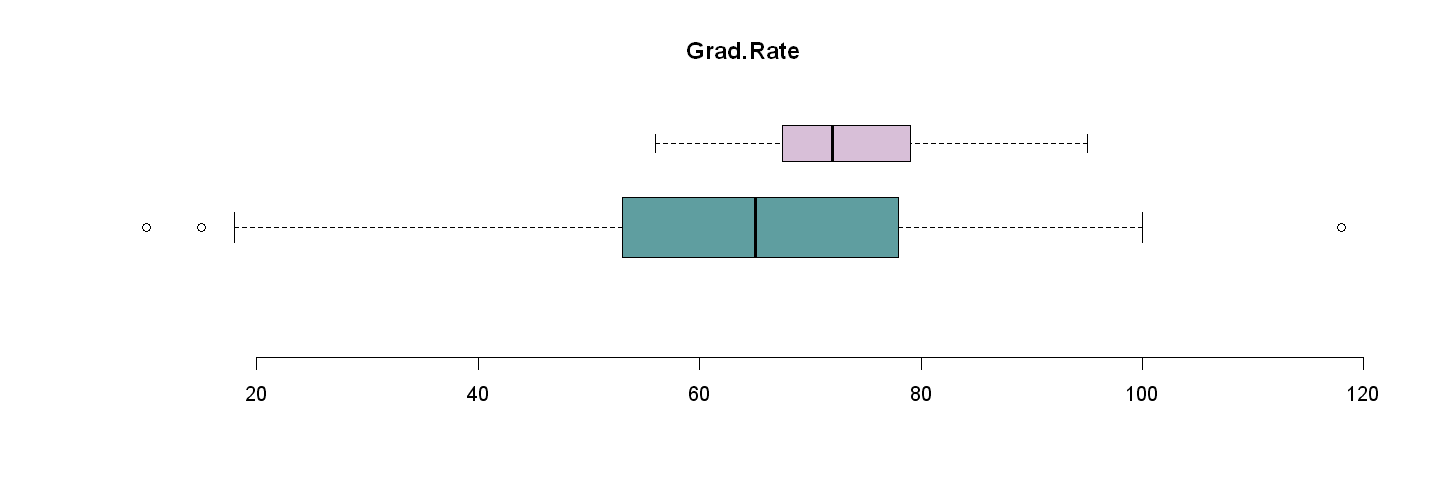



 Anderson-Darling k-sample test.

Number of samples:  2
Sample sizes:  777, 20
Number of ties: 716

Mean of  Anderson-Darling  Criterion: 1
Standard deviation of  Anderson-Darling  Criterion: 0.7632

T.AD = ( Anderson-Darling  Criterion - mean)/sigma

Null Hypothesis: All samples come from a common population.

              AD  T.AD  asympt. P-value
version 1: 3.832 3.710         0.010650
version 2: 3.970 3.887         0.009183

Warning message in ks.test(base_df[, var], subset_df[, var]):
"p-value will be approximate in the presence of ties"



	Two-sample Kolmogorov-Smirnov test

data:  base_df[, var] and subset_df[, var]
D = 0.37619, p-value = 0.008022
alternative hypothesis: two-sided


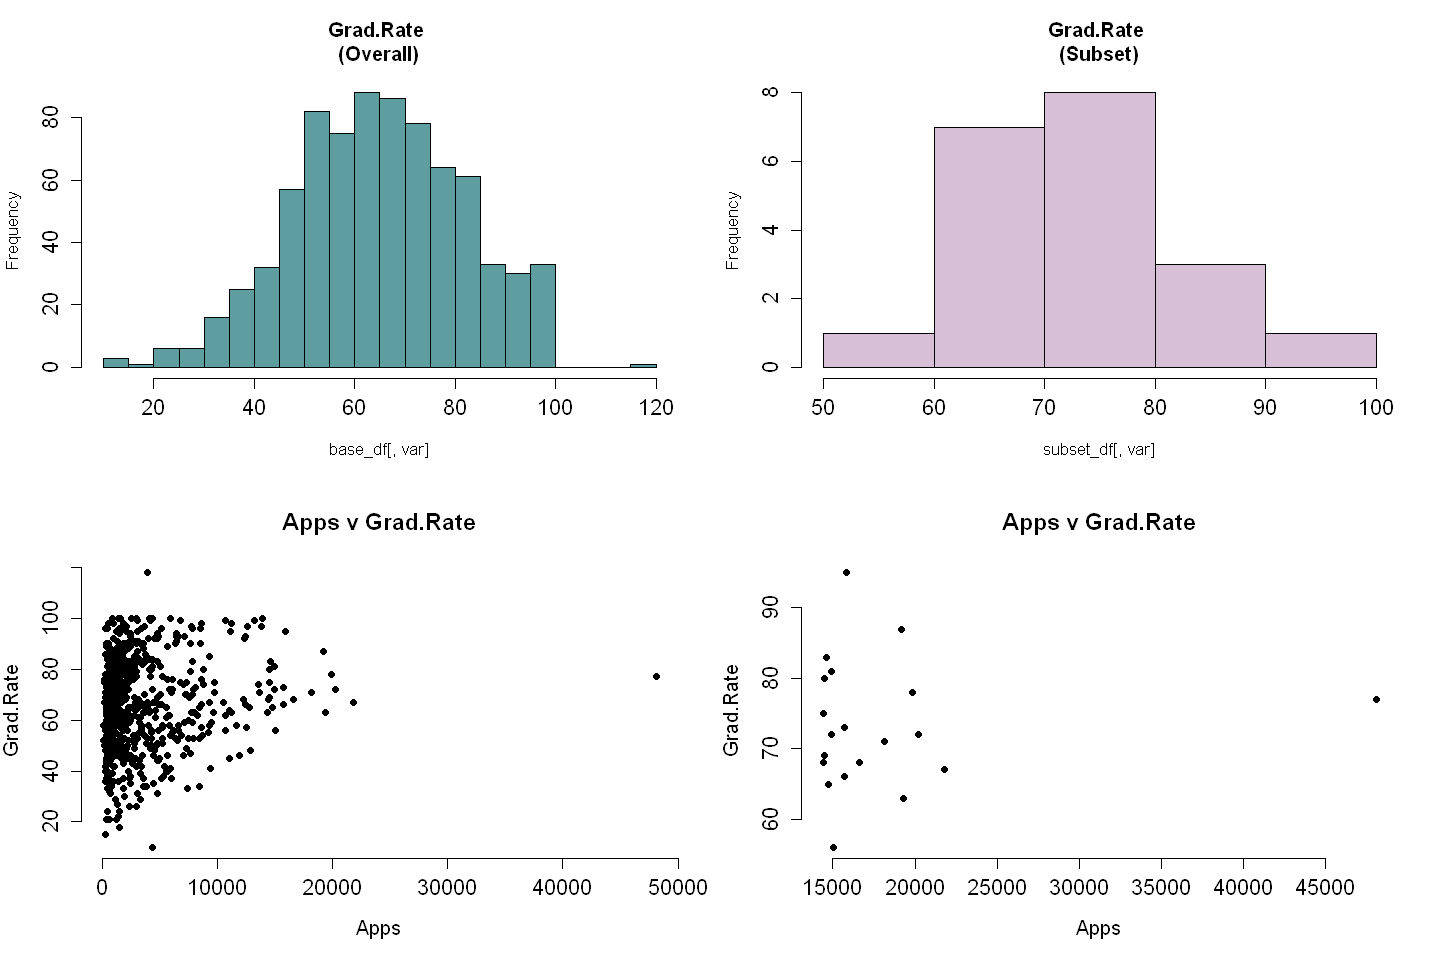

In [50]:
## Percentile table
subset_df = top20_Apps
base_df = college
var_main = 'Apps'
var = 'Grad.Rate'
n = nrow(subset_df)
k = 90

# Percentiles
percentiles_main = round(ecdf(base_df[,var_main])(subset_df[, var_main])*100, 2)
percentiles = round(ecdf(base_df[,var])(subset_df[,var])*100,2)
percentile_df = data.frame(rownames(subset_df), subset_df[,var], percentiles, percentiles_main)
names(percentile_df) = c('College', var, 'Percentile', 'Percentile_Main')

# Count below and above kth percentile
cat(paste('<', k, ' :', sum(percentile_df$Percentile < k),';',sum(percentile_df$Percentile < k)/n*100))
cat(paste('\n>=', k, ':', sum(percentile_df$Percentile >= k),'; ',sum(percentile_df$Percentile >= k)/n*100))
cbind(S.N=1:nrow(percentile_df), percentile_df[order(percentile_df$Percentile, decreasing=T),])


# Boxplots - Overall distribution v subset distribution
plot_pars(12,4)
boxplot(base_df[,var], horizontal=T, frame=F, boxwex=0.5, at = 0, col='cadetblue', main=var)
boxplot(subset_df[,var], horizontal=T, frame=F, boxwex=0.3, at = 0.35, col='thistle',add=T)

# Histograms - Overall and subset
plot_pars(12,8)
par(mfrow=c(2,2))
hist(base_df[,var], col='cadetblue', nclass='FD', main=paste(var, '\n(Overall)'), cex.axis=1.3)
hist(subset_df[,var], col='thistle', nclass='FD', main=paste(var, '\n(Subset)'), cex.axis=1.3)

# Scatterplots - Base variable v other variable
plot(base_df[,var_main], base_df[,var], pch=19, bty="n", cex.main=1.4, cex.lab=1.2, cex.axis=1.3,
     main=paste(var_main,'v',var), xlab=var_main, ylab=var)
plot(subset_df[,var_main], subset_df[,var], pch=19, bty="n", cex.main=1.4, cex.lab=1.2, cex.axis=1.3,
     main=paste(var_main,'v',var), xlab=var_main, ylab=var)

par(defpar)
options(defop)


## Anderson-Darling test for comparing 2 samples
sig_lvl = 0.05
ad.test(base_df[,var], subset_df[,var])
## Kolmogorov-Smirnov test
ks.test(base_df[,var], subset_df[,var])

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

###### Enroll v Enroll rate

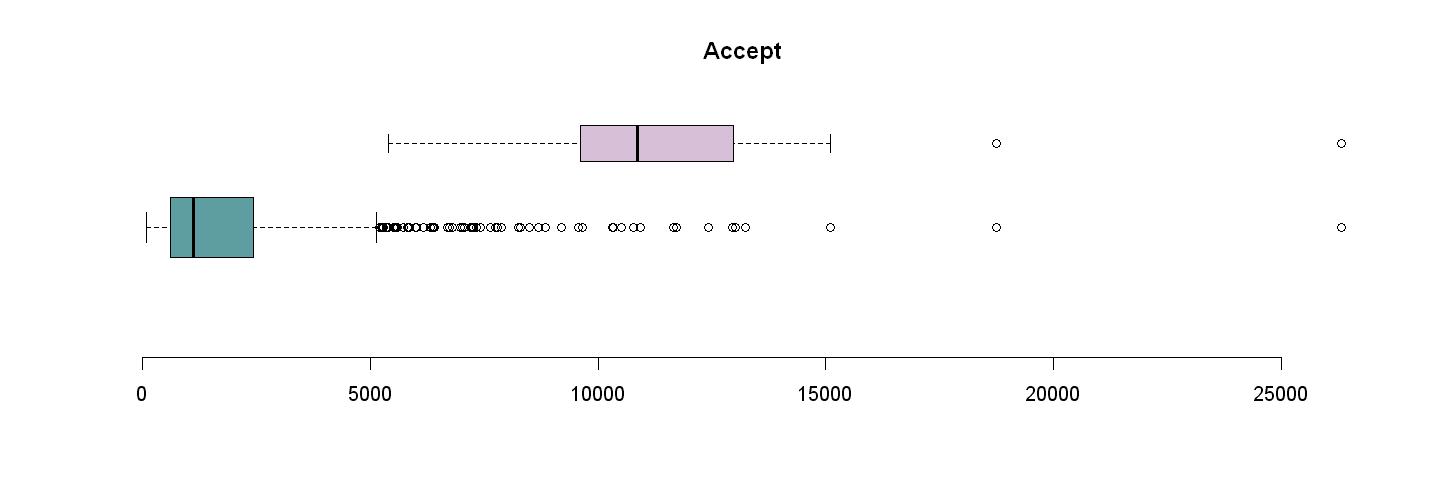

In [51]:
# Accept - No. of new Applications
plot_pars(12,4)
boxplot(college$Accept, horizontal=T, frame=F, boxwex=0.5, at = 0, col='cadetblue', main='Accept')
boxplot(top20_Apps$Accept, horizontal=T, frame=F, boxwex=0.3, at = 0.35, col='thistle',add=T)
options(defop)

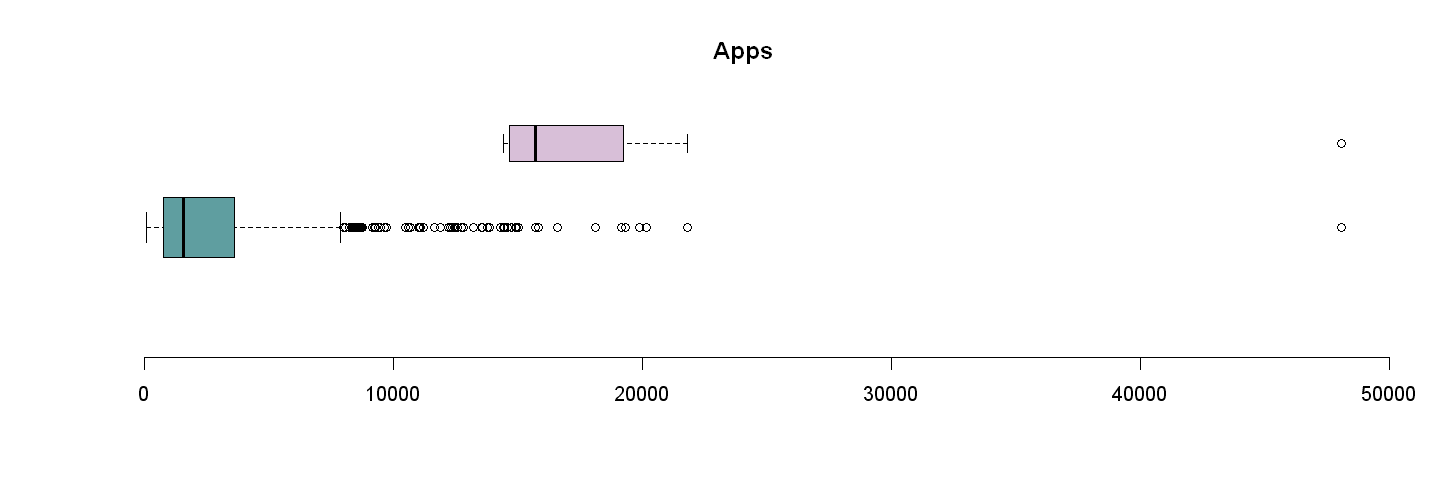

In [52]:
# Apps - No. of new Applications
plot_pars(12,4)
boxplot(college$Apps, horizontal=T, frame=F, boxwex=0.5, at = 0, col='cadetblue', main='Apps')
boxplot(top20_Apps$Apps, horizontal=T, frame=F, boxwex=0.3, at = 0.35, col='thistle',add=T)
options(defop)

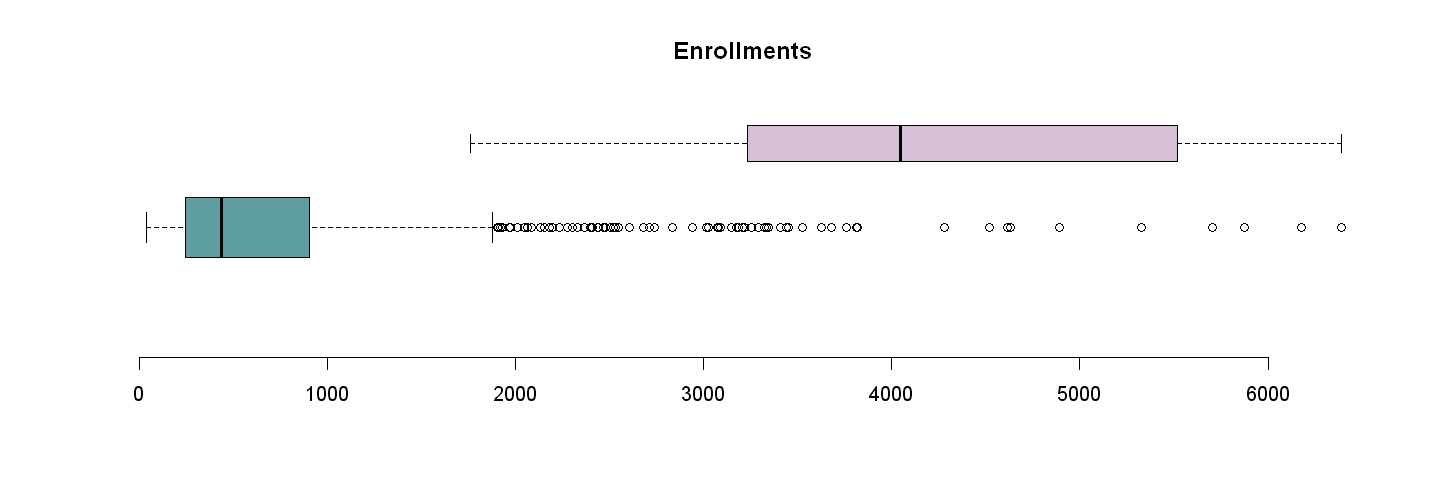

In [53]:
# Enroll - No. of new students enrolled
plot_pars(12,4)
boxplot(college$Enroll, horizontal=T, frame=F, boxwex=0.5, at = 0, col='cadetblue', main='Enrollments')
boxplot(top20_Apps$Enroll, horizontal=T, frame=F, boxwex=0.3, at = 0.35, col='thistle',add=T)
options(defop)

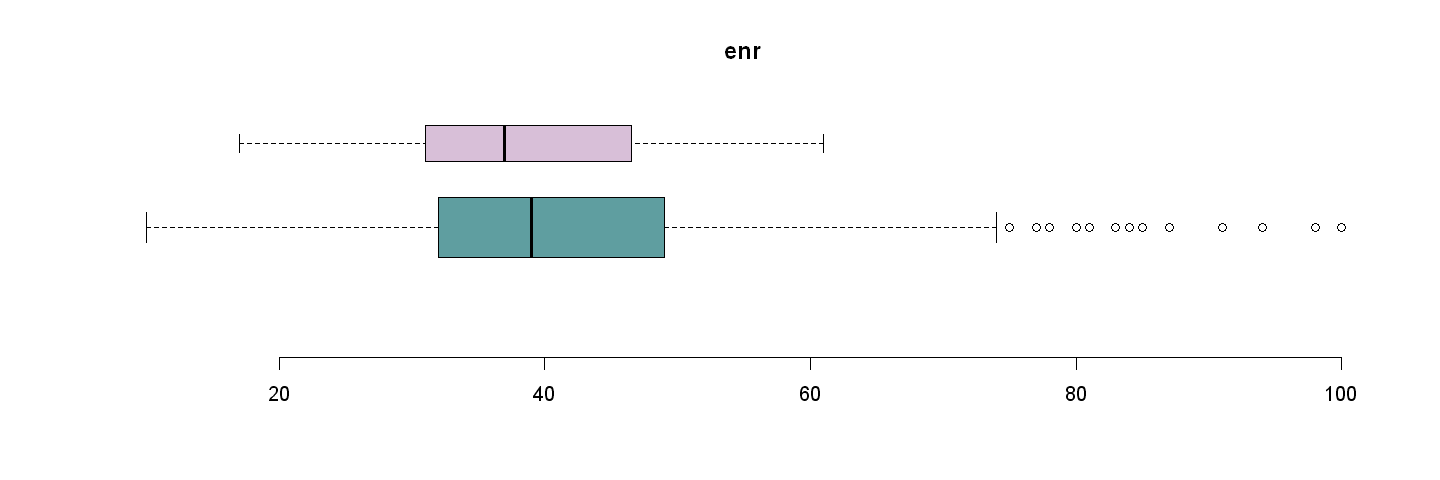

In [54]:
# Enroll rate - No. of new students enrolled / No. of applications accepted
plot_pars(12,4)
boxplot(admission.data$enr, horizontal=T, frame=F, boxwex=0.5, at = 0, col='cadetblue', main='enr')
boxplot(top20_Apps$enr, horizontal=T, frame=F, boxwex=0.3, at = 0.35, col='thistle',add=T)
options(defop)

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Boxplots

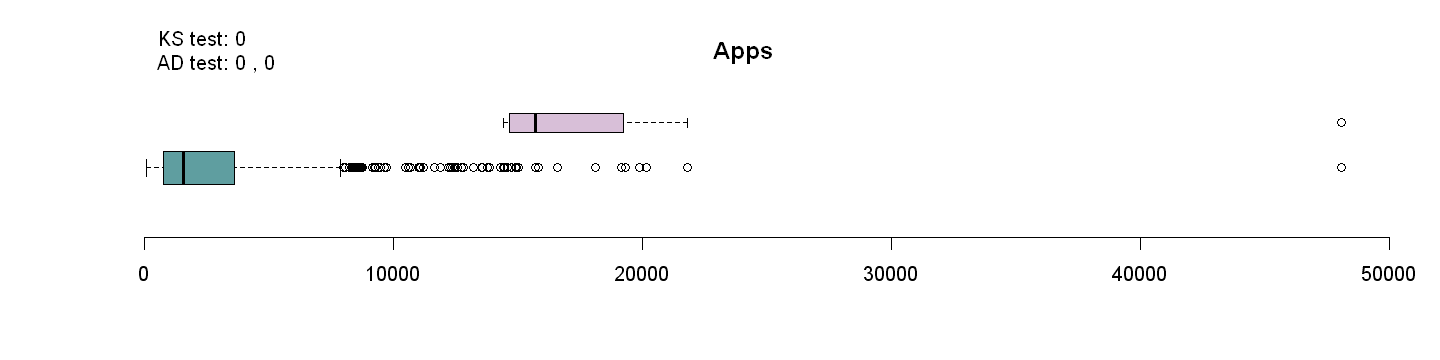

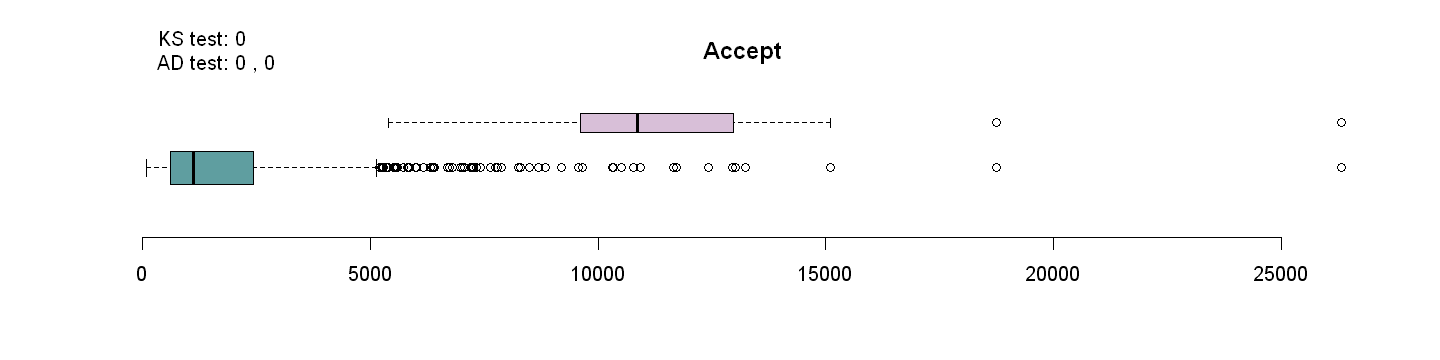

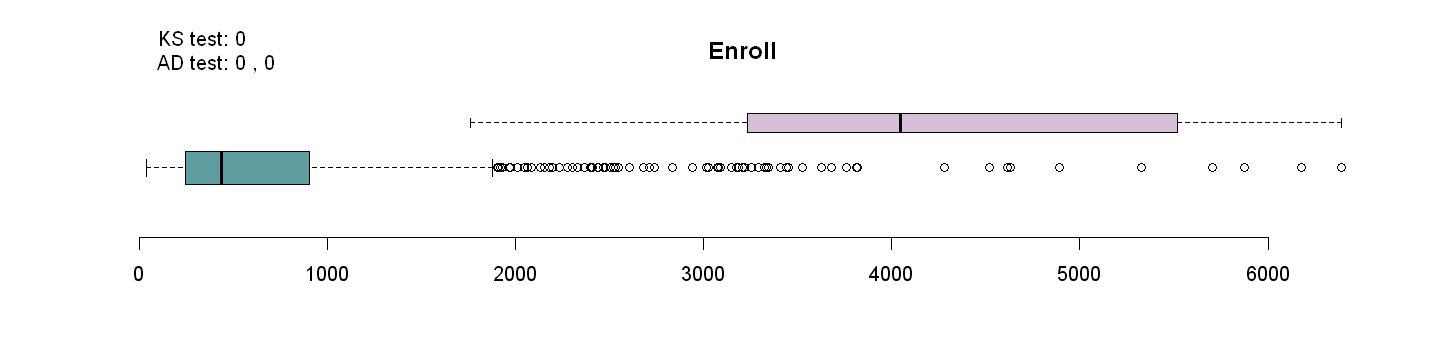

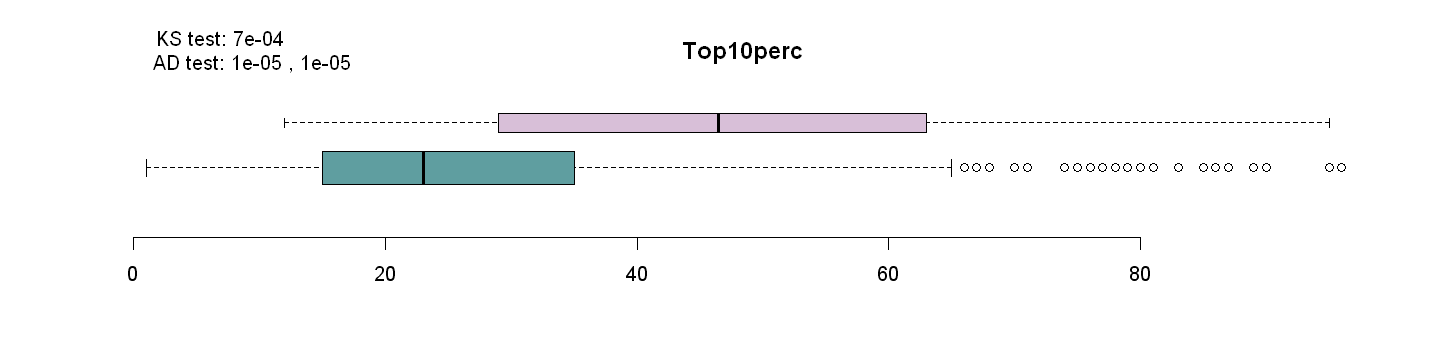

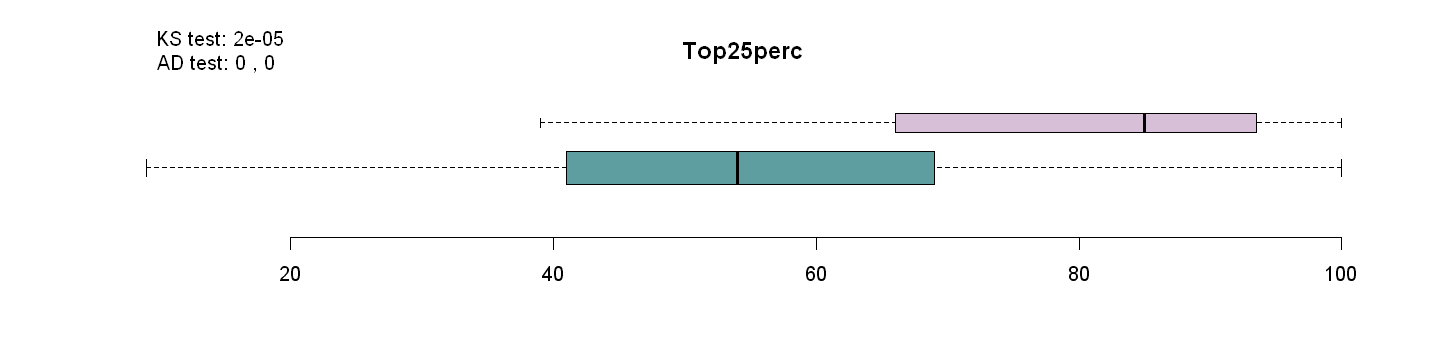

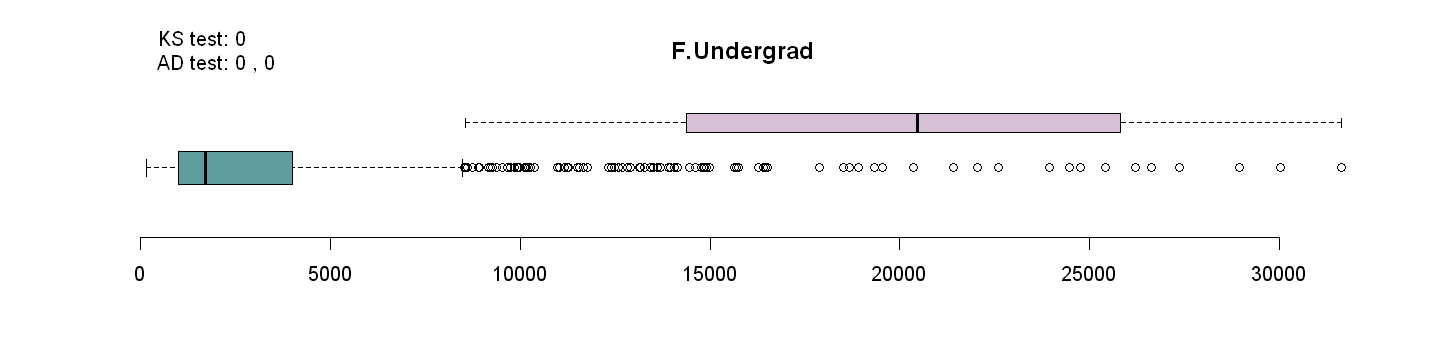

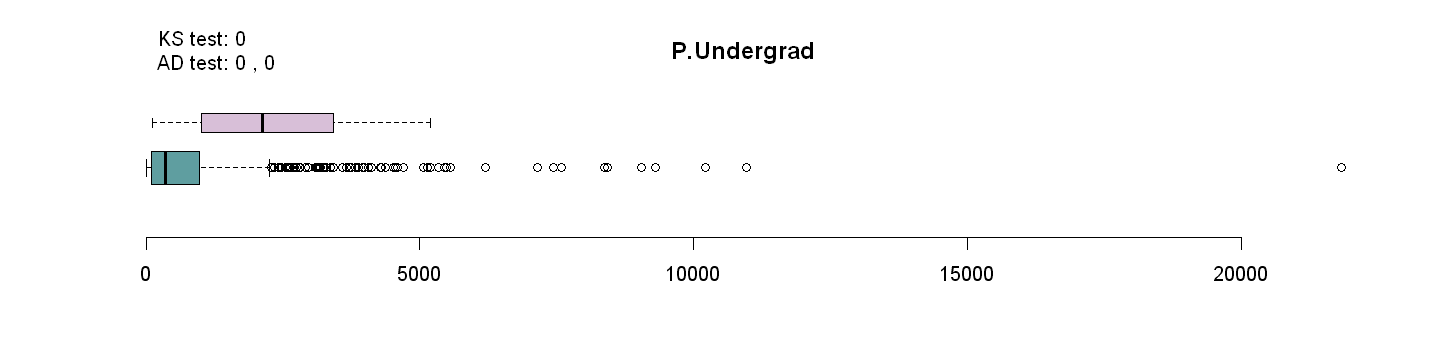

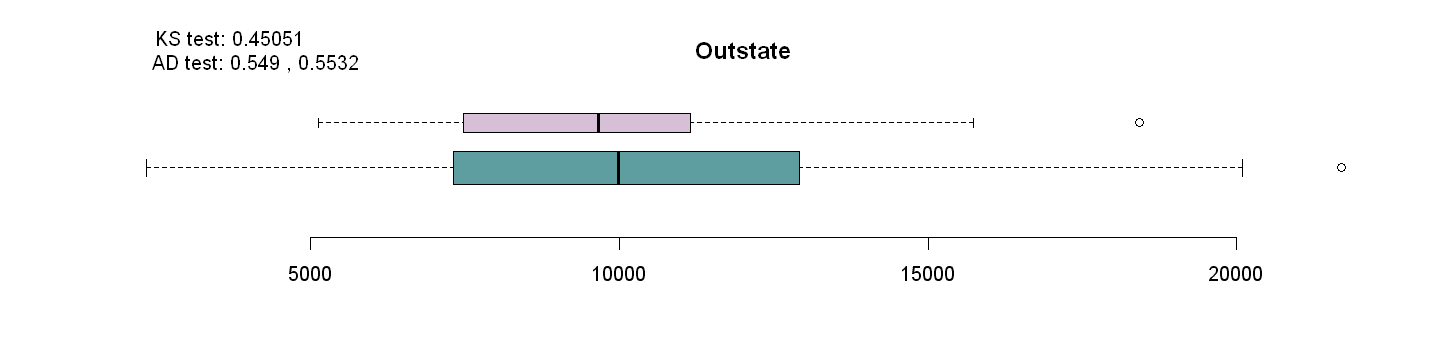

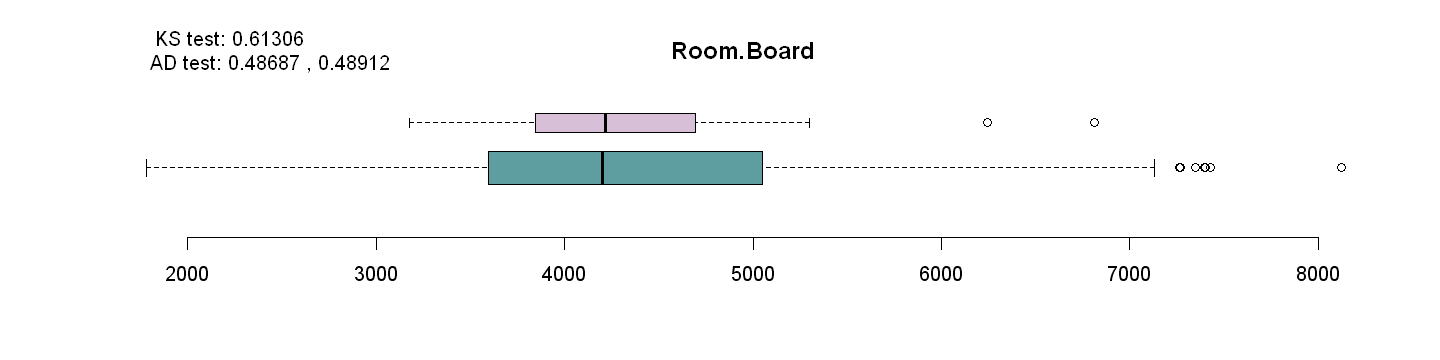

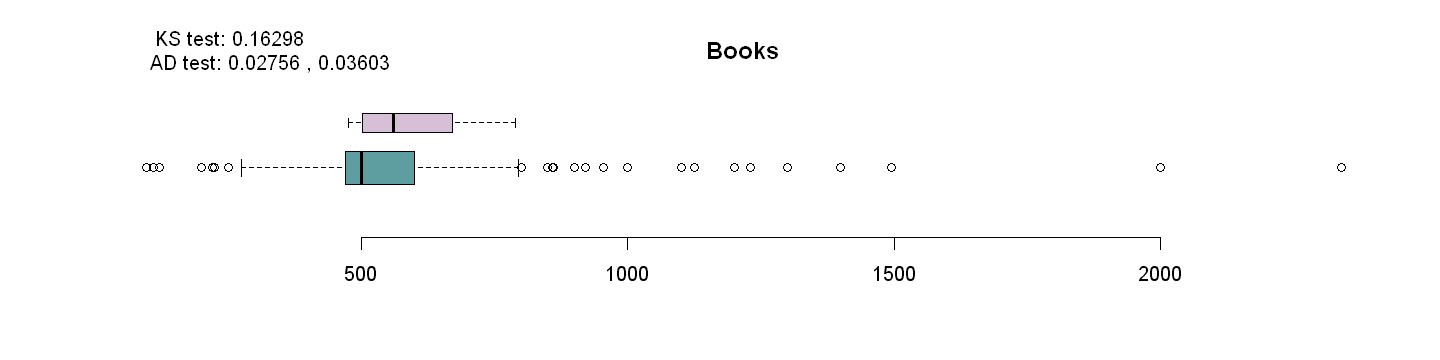

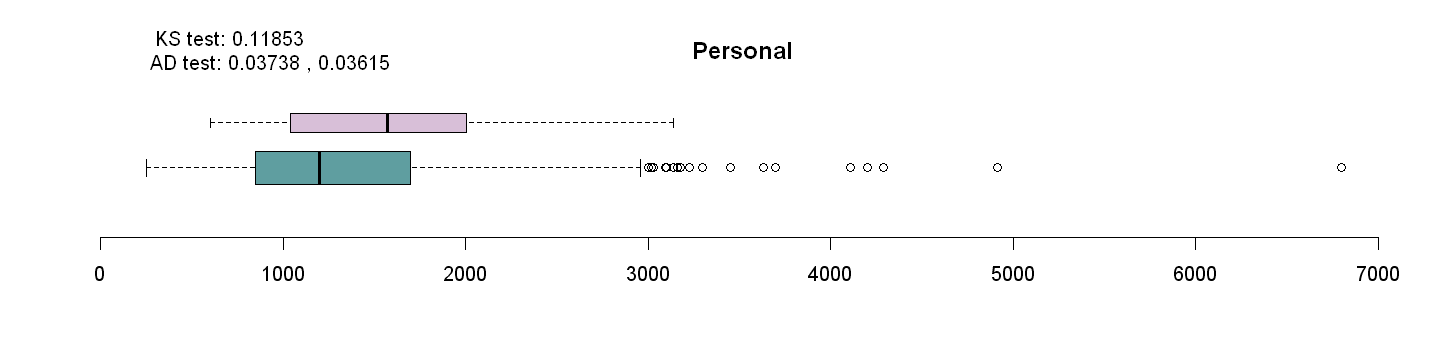

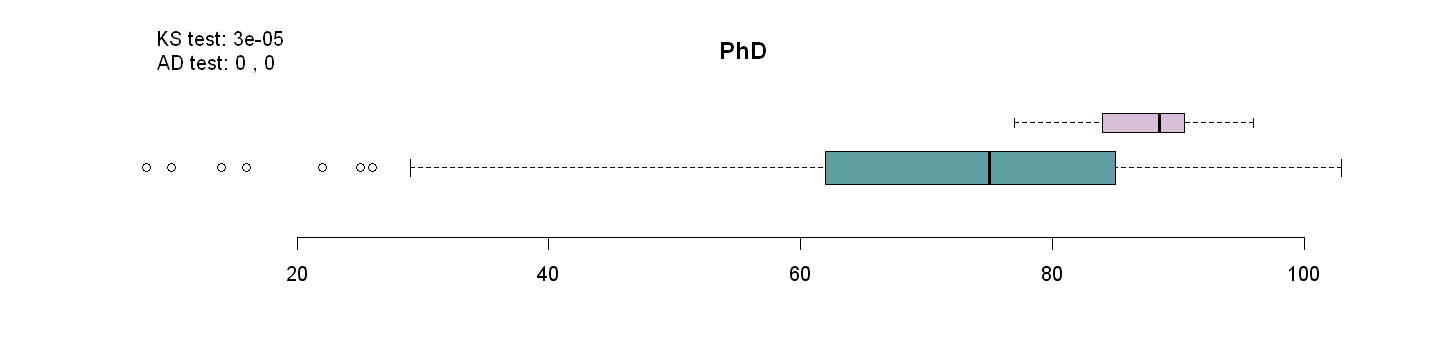

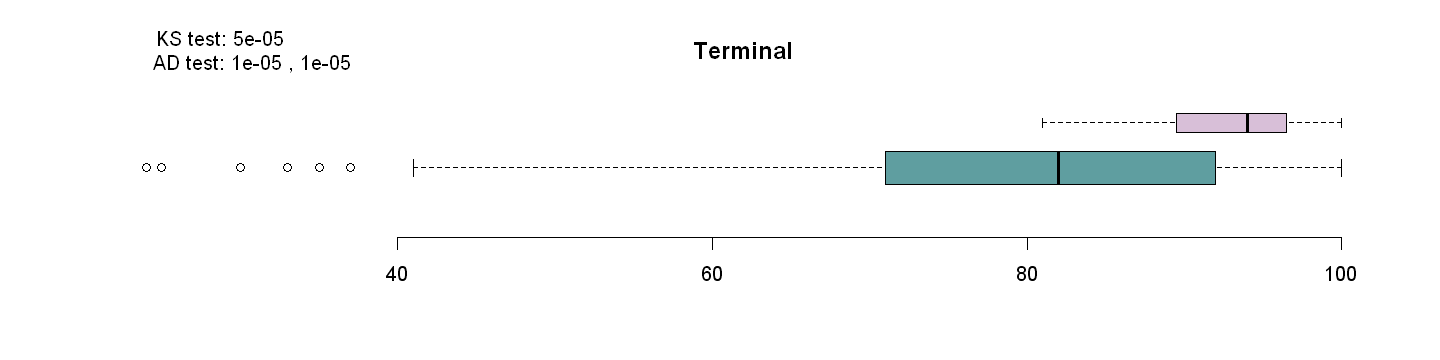

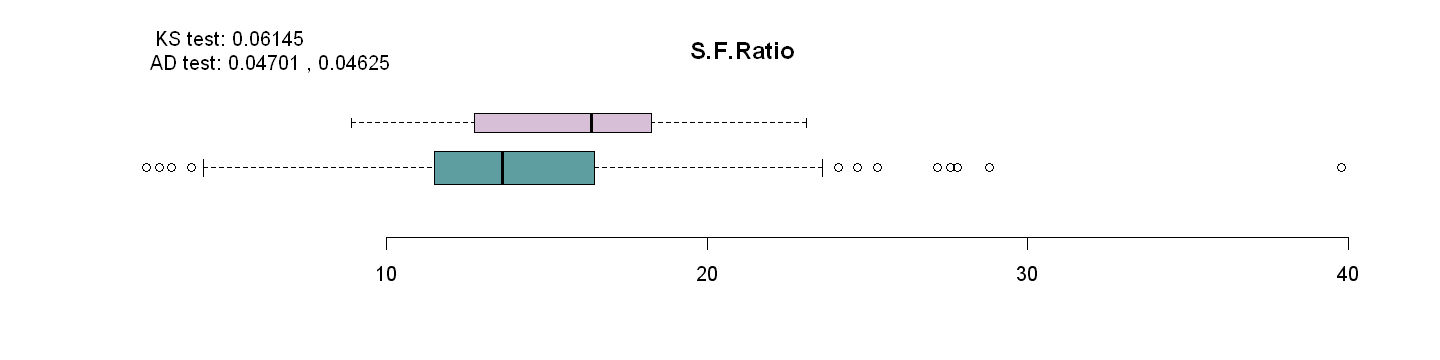

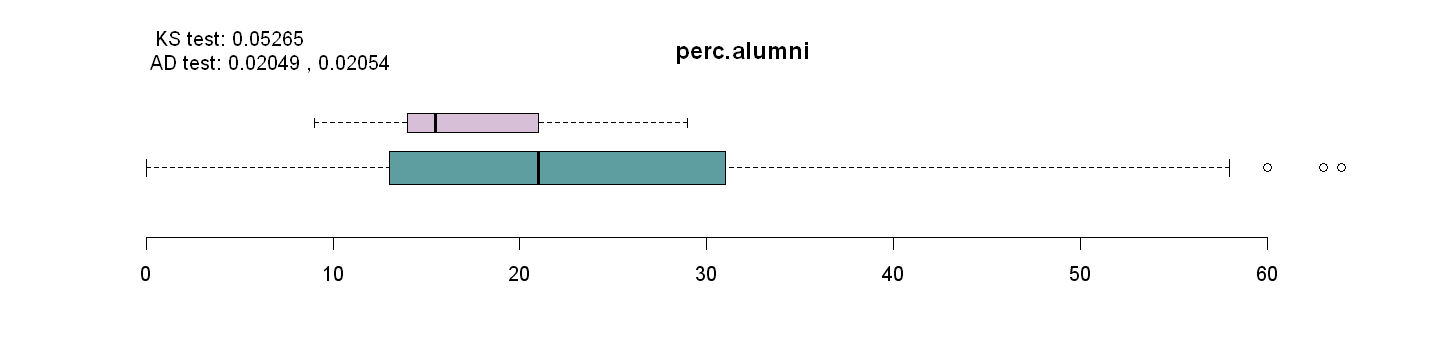

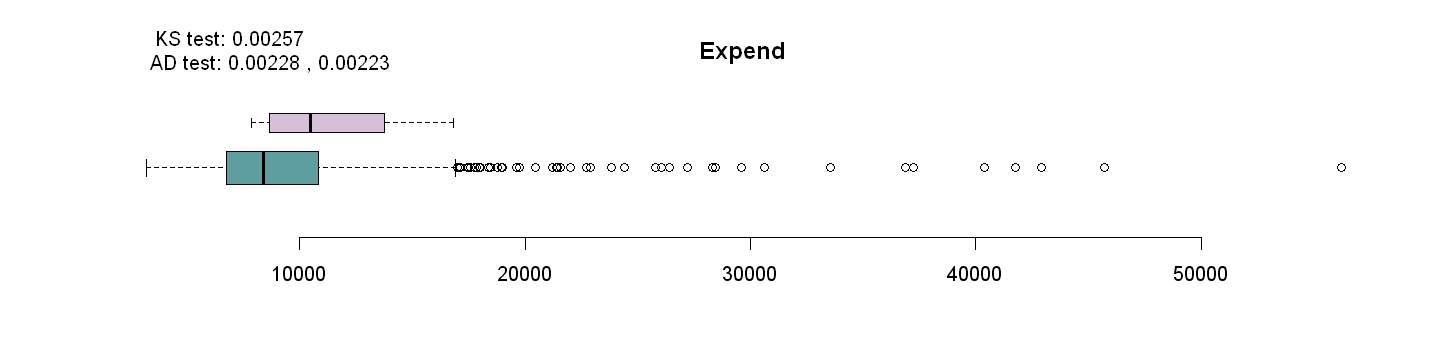

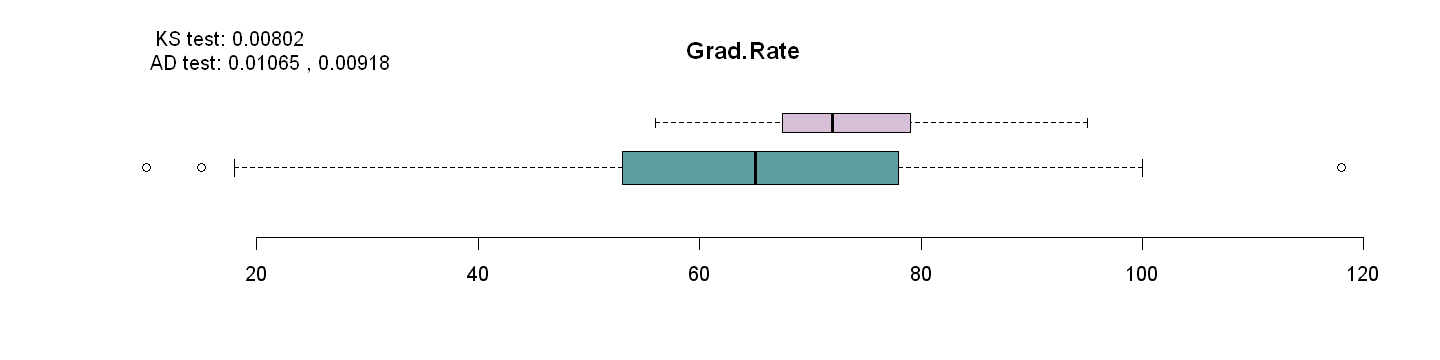

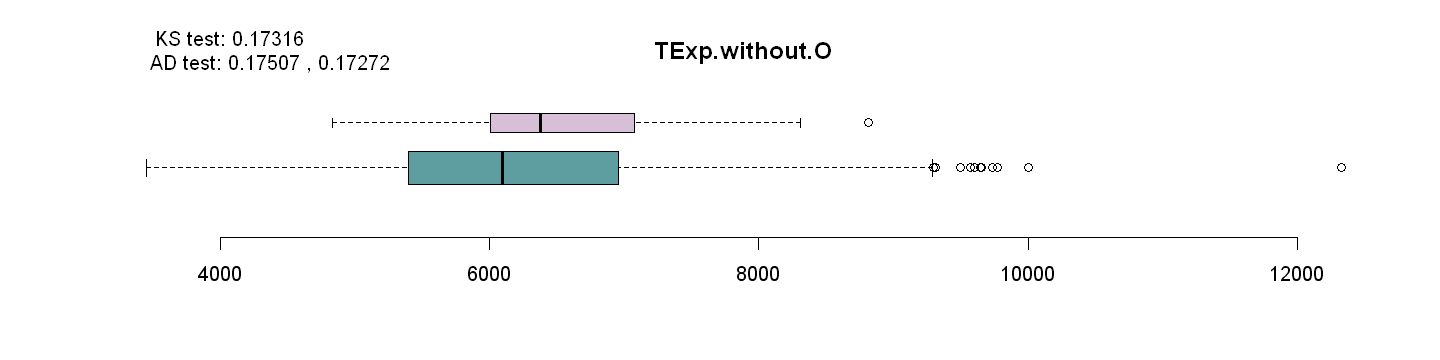

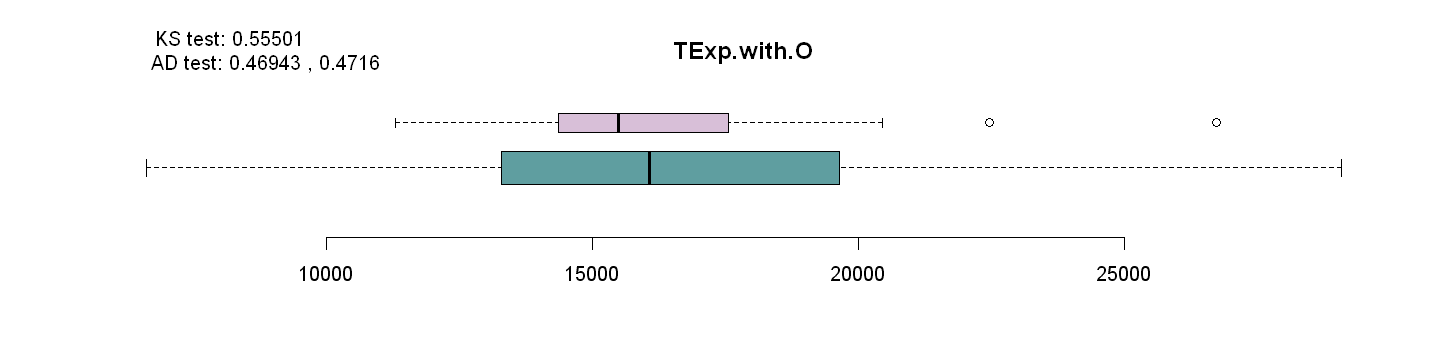

In [55]:
## Boxplots
subset_df = top20_Apps[sapply(college, is.numeric)]
base_df = college
ovars = names(subset_df)[names(subset_df) %in% names(base_df)]

sig_lvl = 0.05

plot_pars(12,3)
for (var in ovars) {    
    adt = ad.test(base_df[,var], subset_df[,var])
    adp = paste('AD test:', round(adt$ad[[5]],5), ',', round(adt$ad[[6]],5))
    ks = suppressWarnings(ks.test(base_df[,var], subset_df[,var]))
    ksp = paste('KS test:', round(ks$p.value, 5))
    
    boxplot(base_df[,var], horizontal=T, frame=F, boxwex=0.5, at=0, col='cadetblue', main=var)
    boxplot(subset_df[,var], horizontal=T, frame=F, boxwex=0.3, at=0.35, col='thistle', add=T)
    mtext(ksp, 3, adj = 0.05, line = 2, cex=1)
    mtext(adp, 3, adj = 0.05, line = 1, cex=1)
}
options(defop)

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Statistical test

In [56]:
## Statistical test comparing variables and its subset
test_df = data.frame(matrix(NA, nrow=length(ovars), ncol=4))
names(test_df) = c('KS','AD(v1)','AD(v2)', 'Significant')
rownames(test_df) = ovars

for (i in seq(length(ovars))) {
    var = ovars[i]
    
    # Kolmogrov-Smirnov test
    ks = suppressWarnings(ks.test(base_df[,var], subset_df[,var]))
    ksp = round(ks$p.value, 5)
    
    # Anderson-Darling test
    adt = ad.test(base_df[,var], subset_df[,var])
    adp1 = round(adt$ad[[5]],5)
    adp2 = round(adt$ad[[6]],5)
    
    # add in df
    sig = ifelse((ksp<sig_lvl & adp1<sig_lvl & adp2<sig_lvl), 'Y', 
                                      ifelse((ksp>sig_lvl & adp1>sig_lvl & adp2>sig_lvl), 'N', '-'))
    test_df[i, ] = c(ksp, adp1, adp2, sig)
}
test_df

,KS,AD(v1),AD(v2),Significant
,<chr>,<chr>,<chr>,<chr>
Apps,0,0,0,Y
Accept,0,0,0,Y
Enroll,0,0,0,Y
Top10perc,7e-04,1e-05,1e-05,Y
Top25perc,2e-05,0,0,Y
F.Undergrad,0,0,0,Y
P.Undergrad,0,0,0,Y
Outstate,0.45051,0.549,0.5532,N
Room.Board,0.61306,0.48687,0.48912,N


<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### e) Further analysis of Elite colleges

In [57]:
# Elite colleges >> Top10perc > 50
elite_df = college[which(college$Elite=='Yes'),]
elite_df = elite_df[order(elite_df$Top10perc, elite_df$Top25perc, decreasing=T),]
dim(elite_df)

## Top 20 elite colleges
top20_elite = elite_df[1:20,]

custom_summary(college, 2, c(0.05,0.95), c('5%','95%'))
options(repr.matrix.max.cols=30)
top20_elite

[1] 78 21

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,TExp.without.O,TExp.with.O
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min,81.00,72.0,35.00,1.00,9.0,139.00,1.0,2340.00,1780.00,96.00,250.00,8.00,24.0,2.50,0.00,3186.00,10.00,3452.00,6604.00
5%,329.80,272.4,118.60,7.00,25.8,509.80,20.0,4601.60,2735.80,350.00,500.00,43.80,52.8,8.30,6.00,4795.80,37.00,4450.00,9846.60
10%,457.60,361.6,154.00,10.00,30.6,641.00,35.0,5568.80,3051.20,400.00,600.00,50.60,59.0,9.90,8.00,5558.20,44.60,4809.20,11006.00
25%,776.00,604.0,242.00,15.00,41.0,992.00,95.0,7320.00,3597.00,470.00,850.00,62.00,71.0,11.50,13.00,6751.00,53.00,5400.00,13279.00
50%,1558.00,1110.0,434.00,23.00,54.0,1707.00,353.0,9990.00,4200.00,500.00,1200.00,75.00,82.0,13.60,21.00,8377.00,65.00,6100.00,16079.00
Mean,3001.64,2018.8,779.97,27.56,55.8,3699.91,855.3,10440.67,4357.53,549.38,1340.64,72.66,79.7,14.09,22.74,9660.17,65.46,6247.55,16688.22
75%,3624.00,2424.0,902.00,35.00,69.0,4005.00,967.0,12925.00,5050.00,600.00,1700.00,85.00,92.0,16.50,31.00,10830.00,78.00,6958.00,19650.00
90%,7675.00,4814.2,1903.60,50.40,85.0,10024.40,2016.6,16552.80,5950.00,700.00,2200.00,92.00,96.0,19.20,40.00,14841.00,89.00,7922.40,23430.00
95%,11066.20,6979.2,2757.00,65.20,93.0,14477.80,3303.6,18498.00,6382.00,765.60,2488.80,95.00,98.0,21.00,46.00,17974.80,94.20,8392.00,26030.00


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite,TExp.without.O,TExp.with.O
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>,<int>,<int>
Massachusetts Institute of Technology,Yes,6411,2140,1078,96,99,4481,28,20100,5975,725,1600,99,99,10.1,35,33541,94,Yes,8300,28400
Harvey Mudd College,Yes,1377,572,178,95,100,654,5,17230,6690,700,900,100,100,8.2,46,21569,100,Yes,8290,25520
University of California at Berkeley,No,19873,8252,3215,95,100,19532,2061,11648,6246,636,1933,93,97,15.8,10,13919,78,Yes,8815,20463
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,Yes,9255,29095
Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100,Yes,8830,27315
Duke University,Yes,13789,3893,1583,90,98,6188,53,18590,5950,625,1162,95,96,5.0,44,27206,97,Yes,7737,26327
Princeton University,Yes,13218,2042,1153,90,98,4540,146,19900,5910,675,1575,91,96,8.4,54,28320,99,Yes,8160,28060
Georgia Institute of Technology,No,7837,4527,2276,89,99,8528,654,6489,4438,795,1164,92,92,19.3,33,11271,70,Yes,6397,12886
Dartmouth College,Yes,8587,2273,1087,87,99,3918,32,19545,6070,550,1100,95,99,4.7,49,29619,98,Yes,7720,27265


<div class="alert alert-block alert-info">
<a id='Observations_-_Top_Elite'></a>
<b>'Elite'</b> : College/Universities that have >50% proportion of Top10perc students.<br>
<b>'Top10perc'</b> : % of new students from top 10% of their High School class<br><br>
<b>Observations:</b><br>
    - There are 78 (10% of 777) 'Elite' institutions.<br>
    - The distribution of every variable is different in 'Elite' colleges when compared with the variable's overall distribution, except in the case of 'Books' and 'Personal'.<br><br>
    <b>Top 20 Elite:</b><br>
    - Unsurprisingly, the top 'Elite' institutions also have the highest proportion of students that graduated in the top 25% of their high schools. All 20 are among the top 97th percentile of <b>Top25perc</b>.<br>
    - Min <b>'Phd'</b> and <b>'Terminal'</b> proportions are 91% and 92% respectively. <br>
    - 19 out of 20 institutions have faculty with <b>'PhD'</b>s within the top 90th percentile.<br> 
    - 18 out of 20 institutions have faculty with <b>'Terminal'</b> degrees within the top 90th percentile.<br>
    - 16 of the 20 have <b>out-of-state tuition</b> among the top 90th percentile, with California-Irvine and California-Berkely being the notable outliers with 69th and 65th percentile respectively, and Georgia Institute of Technology being an extreme outlier with 15.7th percentile.<br>
    - 70% of the Top 20 Elite have <b>Room.Board</b> expenses among the top 85th percentile.<br>
    - <b>Student-faculty ratio</b> is generally lower than overall, with 14 of the top 20 having S.F.Ratio below the 25th percentile.<br>
    &ensp; Here again California-Irvine, California-Berkely and Georgetown Institute of Technology stand out with 73th, 71st and 91st percentiles respectively.<br>
    - 15 of the 20 are among the top 80th percentile in terms of proportion of alumni that donate (<b>perc.alumni</b>).<br>
    - <b>Graduation rates</b> are higher than the norm among the Elite institutions with 16 of the top 20 'Elite' having Grad.Rates above the 93rd percentile.
</div>

[Go to Index](#Index)

##### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

###### Percentile table (single variable)

[1] "Top 20 elite colleges"

< 90  : 4 ; 20
>= 90 : 16 ;  80

,S.N,College,Grad.Rate,Percentile,Percentile_Main
,<int>,<chr>,<int>,<dbl>,<dbl>
2,1,Harvey Mudd College,100,99.87,99.87
5,2,Harvard University,100,99.87,99.49
15,3,Amherst College,100,99.87,98.20
4,4,Yale University,99,98.58,99.87
7,5,Princeton University,99,98.58,99.49
16,6,Williams College,99,98.58,98.07
19,7,Columbia University,99,98.58,97.68
9,8,Dartmouth College,98,97.94,98.97
6,9,Duke University,97,97.30,99.49


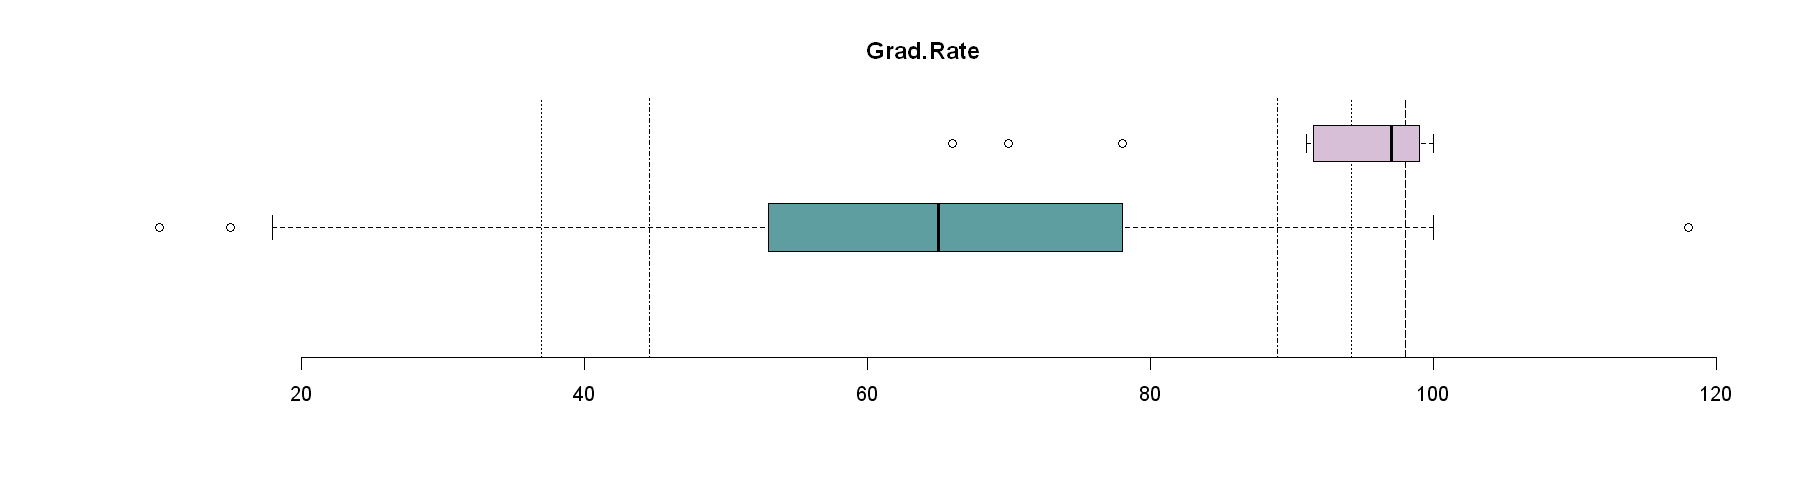



 Anderson-Darling k-sample test.

Number of samples:  2
Sample sizes:  777, 20
Number of ties: 716

Mean of  Anderson-Darling  Criterion: 1
Standard deviation of  Anderson-Darling  Criterion: 0.7632

T.AD = ( Anderson-Darling  Criterion - mean)/sigma

Null Hypothesis: All samples come from a common population.

             AD  T.AD  asympt. P-value
version 1: 26.8 33.80        6.633e-15
version 2: 27.4 34.63        3.249e-15

Warning message in ks.test(base_df[, var], subset_df[, var]):
"p-value will be approximate in the presence of ties"



	Two-sample Kolmogorov-Smirnov test

data:  base_df[, var] and subset_df[, var]
D = 0.71763, p-value = 3.794e-09
alternative hypothesis: two-sided


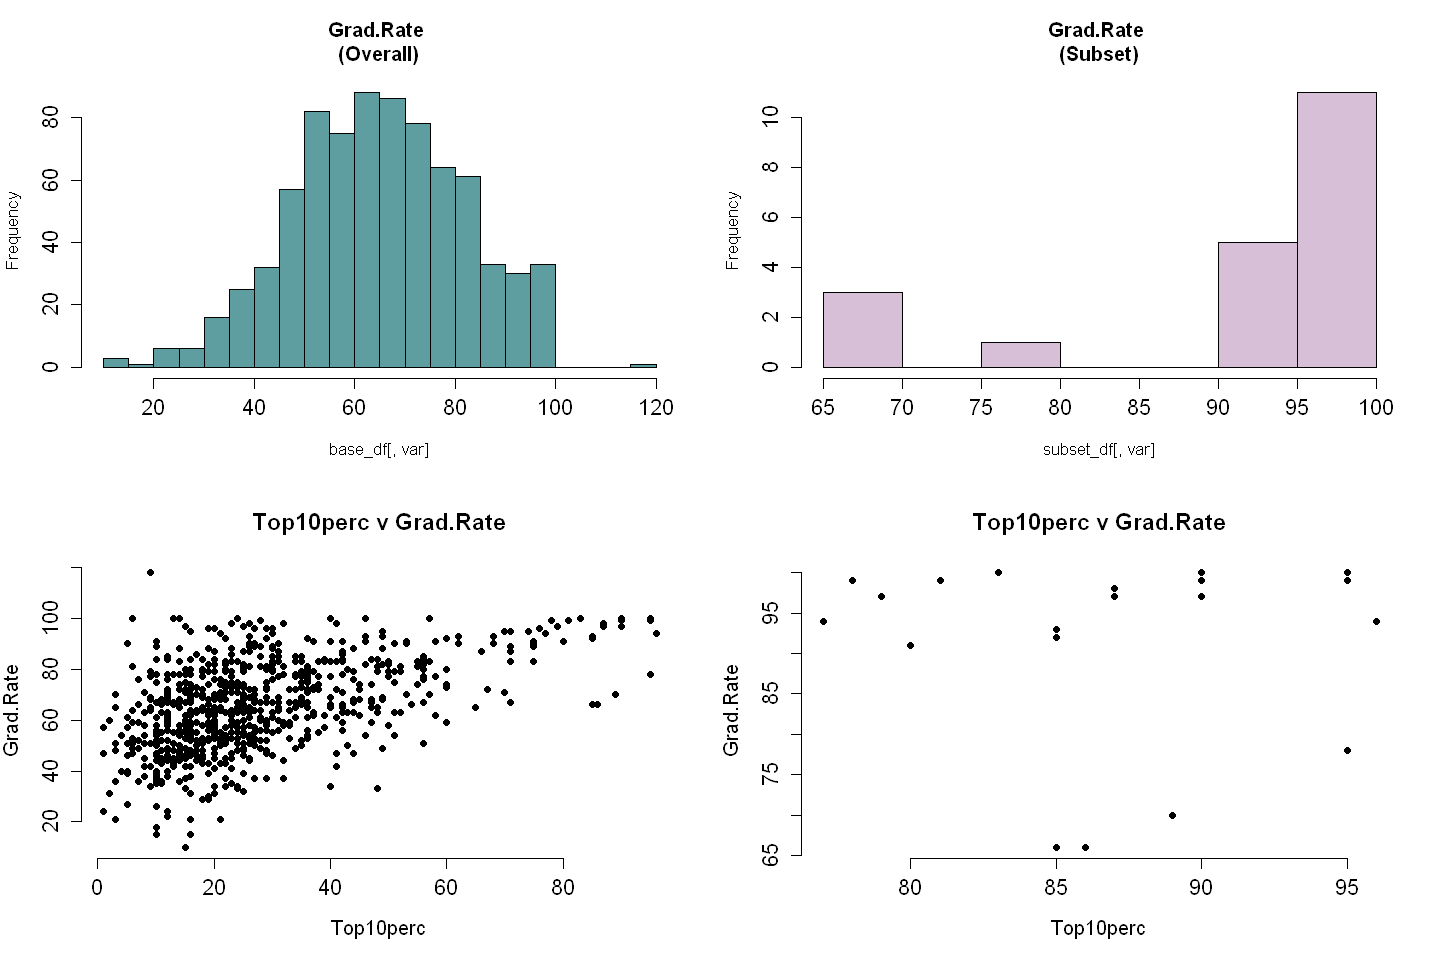

In [58]:
## Percentile table
"Top 20 elite colleges"
subset_df = top20_elite
base_df = college
var_main = 'Top10perc'
var = 'Grad.Rate'
n = nrow(subset_df)
k = 90

# Percentiles
percentiles_main = round(ecdf(base_df[,var_main])(subset_df[, var_main])*100, 2)
percentiles = round(ecdf(base_df[,var])(subset_df[,var])*100,2)
percentile_df = data.frame(rownames(subset_df), subset_df[,var], percentiles, percentiles_main)
names(percentile_df) = c('College', var, 'Percentile', 'Percentile_Main')

# Count below and above kth percentile
cat(paste('<', k, ' :', sum(percentile_df$Percentile < k),';',sum(percentile_df$Percentile < k)/n*100))
cat(paste('\n>=', k, ':', sum(percentile_df$Percentile >= k),'; ',sum(percentile_df$Percentile >= k)/n*100))
cbind(S.N=1:nrow(percentile_df), percentile_df[order(percentile_df$Percentile, decreasing=T),])


# Boxplots - Overall distribution v subset distribution
plot_pars(15,4)
boxplot(base_df[,var], horizontal=T, frame=F, boxwex=0.4, at = 0, col='cadetblue', main=var)
abline(v=quantile(base_df[,var], c(0.05,0.1,0.9,0.95, 0.97426)), lty=c(3,4,4,3,5))
boxplot(subset_df[,var], horizontal=T, frame=F, boxwex=0.3, at = 0.35, col='thistle',add=T)

# Histograms - Overall and subset
plot_pars(12,8)
par(mfrow=c(2,2))
hist(base_df[,var], col='cadetblue', nclass='FD', main=paste(var, '\n(Overall)'), cex.axis=1.3)
hist(subset_df[,var], col='thistle', nclass='FD', main=paste(var, '\n(Subset)'), cex.axis=1.3)

# Scatterplots - Base variable v other variable
plot(base_df[,var_main], base_df[,var], pch=19, bty="n", cex.main=1.4, cex.lab=1.2, cex.axis=1.3,
     main=paste(var_main,'v',var), xlab=var_main, ylab=var)
plot(subset_df[,var_main], subset_df[,var], pch=19, bty="n", cex.main=1.4, cex.lab=1.2, cex.axis=1.3,
     main=paste(var_main,'v',var), xlab=var_main, ylab=var)

par(defpar)
options(defop)


## Statistical test for comparing base and subset
# Anderson-Darling test for comparing 2 samples
sig_lvl = 0.05
ad.test(base_df[,var], subset_df[,var])
# Kolmogorov-Smirnov test
ks.test(base_df[,var], subset_df[,var])

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Boxplots

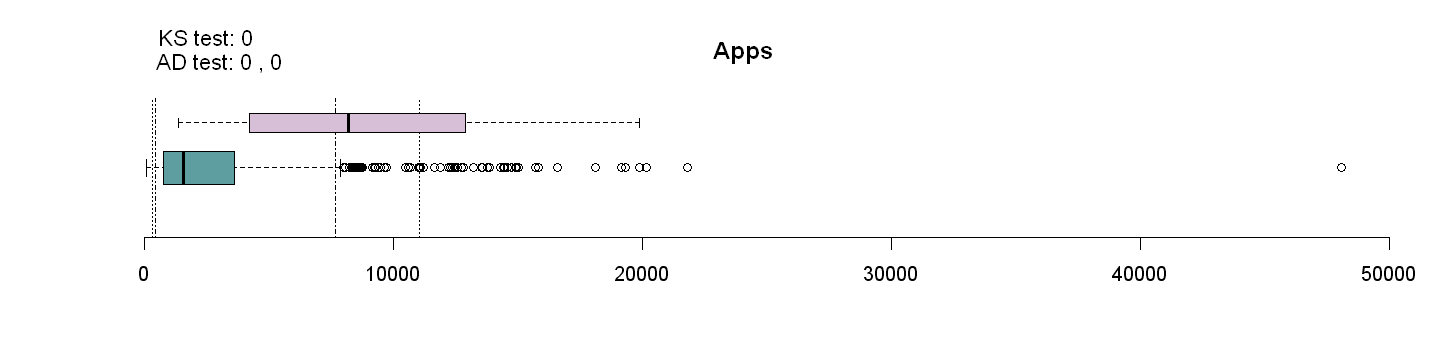

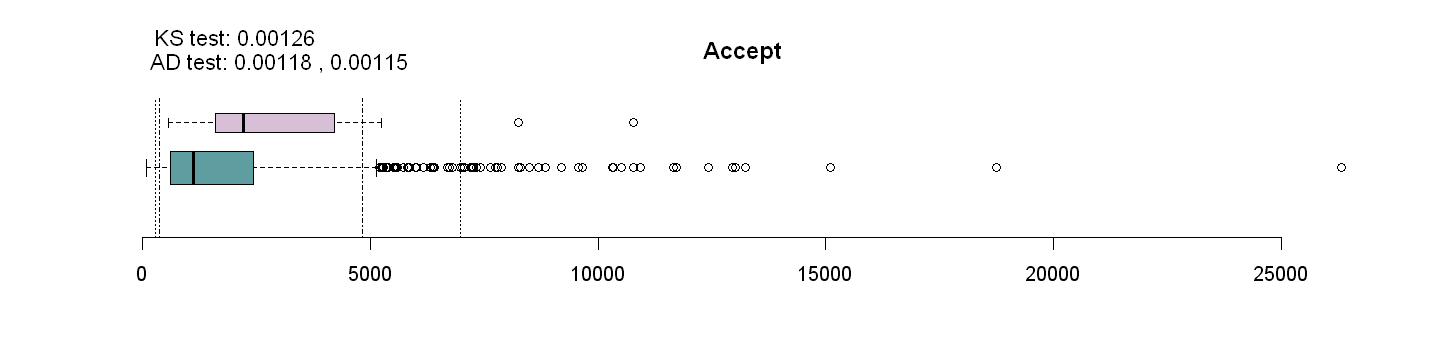

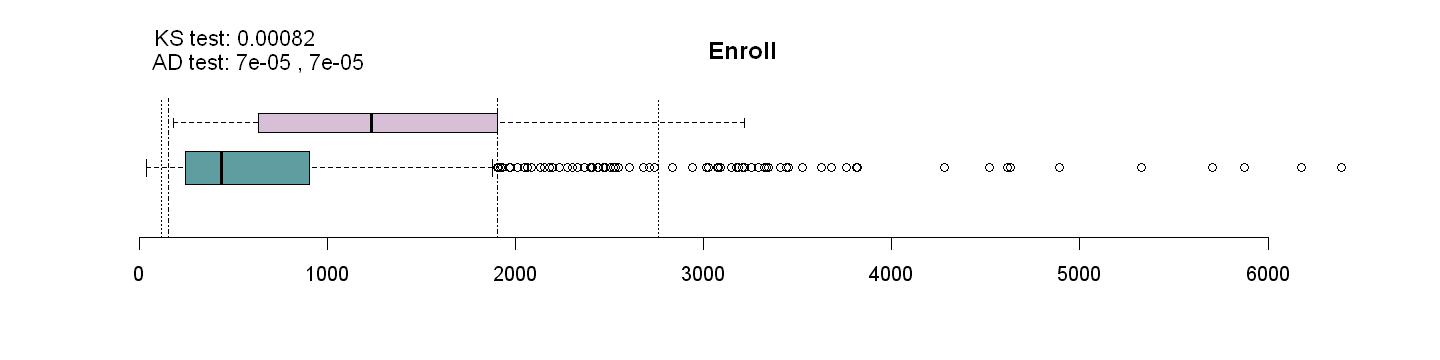

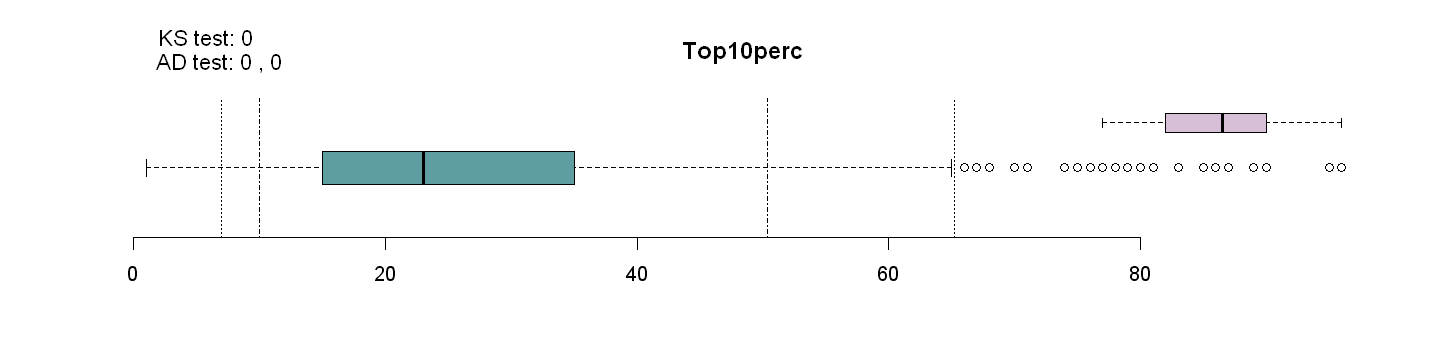

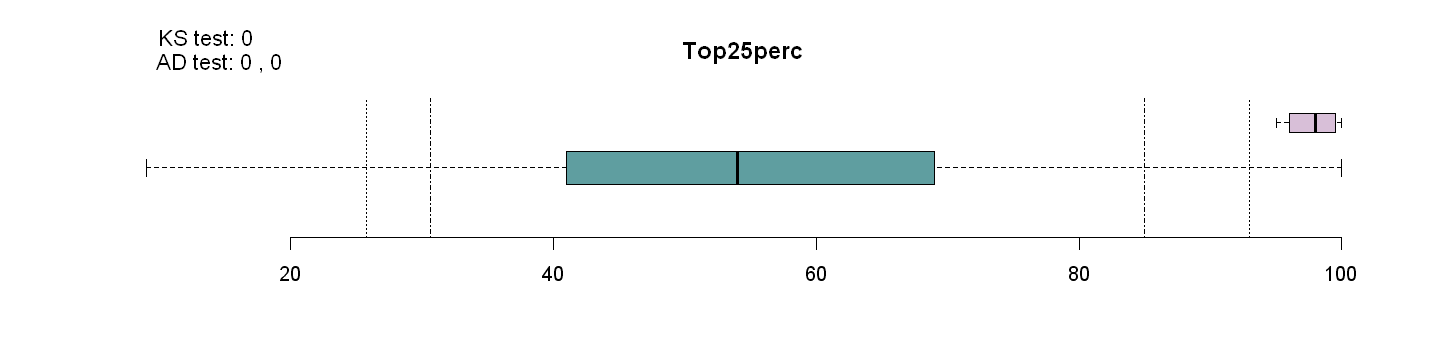

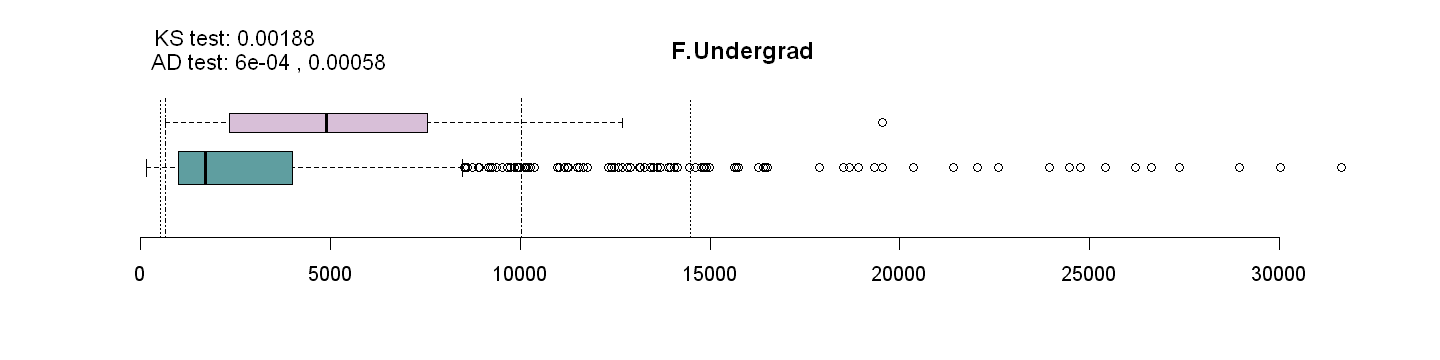

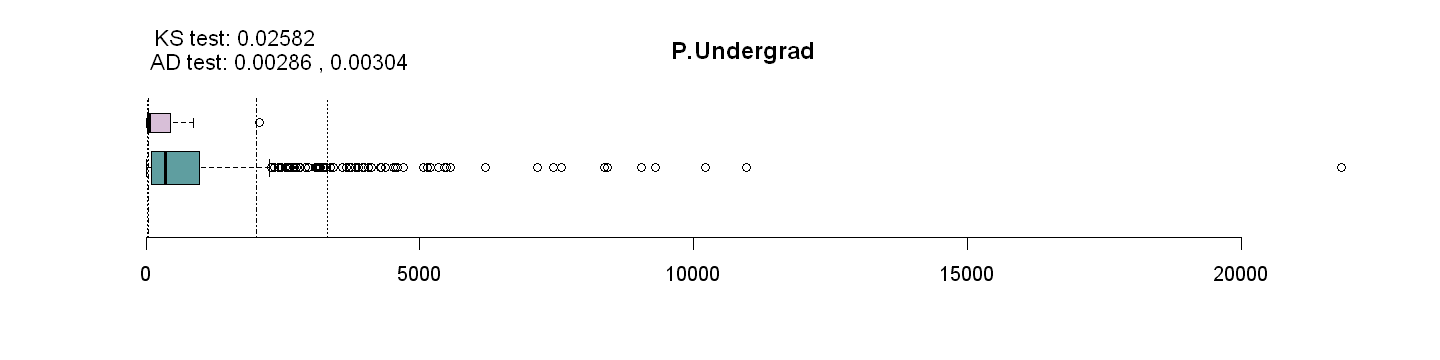

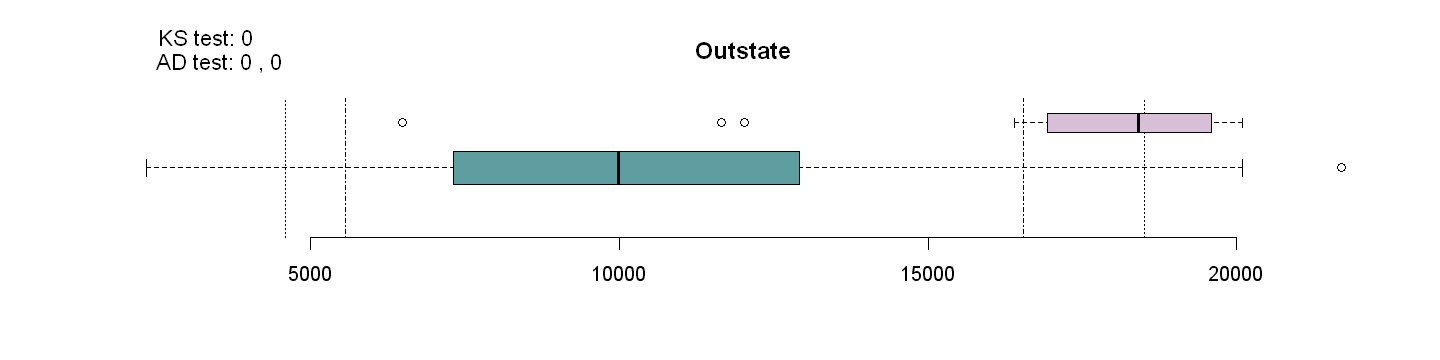

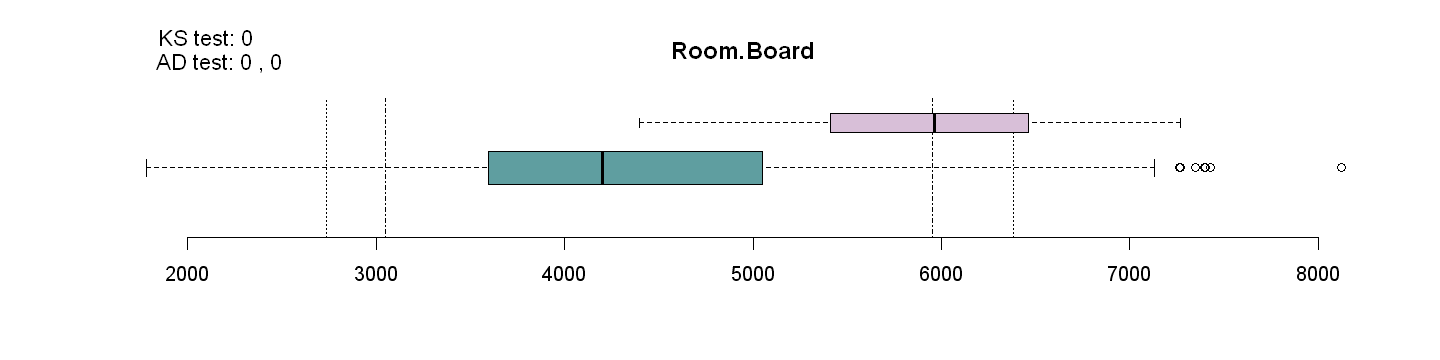

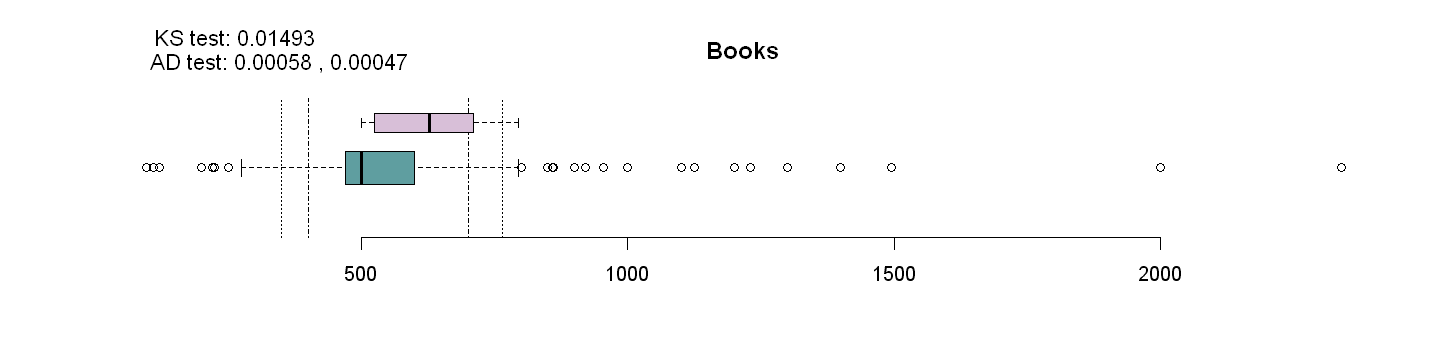

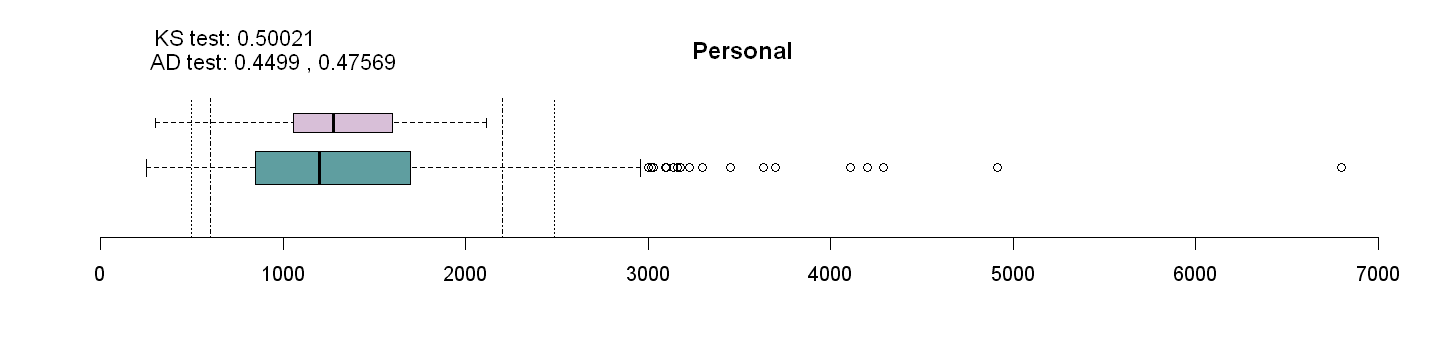

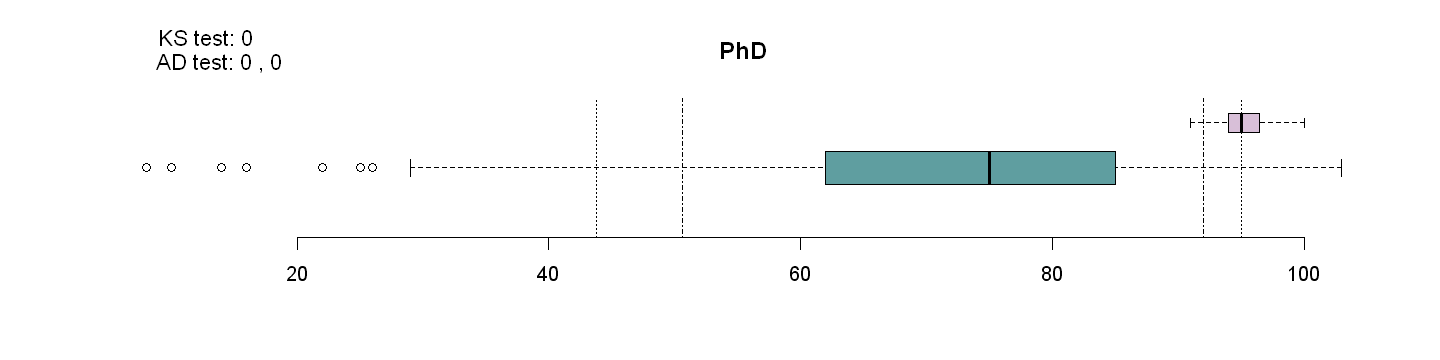

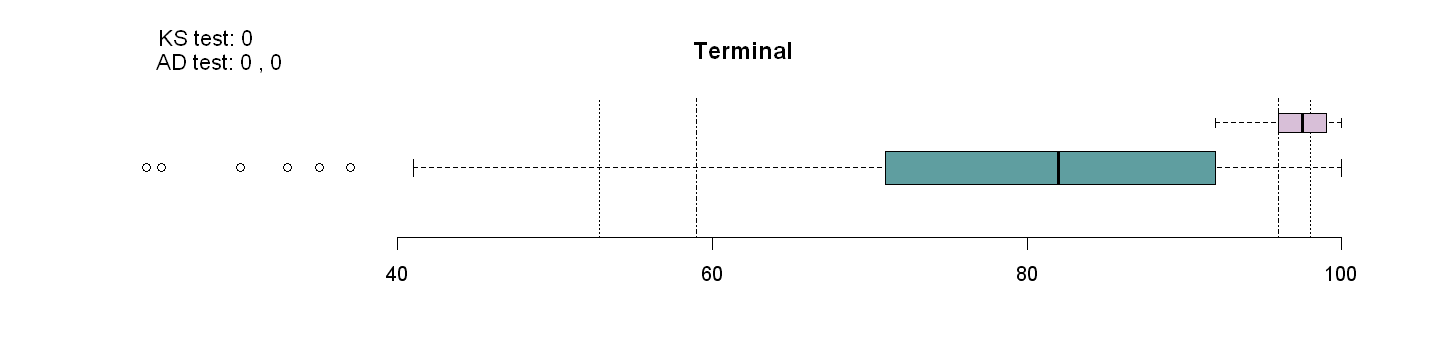

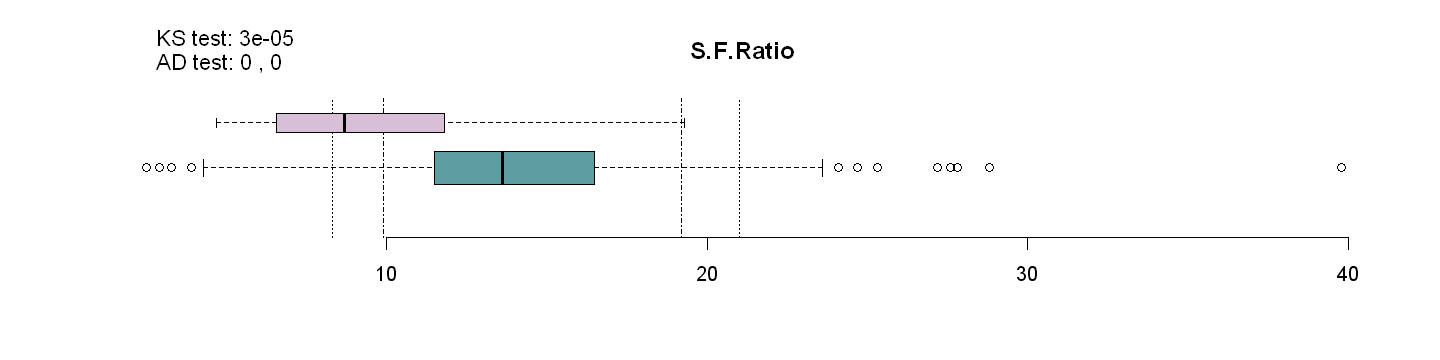

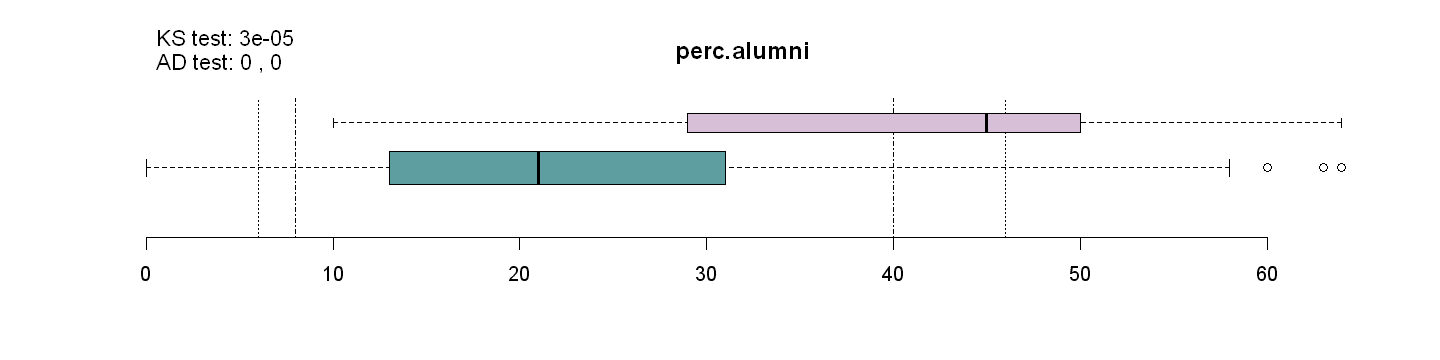

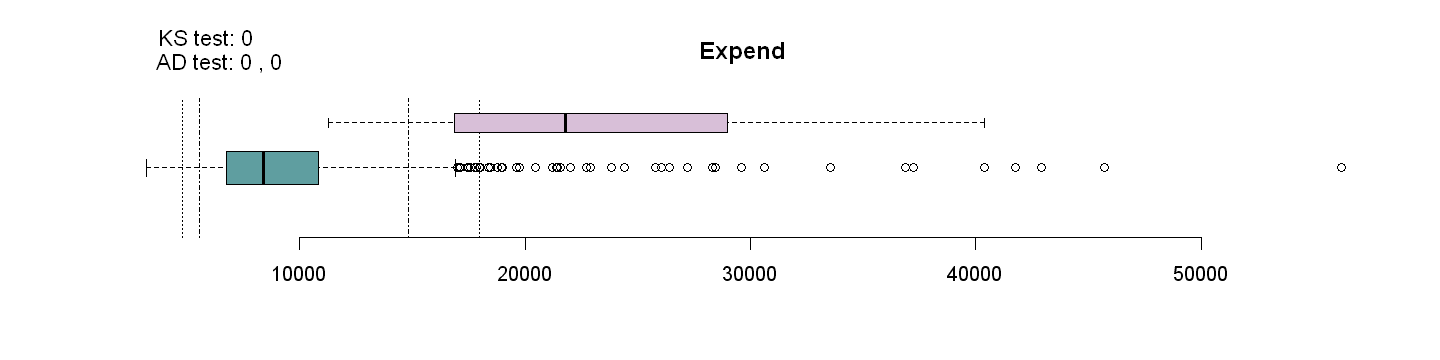

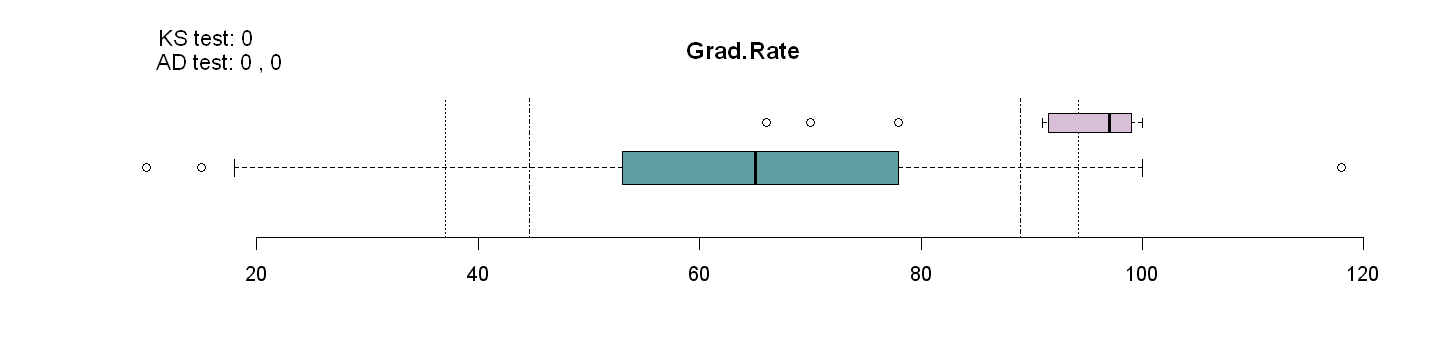

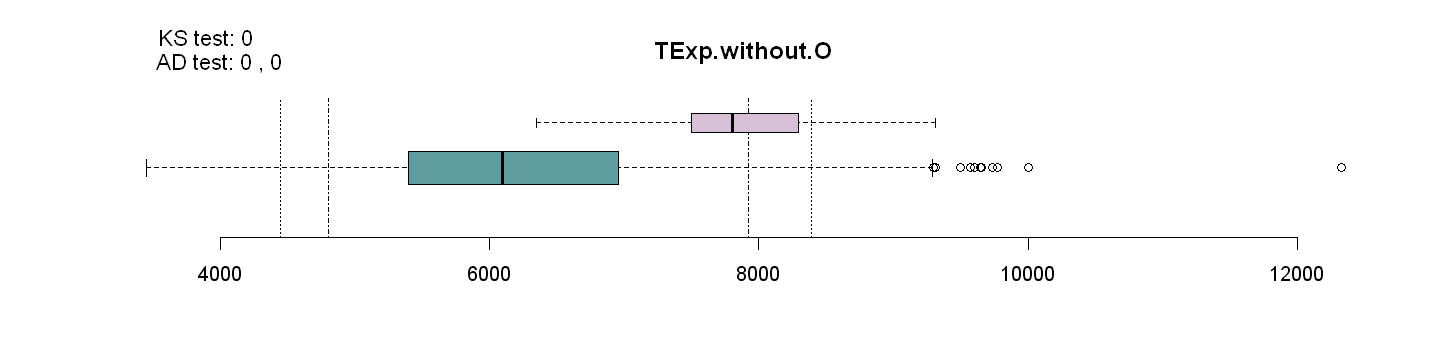

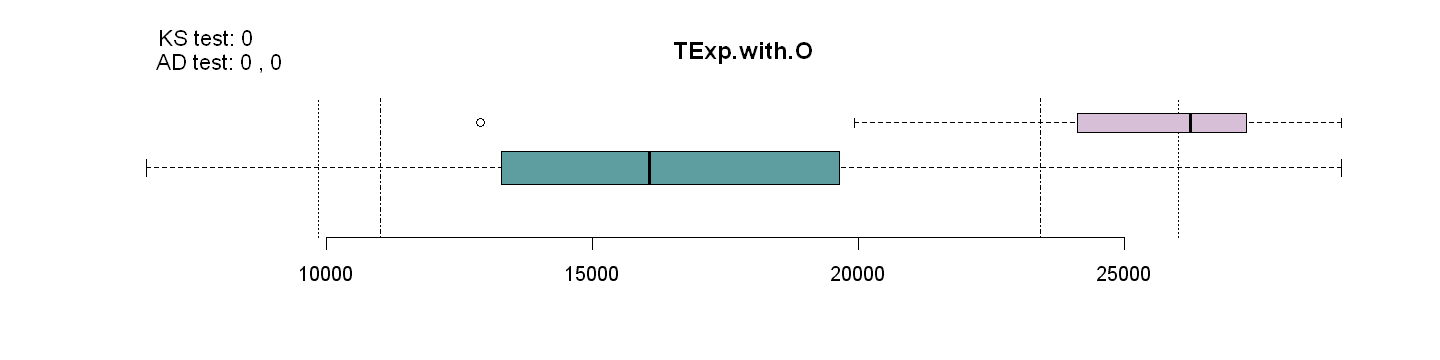

In [59]:
## Boxplots
subset_df = top20_elite[sapply(top20_elite, is.numeric)]
base_df = college
ovars = names(subset_df)[names(subset_df) %in% names(base_df)]

sig_lvl = 0.05

plot_pars(12,3)
for (var in ovars) {    
    adt = ad.test(base_df[,var], subset_df[,var])
    adp = paste('AD test:', round(adt$ad[[5]],5), ',', round(adt$ad[[6]],5))
    ks = suppressWarnings(ks.test(base_df[,var], subset_df[,var]))
    ksp = paste('KS test:', round(ks$p.value, 5))
    
    boxplot(base_df[,var], horizontal=T, frame=F, boxwex=0.5, at=0, col='cadetblue', main=var)
    abline(v=quantile(base_df[,var], c(0.05,0.1,0.9,0.95)), lty=c(3,4,4,3,5))
    boxplot(subset_df[,var], horizontal=T, frame=F, boxwex=0.3, at=0.35, col='thistle', add=T)
    mtext(ksp, 3, adj = 0.05, line = 2, cex=1.1)
    mtext(adp, 3, adj = 0.05, line = 1, cex=1.1)
}
options(defop)

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Statistical test

In [60]:
## Statistical test comparing variables and its subset
test_df = data.frame(matrix(NA, nrow=length(ovars), ncol=4))
names(test_df) = c('KS','AD(v1)','AD(v2)', 'Significant')
rownames(test_df) = ovars

for (i in seq(length(ovars))) {
    var = ovars[i]
    
    # Kolmogrov-Smirnov test
    ks = suppressWarnings(ks.test(base_df[,var], subset_df[,var]))
    ksp = round(ks$p.value, 5)
    
    # Anderson-Darling test
    adt = ad.test(base_df[,var], subset_df[,var])
    adp1 = round(adt$ad[[5]],5)
    adp2 = round(adt$ad[[6]],5)
    
    # add in df
    sig = ifelse((ksp<sig_lvl & adp1<sig_lvl & adp2<sig_lvl), 'Y', 
                                      ifelse((ksp>sig_lvl & adp1>sig_lvl & adp2>sig_lvl), 'N', '-'))
    test_df[i, ] = c(ksp, adp1, adp2, sig)
}
test_df

,KS,AD(v1),AD(v2),Significant
,<chr>,<chr>,<chr>,<chr>
Apps,0,0,0,Y
Accept,0.00126,0.00118,0.00115,Y
Enroll,0.00082,7e-05,7e-05,Y
Top10perc,0,0,0,Y
Top25perc,0,0,0,Y
F.Undergrad,0.00188,6e-04,0.00058,Y
P.Undergrad,0.02582,0.00286,0.00304,Y
Outstate,0,0,0,Y
Room.Board,0,0,0,Y


<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[Go to Index](#Index)

###### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Code help sources
[List of sources for the book](https://github.com/rahul-ahuja1/Solutions_-_An_Introduction_to_Statistical_Learning#solutions---an-introduction-to-statistical-learning)

<table>
<tr style="background-color:white">
    <th><b>-------------------------------------------- &ensp; &nbsp;</b></th>
    <th><img src="https://www.redwolf.in/image/cache/catalog/artwork-Images/mens/bugs-bunny-thats-all-folks-t-shirt-artwork-700x700.png" style="width:150px" style="display:inline-block; "/></th><th style="float:right"></th>
    <th><b>&ensp;--------------------------------------------</b></th>
</tr>
</table>